In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm.notebook import tqdm
%matplotlib inline
#use %matplotlib notebook for interactive

In [6]:
ticker = 'PLAY' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [9]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PLAY
Date,
2021-11-26,-0.065253
2021-11-29,-0.027945
2021-11-30,-0.021021
2021-12-01,-0.074771
2021-12-02,0.062380


In [10]:
data['PG'].plot(figsize=(10, 6));

KeyError: 'PG'

<AxesSubplot:xlabel='Date'>

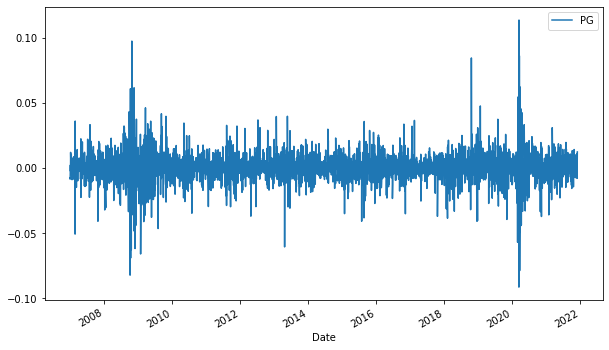

In [6]:
log_returns.plot(figsize = (10, 6))

In [7]:
mu = log_returns.mean()
mu

PG    0.000341
dtype: float64

In [8]:
var = log_returns.var()
var

PG    0.000137
dtype: float64

In [9]:
data['log_returns'] = log_returns

In [10]:
data['normed'] = (data['log_returns'] - np.float64(mu)) / np.float64(np.sqrt(var))

In [11]:
data.head()

,PG,log_returns,normed
Date,,,
2007-01-03,41.589977,NaN,NaN
2007-01-04,41.274223,-0.007621,-0.679744
2007-01-05,40.919800,-0.008624,-0.765386
2007-01-08,41.010010,0.002202,0.158939
2007-01-09,40.906902,-0.002517,-0.244002


In [12]:
data.dropna()

,PG,log_returns,normed
Date,,,
2007-01-04,41.274223,-0.007621,-0.679744
2007-01-05,40.919800,-0.008624,-0.765386
2007-01-08,41.010010,0.002202,0.158939
2007-01-09,40.906902,-0.002517,-0.244002
2007-01-10,41.396648,0.011901,0.987020
...,...,...,...
2021-11-22,147.800003,0.006653,0.538915
2021-11-23,149.440002,0.011035,0.913070
2021-11-24,148.660004,-0.005233,-0.475870


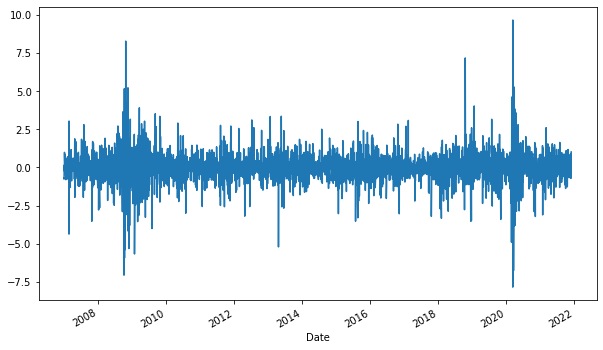

In [13]:
data['normed'].plot(figsize=(10, 6));

In [14]:
drift = mu - (0.5 * var)
drift

PG    0.000272
dtype: float64

In [15]:
stdev = np.sqrt(var)

In [16]:
t_intervals = 1000
iterations = 10

In [17]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [18]:
daily_returns

array([[0.99679849, 1.00255546, 0.99367118, ..., 1.01576048, 1.0071935 ,
        0.990831  ],
       [0.97794598, 0.98752402, 0.99872426, ..., 0.99001115, 0.98061725,
        1.0050889 ],
       [0.99001111, 0.99648248, 1.00825637, ..., 0.97864243, 0.9992832 ,
        1.01671021],
       ...,
       [1.00486884, 1.01829583, 1.01018718, ..., 0.985391  , 0.9988044 ,
        0.99038258],
       [0.98186682, 0.99677993, 0.99443675, ..., 0.99442388, 0.99140123,
        1.00090333],
       [1.00640487, 0.98272054, 1.01646114, ..., 1.01275747, 1.00486656,
        1.0014186 ]])

In [19]:
S0 = data[ticker].iloc[-1]
S0

149.2899932861328

In [20]:
price_list = np.zeros_like(daily_returns)

In [21]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
price_list[0] = S0
price_list

array([[149.28999329, 149.28999329, 149.28999329, ..., 149.28999329,
        149.28999329, 149.28999329],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [23]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [24]:
price_list

array([[149.28999329, 149.28999329, 149.28999329, ..., 149.28999329,
        149.28999329, 149.28999329],
       [145.99754862, 147.42745432, 149.09953875, ..., 147.7987579 ,
        146.39634318, 150.04971443],
       [144.539195  , 146.90887511, 150.33055966, ..., 144.64213577,
        146.29140601, 152.55707718],
       ...,
       [177.23035364, 150.45684834, 219.89215856, ..., 160.78011409,
        133.31606496, 314.06772823],
       [174.01660286, 149.972367  , 218.66884367, ..., 159.88358433,
        132.16971065, 314.3514341 ],
       [175.13115721, 147.38092495, 222.26838227, ..., 161.92329426,
        132.81292279, 314.79737368]])

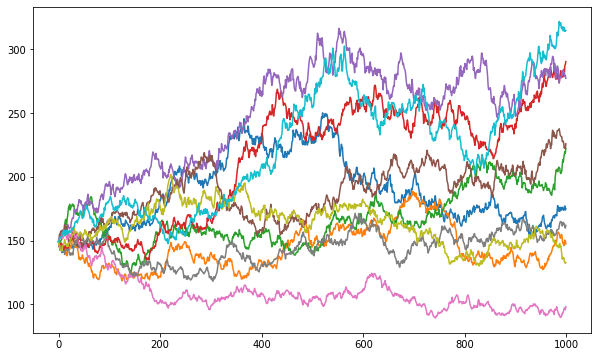

In [25]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [26]:
ordered = data['normed']
ordered.head()
ordered = ordered.dropna()
ordered.reset_index(drop=True, inplace=True)
ordered.sort_values(kind='quicksort', inplace=True)
ordered.reset_index(drop=True, inplace=True)

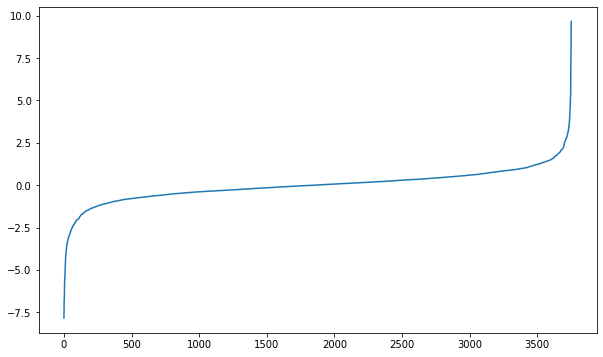

In [27]:
ordered.plot(figsize=(10, 6));

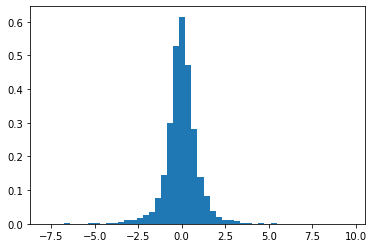

In [28]:
bins = plt.hist(ordered, bins=50, density=True, color=None, label=None, stacked=False)

In [29]:
ordered.mean()

0.0

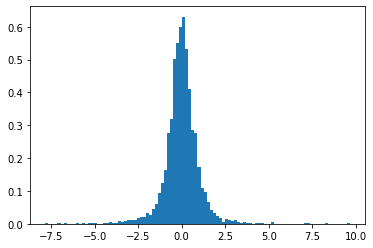

In [30]:
bins = plt.hist(ordered, bins=100, density=True, color=None, label=None, stacked=False)

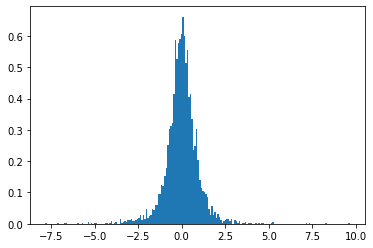

In [31]:
bins = plt.hist(ordered, bins=200, density=True, color=None, label=None, stacked=False)

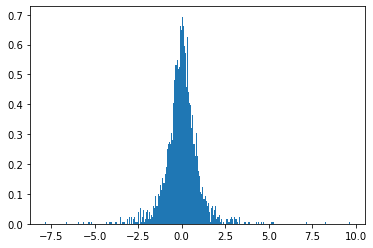

In [32]:
bins = plt.hist(ordered, bins=500, density=True, color=None, label=None, stacked=False)

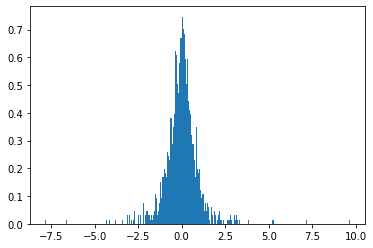

In [33]:
bins = plt.hist(ordered, bins=1000, density=True, color=None, label=None, stacked=False)

### Fama, the man behind the EMH, along with his advisor Mandelbrot, suggest that stock returns are Cauchy-distributed. MLE is used to identify the best-fitting parameter.

In [119]:
def get_cauchy_gamma(returns):
    best_odds = 0
    most_likely_gamma = .01
    for gamma_x_100000000 in tqdm(range(1,50000,1)):
        current_odds = odds(gamma_x_100000000/100000000, returns)
        print("current:" + str(current_odds) + ", best: " + str(best_odds))
        if current_odds > best_odds:
            best_odds = current_odds
            most_likely_gamma = gamma_x_100000000/100000000
    return most_likely_gamma

In [89]:
def odds(gamma, returns):
    sum = 0
    for entry in returns:
        sum = sum + cauchy_probability(entry, gamma)
    return sum

In [105]:
def cauchy_probability(x, gamma):
    top = np.arctan((x+.00000000001)/gamma)/np.pi
    bottom = np.arctan((x-.00000000001)/gamma)/np.pi
    return (top-bottom)

In [120]:
cauchy_estimate = get_cauchy_gamma(ordered)

  0%|          | 0/49999 [00:00<?, ?it/s]

current:6.519451645203844e-12, best: 0
current:1.3034628931762882e-11, best: 6.519451645203844e-12
current:1.9551693597463782e-11, best: 1.3034628931762882e-11
current:2.6071089731516395e-11, best: 1.9551693597463782e-11
current:3.258843195297345e-11, best: 2.6071089731516395e-11
current:3.910988199962162e-11, best: 3.258843195297345e-11
current:4.5623116395887564e-11, best: 3.910988199962162e-11
current:5.2142457018788946e-11, best: 4.5623116395887564e-11
current:5.865880003952384e-11, best: 5.2142457018788946e-11
current:6.518036110847447e-11, best: 5.865880003952384e-11
current:7.169487226121873e-11, best: 6.518036110847447e-11
current:7.821621128556444e-11, best: 7.169487226121873e-11
current:8.472988977104023e-11, best: 7.821621128556444e-11
current:9.124939692739531e-11, best: 8.472988977104023e-11
current:9.777173515246318e-11, best: 9.124939692739531e-11
current:1.0428602426060252e-10, best: 9.777173515246318e-11
current:1.108062530619236e-10, best: 1.0428602426060252e-10
curre

current:9.645487186737967e-10, best: 9.580347071214135e-10
current:9.710696136089325e-10, best: 9.645487186737967e-10
current:9.775828480051985e-10, best: 9.710696136089325e-10
current:9.840950832007422e-10, best: 9.775828480051985e-10
current:9.906147013793998e-10, best: 9.840950832007422e-10
current:9.971202197256446e-10, best: 9.906147013793998e-10
current:1.0036445008410055e-09, best: 9.971202197256446e-10
current:1.0101575687038178e-09, best: 1.0036445008410055e-09
current:1.0166716357673522e-09, best: 1.0101575687038178e-09
current:1.0231904767898925e-09, best: 1.0166716357673522e-09
current:1.029706708788325e-09, best: 1.0231904767898925e-09
current:1.0362224411863963e-09, best: 1.029706708788325e-09
current:1.0427346208707888e-09, best: 1.0362224411863963e-09
current:1.0492509638915237e-09, best: 1.0427346208707888e-09
current:1.0557629770424626e-09, best: 1.0492509638915237e-09
current:1.062282317665364e-09, best: 1.0557629770424626e-09
current:1.0687942197940004e-09, best: 1.

current:2.0325855443203977e-09, best: 2.0260784716619185e-09
current:2.03909861218321e-09, best: 2.0325855443203977e-09
current:2.0456052962636306e-09, best: 2.03909861218321e-09
current:2.0521103705206656e-09, best: 2.0456052962636306e-09
current:2.0586183313575646e-09, best: 2.0521103705206656e-09
current:2.065127124861732e-09, best: 2.0586183313575646e-09
current:2.0716347526317236e-09, best: 2.065127124861732e-09
current:2.078145711070789e-09, best: 2.0716347526317236e-09
current:2.084657502177123e-09, best: 2.078145711070789e-09
current:2.0911636866571826e-09, best: 2.084657502177123e-09
current:2.0976658743343535e-09, best: 2.0911636866571826e-09
current:2.1041766662399652e-09, best: 2.0976658743343535e-09
current:2.110682850720025e-09, best: 2.1041766662399652e-09
current:2.1171900344008066e-09, best: 2.110682850720025e-09
current:2.123693054745246e-09, best: 2.1171900344008066e-09
current:2.130207732431444e-09, best: 2.123693054745246e-09
current:2.136714249978411e-09, best: 2.

current:2.9235420750950425e-09, best: 2.917044106265365e-09
current:2.930038156545578e-09, best: 2.9235420750950425e-09
current:2.9365412324011686e-09, best: 2.930038156545578e-09
current:2.9430368697624942e-09, best: 2.9365412324011686e-09
current:2.949534005924903e-09, best: 2.9430368697624942e-09
current:2.9560340841783272e-09, best: 2.949534005924903e-09
current:2.9625255026921593e-09, best: 2.9560340841783272e-09
current:2.969025025834071e-09, best: 2.9625255026921593e-09
current:2.975524548975983e-09, best: 2.969025025834071e-09
current:2.982018076913562e-09, best: 2.975524548975983e-09
current:2.988519598456918e-09, best: 2.982018076913562e-09
current:2.995014902751336e-09, best: 2.988519598456918e-09
current:3.001511095224174e-09, best: 2.995014902751336e-09
current:3.008008508942339e-09, best: 3.001511095224174e-09
current:3.014502536480279e-09, best: 3.008008508942339e-09
current:3.021000172243049e-09, best: 3.014502536480279e-09
current:3.0274957540932235e-09, best: 3.021000

current:4.007281007023522e-09, best: 4.000798636827341e-09
current:4.01375915837221e-09, best: 4.007281007023522e-09
current:4.0202386974996784e-09, best: 4.01375915837221e-09
current:4.026720568095499e-09, best: 4.0202386974996784e-09
current:4.033197109620801e-09, best: 4.026720568095499e-09
current:4.03967759243784e-09, best: 4.033197109620801e-09
current:4.046165846816052e-09, best: 4.03967759243784e-09
current:4.0526422218079006e-09, best: 4.046165846816052e-09
current:4.059120928268101e-09, best: 4.0526422218079006e-09
current:4.065594250146631e-09, best: 4.059120928268101e-09
current:4.072075066030578e-09, best: 4.065594250146631e-09
current:4.078554660669198e-09, best: 4.072075066030578e-09
current:4.0850346438858764e-09, best: 4.078554660669198e-09
current:4.091509520076642e-09, best: 4.0850346438858764e-09
current:4.097987560403027e-09, best: 4.091509520076642e-09
current:4.104467044019344e-09, best: 4.097987560403027e-09
current:4.1109481929701985e-09, best: 4.10446704401934

current:5.0746938318191326e-09, best: 5.068235331417981e-09
current:5.081152054664528e-09, best: 5.0746938318191326e-09
current:5.0876084456419335e-09, best: 5.081152054664528e-09
current:5.094064059463221e-09, best: 5.0876084456419335e-09
current:5.1005226153755245e-09, best: 5.094064059463221e-09
current:5.1069765638622755e-09, best: 5.1005226153755245e-09
current:5.1134341205738565e-09, best: 5.1069765638622755e-09
current:5.119895452043721e-09, best: 5.1134341205738565e-09
current:5.126348789907809e-09, best: 5.119895452043721e-09
current:5.132806180085936e-09, best: 5.126348789907809e-09
current:5.1392612387957115e-09, best: 5.132806180085936e-09
current:5.145716852616999e-09, best: 5.1392612387957115e-09
current:5.152170079458784e-09, best: 5.145716852616999e-09
current:5.158624027945535e-09, best: 5.152170079458784e-09
current:5.165082694880141e-09, best: 5.158624027945535e-09
current:5.171536421322287e-09, best: 5.165082694880141e-09
current:5.177992479232785e-09, best: 5.17153

current:5.97068783303456e-09, best: 5.964250759937784e-09
current:5.977121797506868e-09, best: 5.97068783303456e-09
current:5.983553652555429e-09, best: 5.977121797506868e-09
current:5.989990670141054e-09, best: 5.983553652555429e-09
current:5.996422636211918e-09, best: 5.989990670141054e-09
current:6.002852714903639e-09, best: 5.996422636211918e-09
current:6.009286734887098e-09, best: 6.002852714903639e-09
current:6.015721643048977e-09, best: 6.009286734887098e-09
current:6.02215000089501e-09, best: 6.015721643048977e-09
current:6.028585908257611e-09, best: 6.02215000089501e-09
current:6.03501720819466e-09, best: 6.028585908257611e-09
current:6.0414445113288195e-09, best: 6.03501720819466e-09
current:6.0478794750018494e-09, best: 6.0414445113288195e-09
current:6.054310719427747e-09, best: 6.0478794750018494e-09
current:6.060744517366601e-09, best: 6.054310719427747e-09
current:6.067175872814801e-09, best: 6.060744517366601e-09
current:6.0736106144432256e-09, best: 6.067175872814801e-0

current:6.9464609619984685e-09, best: 6.940057861726245e-09
current:6.9528661716944384e-09, best: 6.9464609619984685e-09
current:6.95927099281235e-09, best: 6.9528661716944384e-09
current:6.965677978865159e-09, best: 6.95927099281235e-09
current:6.972076971312191e-09, best: 6.965677978865159e-09
current:6.978484623498815e-09, best: 6.972076971312191e-09
current:6.984881339988647e-09, best: 6.978484623498815e-09
current:6.991284717816626e-09, best: 6.984881339988647e-09
current:6.997686985421581e-09, best: 6.991284717816626e-09
current:7.004098800944547e-09, best: 6.997686985421581e-09
current:7.010494740278261e-09, best: 7.004098800944547e-09
current:7.016896952372065e-09, best: 7.010494740278261e-09
current:7.0233044935363864e-09, best: 7.016896952372065e-09
current:7.02969948918053e-09, best: 7.0233044935363864e-09
current:7.036105420521466e-09, best: 7.02969948918053e-09
current:7.042500194121004e-09, best: 7.036105420521466e-09
current:7.048905070750067e-09, best: 7.042500194121004

current:7.891917508384694e-09, best: 7.885550989961132e-09
current:7.898293741259721e-09, best: 7.891917508384694e-09
current:7.904662091551273e-09, best: 7.898293741259721e-09
current:7.911033994556504e-09, best: 7.904662091551273e-09
current:7.917406785740155e-09, best: 7.911033994556504e-09
current:7.923772915585658e-09, best: 7.917406785740155e-09
current:7.930143708367865e-09, best: 7.923772915585658e-09
current:7.936515500350794e-09, best: 7.930143708367865e-09
current:7.942879021172189e-09, best: 7.936515500350794e-09
current:7.949251090710874e-09, best: 7.942879021172189e-09
current:7.955622993716105e-09, best: 7.949251090710874e-09
current:7.961991788096867e-09, best: 7.955622993716105e-09
current:7.968362358834469e-09, best: 7.961991788096867e-09
current:7.974729820947601e-09, best: 7.968362358834469e-09
current:7.981097227549583e-09, best: 7.974729820947601e-09
current:7.987463745973145e-09, best: 7.981097227549583e-09
current:7.993832040753546e-09, best: 7.987463745973145e-

current:8.914526505865439e-09, best: 8.90819484844485e-09
current:8.920860217198623e-09, best: 8.914526505865439e-09
current:8.92719137501885e-09, best: 8.920860217198623e-09
current:8.933522255283322e-09, best: 8.92719137501885e-09
current:8.939852025324768e-09, best: 8.933522255283322e-09
current:8.946184348879171e-09, best: 8.939852025324768e-09
current:8.952513341764501e-09, best: 8.946184348879171e-09
current:8.95883373042139e-09, best: 8.952513341764501e-09
current:8.965168551977598e-09, best: 8.95883373042139e-09
current:8.971492826415073e-09, best: 8.965168551977598e-09
current:8.977822762989973e-09, best: 8.971492826415073e-09
current:8.984154031832503e-09, best: 8.977822762989973e-09
current:8.990486355386906e-09, best: 8.984154031832503e-09
current:8.996808908978693e-09, best: 8.990486355386906e-09
current:9.003133849549982e-09, best: 8.996808908978693e-09
current:9.009461121589624e-09, best: 9.003133849549982e-09
current:9.015792334921002e-09, best: 9.009461121589624e-09
cu

current:9.96169086109333e-09, best: 9.955408886153094e-09
current:9.967972613988962e-09, best: 9.96169086109333e-09
current:9.974259196354751e-09, best: 9.967972613988962e-09
current:9.980544835030969e-09, best: 9.974259196354751e-09
current:9.986822313567956e-09, best: 9.980544835030969e-09
current:9.993107064065754e-09, best: 9.986822313567956e-09
current:9.99939309132003e-09, best: 9.993107064065754e-09
current:1.0005678507951643e-08, best: 9.99939309132003e-09
current:1.0011958428979284e-08, best: 1.0005678507951643e-08
current:1.0018239238185345e-08, best: 1.0011958428979284e-08
current:1.0024517271833844e-08, best: 1.0018239238185345e-08
current:1.0030800190463651e-08, best: 1.0024517271833844e-08
current:1.0037087494474406e-08, best: 1.0030800190463651e-08
current:1.00433653060783e-08, best: 1.0037087494474406e-08
current:1.0049649501464586e-08, best: 1.00433653060783e-08
current:1.0055921983997962e-08, best: 1.0049649501464586e-08
current:1.0062207289607272e-08, best: 1.0055921

current:1.1386601828089482e-08, best: 1.1380394737692257e-08
current:1.1392819299071988e-08, best: 1.1386601828089482e-08
current:1.1399028332359507e-08, best: 1.1392819299071988e-08
current:1.1405239197515016e-08, best: 1.1399028332359507e-08
current:1.1411453393339599e-08, best: 1.1405239197515016e-08
current:1.1417668033253392e-08, best: 1.1411453393339599e-08
current:1.1423879231475809e-08, best: 1.1417668033253392e-08
current:1.1430082602625902e-08, best: 1.1423879231475809e-08
current:1.1436296409872426e-08, best: 1.1430082602625902e-08
current:1.144251104978622e-08, best: 1.1436296409872426e-08
current:1.1448717862627689e-08, best: 1.144251104978622e-08
current:1.1454934334409472e-08, best: 1.1448717862627689e-08
current:1.1461135152046609e-08, best: 1.1454934334409472e-08
current:1.1467346738847084e-08, best: 1.1461135152046609e-08
current:1.14735556611123e-08, best: 1.1467346738847084e-08
current:1.1479760309018872e-08, best: 1.14735556611123e-08
current:1.1485970785596322e-08

current:1.2437922691788117e-08, best: 1.2431765783471604e-08
current:1.2444074715123321e-08, best: 1.2437922691788117e-08
current:1.24502233522783e-08, best: 1.2444074715123321e-08
current:1.2456385756198785e-08, best: 1.24502233522783e-08
current:1.2462533505175344e-08, best: 1.2456385756198785e-08
current:1.2468686028110909e-08, best: 1.2462533505175344e-08
current:1.2474835886511215e-08, best: 1.2468686028110909e-08
current:1.248099562589644e-08, best: 1.2474835886511215e-08
current:1.2487149925188845e-08, best: 1.248099562589644e-08
current:1.2493300061144907e-08, best: 1.2487149925188845e-08
current:1.2499444146385486e-08, best: 1.2493300061144907e-08
current:1.2505602664525384e-08, best: 1.2499444146385486e-08
current:1.251174891470086e-08, best: 1.2505602664525384e-08
current:1.2517900160879947e-08, best: 1.251174891470086e-08
current:1.2524049797235648e-08, best: 1.2517900160879947e-08
current:1.2530196602522636e-08, best: 1.2524049797235648e-08
current:1.2536347959724026e-08, 

current:1.340574801167449e-08, best: 1.3399652332157785e-08
current:1.3411843247101984e-08, best: 1.340574801167449e-08
current:1.3417936095549976e-08, best: 1.3411843247101984e-08
current:1.3424028721953363e-08, best: 1.3417936095549976e-08
current:1.3430127954183746e-08, best: 1.3424028721953363e-08
current:1.3436225299034987e-08, best: 1.3430127954183746e-08
current:1.3442316149081535e-08, best: 1.3436225299034987e-08
current:1.344840960815219e-08, best: 1.3442316149081535e-08
current:1.3454502900689391e-08, best: 1.344840960815219e-08
current:1.3460594028291695e-08, best: 1.3454502900689391e-08
current:1.3466687320828896e-08, best: 1.3460594028291695e-08
current:1.3472778725986956e-08, best: 1.3466687320828896e-08
current:1.3478872795680275e-08, best: 1.3472778725986956e-08
current:1.3484957595011338e-08, best: 1.3478872795680275e-08
current:1.3491050165903573e-08, best: 1.3484957595011338e-08
current:1.349714146003933e-08, best: 1.3491050165903573e-08
current:1.3503232254574726e-0

current:1.4237225731683623e-08, best: 1.423118378696131e-08
current:1.4243272061786882e-08, best: 1.4237225731683623e-08
current:1.424931106441818e-08, best: 1.4243272061786882e-08
current:1.425534656984695e-08, best: 1.424931106441818e-08
current:1.4261392289327546e-08, best: 1.425534656984695e-08
current:1.4267436954096269e-08, best: 1.4261392289327546e-08
current:1.427347479099339e-08, best: 1.4267436954096269e-08
current:1.4279510240911009e-08, best: 1.427347479099339e-08
current:1.4285555127724336e-08, best: 1.4279510240911009e-08
current:1.4291589967019291e-08, best: 1.4285555127724336e-08
current:1.429762680471569e-08, best: 1.4291589967019291e-08
current:1.4303662088099856e-08, best: 1.429762680471569e-08
current:1.4309701645842665e-08, best: 1.4303662088099856e-08
current:1.4315741148074324e-08, best: 1.4309701645842665e-08
current:1.4321774377545893e-08, best: 1.4315741148074324e-08
current:1.4327810160530419e-08, best: 1.4321774377545893e-08
current:1.4333848830094809e-08, b

current:1.5126961405709238e-08, best: 1.5120983298810842e-08
current:1.5132945729856573e-08, best: 1.5126961405709238e-08
current:1.513892694537944e-08, best: 1.5132945729856573e-08
current:1.5144903331432147e-08, best: 1.513892694537944e-08
current:1.51508862678007e-08, best: 1.5144903331432147e-08
current:1.515686809394623e-08, best: 1.51508862678007e-08
current:1.5162839872573386e-08, best: 1.515686809394623e-08
current:1.5168819422761715e-08, best: 1.5162839872573386e-08
current:1.5174798528860833e-08, best: 1.5168819422761715e-08
current:1.51807775794488e-08, best: 1.5174798528860833e-08
current:1.5186755131235685e-08, best: 1.51807775794488e-08
current:1.519272868621968e-08, best: 1.5186755131235685e-08
current:1.5198708902541824e-08, best: 1.519272868621968e-08
current:1.5204678294189478e-08, best: 1.5198708902541824e-08
current:1.5210659065623133e-08, best: 1.5204678294189478e-08
current:1.5216628235226182e-08, best: 1.5210659065623133e-08
current:1.5222607008258393e-08, best: 

current:1.6202448771540645e-08, best: 1.6196547159008645e-08
current:1.6208352215940636e-08, best: 1.6202448771540645e-08
current:1.6214252884783065e-08, best: 1.6208352215940636e-08
current:1.6220157994517592e-08, best: 1.6214252884783065e-08
current:1.6226055721269006e-08, best: 1.6220157994517592e-08
current:1.623195888811324e-08, best: 1.6226055721269006e-08
current:1.623785689242041e-08, best: 1.623195888811324e-08
current:1.624376028130925e-08, best: 1.623785689242041e-08
current:1.6249654510858136e-08, best: 1.624376028130925e-08
current:1.6255547574672846e-08, best: 1.6249654510858136e-08
current:1.6261448354537578e-08, best: 1.6255547574672846e-08
current:1.6267348634801948e-08, best: 1.6261448354537578e-08
current:1.6273246028486454e-08, best: 1.6267348634801948e-08
current:1.6279140480079946e-08, best: 1.6273246028486454e-08
current:1.628503548678495e-08, best: 1.6279140480079946e-08
current:1.6290935433982412e-08, best: 1.628503548678495e-08
current:1.6296830052109357e-08, 

current:1.731565768547938e-08, best: 1.7309838673540412e-08
current:1.7321472978171215e-08, best: 1.731565768547938e-08
current:1.7327283663437498e-08, best: 1.7321472978171215e-08
current:1.733309917817394e-08, best: 1.7327283663437498e-08
current:1.7338915858644555e-08, best: 1.733309917817394e-08
current:1.7344726321866233e-08, best: 1.7338915858644555e-08
current:1.7350535619353735e-08, best: 1.7344726321866233e-08
current:1.7356349413244487e-08, best: 1.7350535619353735e-08
current:1.736216503900323e-08, best: 1.7356349413244487e-08
current:1.736797156093317e-08, best: 1.736216503900323e-08
current:1.7373786798113855e-08, best: 1.736797156093317e-08
current:1.7379598371558558e-08, best: 1.7373786798113855e-08
current:1.7385402395486693e-08, best: 1.7379598371558558e-08
current:1.7391218021245436e-08, best: 1.7385402395486693e-08
current:1.7397024987264587e-08, best: 1.7391218021245436e-08
current:1.740283162021683e-08, best: 1.7397024987264587e-08
current:1.740863586618957e-08, be

current:1.8130857037945702e-08, best: 1.8125110634592545e-08
current:1.813660388538807e-08, best: 1.8130857037945702e-08
current:1.8142357283146282e-08, best: 1.813660388538807e-08
current:1.8148096414538628e-08, best: 1.8142357283146282e-08
current:1.8153847314295035e-08, best: 1.8148096414538628e-08
current:1.815958822204422e-08, best: 1.8153847314295035e-08
current:1.81653356245981e-08, best: 1.815958822204422e-08
current:1.8171081361817443e-08, best: 1.81653356245981e-08
current:1.817682010463173e-08, best: 1.8171081361817443e-08
current:1.8182565952873375e-08, best: 1.817682010463173e-08
current:1.818830458466536e-08, best: 1.8182565952873375e-08
current:1.8194052708864206e-08, best: 1.818830458466536e-08
current:1.8199790563500073e-08, best: 1.8194052708864206e-08
current:1.820553607867481e-08, best: 1.8199790563500073e-08
current:1.8211276320290182e-08, best: 1.820553607867481e-08
current:1.8217014841059864e-08, best: 1.8211276320290182e-08
current:1.8222759190500426e-08, best: 

current:1.8970455428757305e-08, best: 1.89647812454119e-08
current:1.8976139826154537e-08, best: 1.8970455428757305e-08
current:1.8981814398078e-08, best: 1.8976139826154537e-08
current:1.8987479533105756e-08, best: 1.8981814398078e-08
current:1.8993157935298655e-08, best: 1.8987479533105756e-08
current:1.8998825679350517e-08, best: 1.8993157935298655e-08
current:1.900449925207326e-08, best: 1.8998825679350517e-08
current:1.9010169938216137e-08, best: 1.900449925207326e-08
current:1.9015842289693552e-08, best: 1.9010169938216137e-08
current:1.9021513752992547e-08, best: 1.9015842289693552e-08
current:1.9027185660380752e-08, best: 1.9021513752992547e-08
current:1.9032855347322908e-08, best: 1.9027185660380752e-08
current:1.903852259177441e-08, best: 1.9032855347322908e-08
current:1.9044191057471238e-08, best: 1.903852259177441e-08
current:1.9049859856234974e-08, best: 1.9044191057471238e-08
current:1.9055529376643676e-08, best: 1.9049859856234974e-08
current:1.9061194622693733e-08, best

current:1.990554199249317e-08, best: 1.989995013218504e-08
current:1.9911131854399855e-08, best: 1.990554199249317e-08
current:1.9916721938351145e-08, best: 1.9911131854399855e-08
current:1.9922310523501352e-08, best: 1.9916721938351145e-08
current:1.9927896111049392e-08, best: 1.9922310523501352e-08
current:1.9933487194201405e-08, best: 1.9927896111049392e-08
current:1.9939074002994772e-08, best: 1.9933487194201405e-08
current:1.9944663698368004e-08, best: 1.9939074002994772e-08
current:1.995024545564661e-08, best: 1.9944663698368004e-08
current:1.9955829155815508e-08, best: 1.995024545564661e-08
current:1.9961420127945217e-08, best: 1.9955829155815508e-08
current:1.9967002051757277e-08, best: 1.9961420127945217e-08
current:1.9972594411665767e-08, best: 1.9967002051757277e-08
current:1.997816923005047e-08, best: 1.9972594411665767e-08
current:1.9983759536046364e-08, best: 1.997816923005047e-08
current:1.9989340516168852e-08, best: 1.9983759536046364e-08
current:1.9994918942778384e-08,

current:2.0930827737686286e-08, best: 2.0925336796651095e-08
current:2.093632506250387e-08, best: 2.0930827737686286e-08
current:2.0941806289087594e-08, best: 2.093632506250387e-08
current:2.0947307555196915e-08, best: 2.0941806289087594e-08
current:2.0952794554940368e-08, best: 2.0947307555196915e-08
current:2.095828732784355e-08, best: 2.0952794554940368e-08
current:2.096378187710357e-08, best: 2.095828732784355e-08
current:2.0969266101289463e-08, best: 2.096378187710357e-08
current:2.0974752434899102e-08, best: 2.0969266101289463e-08
current:2.0980246040469552e-08, best: 2.0974752434899102e-08
current:2.0985731152833864e-08, best: 2.0980246040469552e-08
current:2.099121915177804e-08, best: 2.0985731152833864e-08
current:2.0996708316456392e-08, best: 2.099121915177804e-08
current:2.1002192207575376e-08, best: 2.0996708316456392e-08
current:2.1007681205720274e-08, best: 2.1002192207575376e-08
current:2.101316104452522e-08, best: 2.1007681205720274e-08
current:2.1018651763515805e-08, b

current:2.1937841654384727e-08, best: 2.1932445470884687e-08
current:2.1943227901388695e-08, best: 2.1937841654384727e-08
current:2.194862336324377e-08, best: 2.1943227901388695e-08
current:2.19540169377197e-08, best: 2.194862336324377e-08
current:2.195940584925893e-08, best: 2.19540169377197e-08
current:2.196480308747084e-08, best: 2.195940584925893e-08
current:2.1970185393183073e-08, best: 2.196480308747084e-08
current:2.197557741334677e-08, best: 2.1970185393183073e-08
current:2.198096826777629e-08, best: 2.197557741334677e-08
current:2.1986352405356513e-08, best: 2.198096826777629e-08
current:2.1991741927518405e-08, best: 2.1986352405356513e-08
current:2.1997125621009417e-08, best: 2.1991741927518405e-08
current:2.2002513255792167e-08, best: 2.1997125621009417e-08
current:2.2007899891374194e-08, best: 2.2002513255792167e-08
current:2.2013284028954416e-08, best: 2.2007899891374194e-08
current:2.2018676104629265e-08, best: 2.2013284028954416e-08
current:2.202405591233969e-08, best: 2

current:2.3153033712475235e-08, best: 2.314776487155612e-08
current:2.3158296058589656e-08, best: 2.3153033712475235e-08
current:2.3163571283291162e-08, best: 2.3158296058589656e-08
current:2.316882585784441e-08, best: 2.3163571283291162e-08
current:2.317409258933978e-08, best: 2.316882585784441e-08
current:2.317935543505456e-08, best: 2.317409258933978e-08
current:2.31846209453046e-08, best: 2.317935543505456e-08
current:2.3189883846530535e-08, best: 2.31846209453046e-08
current:2.319514641468956e-08, best: 2.3189883846530535e-08
current:2.3200405374623756e-08, best: 2.319514641468956e-08
current:2.320566339086838e-08, best: 2.3200405374623756e-08
current:2.321092379409251e-08, best: 2.320566339086838e-08
current:2.3216184141805485e-08, best: 2.321092379409251e-08
current:2.322144393440695e-08, best: 2.3216184141805485e-08
current:2.3226704282119925e-08, best: 2.322144393440695e-08
current:2.323196279796491e-08, best: 2.3226704282119925e-08
current:2.3237219815008814e-08, best: 2.3231

current:2.4420992450480128e-08, best: 2.4415867383442702e-08
current:2.4426117128939495e-08, best: 2.4420992450480128e-08
current:2.443124530460139e-08, best: 2.4426117128939495e-08
current:2.443636643034708e-08, best: 2.443124530460139e-08
current:2.4441491830451412e-08, best: 2.443636643034708e-08
current:2.4446620339180214e-08, best: 2.4441491830451412e-08
current:2.4451742575148927e-08, best: 2.4446620339180214e-08
current:2.4456866865030236e-08, best: 2.4451742575148927e-08
current:2.44619891565101e-08, best: 2.4456866865030236e-08
current:2.4467107395675924e-08, best: 2.44619891565101e-08
current:2.4472230408800755e-08, best: 2.4467107395675924e-08
current:2.447734875898888e-08, best: 2.4472230408800755e-08
current:2.4482471328024502e-08, best: 2.447734875898888e-08
current:2.4487586736121614e-08, best: 2.4482471328024502e-08
current:2.4492705863465858e-08, best: 2.4487586736121614e-08
current:2.4497826600633488e-08, best: 2.4492705863465858e-08
current:2.4502941009529877e-08, be

current:2.526902126431807e-08, best: 2.5263983627343833e-08
current:2.527404596719407e-08, best: 2.526902126431807e-08
current:2.5279073556649934e-08, best: 2.527404596719407e-08
current:2.528410486535293e-08, best: 2.5279073556649934e-08
current:2.5289131622141525e-08, best: 2.528410486535293e-08
current:2.5294154548660686e-08, best: 2.5289131622141525e-08
current:2.529918030624856e-08, best: 2.5294154548660686e-08
current:2.5304210726773135e-08, best: 2.529918030624856e-08
current:2.530923653987216e-08, best: 2.5304210726773135e-08
current:2.5314256080211095e-08, best: 2.530923653987216e-08
current:2.5319286112157613e-08, best: 2.5314256080211095e-08
current:2.5324306041074607e-08, best: 2.5319286112157613e-08
current:2.5329323027900585e-08, best: 2.5324306041074607e-08
current:2.5334342845795277e-08, best: 2.5329323027900585e-08
current:2.5339369880139628e-08, best: 2.5334342845795277e-08
current:2.534438786616633e-08, best: 2.5339369880139628e-08
current:2.534941223597542e-08, best

current:2.6120411777963426e-08, best: 2.6115483831024022e-08
current:2.61253383926352e-08, best: 2.6120411777963426e-08
current:2.6130271890689727e-08, best: 2.61253383926352e-08
current:2.6135197783716535e-08, best: 2.6130271890689727e-08
current:2.6140124731455217e-08, best: 2.6135197783716535e-08
current:2.614504995834821e-08, best: 2.6140124731455217e-08
current:2.6149971132927163e-08, best: 2.614504995834821e-08
current:2.6154895804708644e-08, best: 2.6149971132927163e-08
current:2.615982297449193e-08, best: 2.6154895804708644e-08
current:2.6164743316403616e-08, best: 2.615982297449193e-08
current:2.6169668210229702e-08, best: 2.6164743316403616e-08
current:2.6174587552940665e-08, best: 2.6169668210229702e-08
current:2.6179509060586525e-08, best: 2.6174587552940665e-08
current:2.6184428236764035e-08, best: 2.6179509060586525e-08
current:2.6189351631789037e-08, best: 2.6184428236764035e-08
current:2.6194271196544605e-08, best: 2.6189351631789037e-08
current:2.6199191871523198e-08, 

current:2.6988244306025422e-08, best: 2.698342782547769e-08
current:2.6993063118041505e-08, best: 2.6988244306025422e-08
current:2.6997889535085307e-08, best: 2.6993063118041505e-08
current:2.7002709068746356e-08, best: 2.6997889535085307e-08
current:2.7007525160716028e-08, best: 2.7002709068746356e-08
current:2.701234841362421e-08, best: 2.7007525160716028e-08
current:2.7017167003595688e-08, best: 2.701234841362421e-08
current:2.702198848014703e-08, best: 2.7017167003595688e-08
current:2.702680496069476e-08, best: 2.702198848014703e-08
current:2.7031617055861545e-08, best: 2.702680496069476e-08
current:2.7036432981297764e-08, best: 2.7031617055861545e-08
current:2.7041250794113125e-08, best: 2.7036432981297764e-08
current:2.704606694159395e-08, best: 2.7041250794113125e-08
current:2.7050884920942764e-08, best: 2.704606694159395e-08
current:2.7055699125533295e-08, best: 2.7050884920942764e-08
current:2.7060508778209424e-08, best: 2.7055699125533295e-08
current:2.7065323982000677e-08, b

current:2.7652751866114045e-08, best: 2.7648015377135238e-08
current:2.765749368416337e-08, best: 2.7652751866114045e-08
current:2.7662230006608723e-08, best: 2.765749368416337e-08
current:2.766697010381236e-08, best: 2.7662230006608723e-08
current:2.767170392825591e-08, best: 2.766697010381236e-08
current:2.7676441638480043e-08, best: 2.767170392825591e-08
current:2.7681179626259933e-08, best: 2.7676441638480043e-08
current:2.7685910841679373e-08, best: 2.7681179626259933e-08
current:2.7690646497990912e-08, best: 2.7685910841679373e-08
current:2.7695384263726197e-08, best: 2.7690646497990912e-08
current:2.770011331421074e-08, best: 2.7695384263726197e-08
current:2.770484597292011e-08, best: 2.770011331421074e-08
current:2.7709577299361854e-08, best: 2.770484597292011e-08
current:2.7714310513182738e-08, best: 2.7709577299361854e-08
current:2.7719038564466558e-08, best: 2.7714310513182738e-08
current:2.7723772333398955e-08, best: 2.7719038564466558e-08
current:2.772850282717343e-08, bes

current:2.8393982054453204e-08, best: 2.8389337325407382e-08
current:2.839862422998607e-08, best: 2.8393982054453204e-08
current:2.840326573938512e-08, best: 2.839862422998607e-08
current:2.8407907581851077e-08, best: 2.840326573938512e-08
current:2.8412546204670264e-08, best: 2.8407907581851077e-08
current:2.8417188768781187e-08, best: 2.8412546204670264e-08
current:2.8421833220271253e-08, best: 2.8417188768781187e-08
current:2.8426471621045835e-08, best: 2.8421833220271253e-08
current:2.8431109466708904e-08, best: 2.8426471621045835e-08
current:2.8435742815968723e-08, best: 2.8431109466708904e-08
current:2.8440385269057344e-08, best: 2.8435742815968723e-08
current:2.8445024891077253e-08, best: 2.8440385269057344e-08
current:2.8449657518692106e-08, best: 2.8445024891077253e-08
current:2.845429919462461e-08, best: 2.8449657518692106e-08
current:2.8458928325036936e-08, best: 2.845429919462461e-08
current:2.8463563117586688e-08, best: 2.8458928325036936e-08
current:2.846819791013644e-08,

current:2.9301541193405e-08, best: 2.9297017589691166e-08
current:2.9306068294321364e-08, best: 2.9301541193405e-08
current:2.9310587623676554e-08, best: 2.9306068294321364e-08
current:2.9315113281302985e-08, best: 2.9310587623676554e-08
current:2.9319631167368243e-08, best: 2.9315113281302985e-08
current:2.9324152828191785e-08, best: 2.9319631167368243e-08
current:2.9328673156747698e-08, best: 2.9324152828191785e-08
current:2.933319215303598e-08, best: 2.9328673156747698e-08
current:2.9337712259547288e-08, best: 2.933319215303598e-08
current:2.9342232865658957e-08, best: 2.9337712259547288e-08
current:2.9346747199010537e-08, best: 2.9342232865658957e-08
current:2.9351262864629746e-08, best: 2.9346747199010537e-08
current:2.9355784358919834e-08, best: 2.9351262864629746e-08
current:2.936029991351674e-08, best: 2.9355784358919834e-08
current:2.936481152682191e-08, best: 2.936029991351674e-08
current:2.9369330134532134e-08, best: 2.936481152682191e-08
current:2.937384524503983e-08, best:

current:3.010597060537634e-08, best: 3.010154986382574e-08
current:3.011038296474311e-08, best: 3.010597060537634e-08
current:3.0114793381219584e-08, best: 3.011038296474311e-08
current:3.011921007045615e-08, best: 3.0114793381219584e-08
current:3.012361843302003e-08, best: 3.011921007045615e-08
current:3.0128025796383184e-08, best: 3.012361843302003e-08
current:3.0132442818686656e-08, best: 3.0128025796383184e-08
current:3.0136849904494056e-08, best: 3.0132442818686656e-08
current:3.0141261875282765e-08, best: 3.0136849904494056e-08
current:3.0145671681136577e-08, best: 3.0141261875282765e-08
current:3.0150079155522036e-08, best: 3.0145671681136577e-08
current:3.015448962750966e-08, best: 3.0150079155522036e-08
current:3.0158892272424964e-08, best: 3.015448962750966e-08
current:3.016330052396654e-08, best: 3.0158892272424964e-08
current:3.0167710496353806e-08, best: 3.016330052396654e-08
current:3.0172114307003284e-08, best: 3.0167710496353806e-08
current:3.0176517784585855e-08, best:

current:3.076129628798441e-08, best: 3.075697463383875e-08
current:3.0765620218087264e-08, best: 3.076129628798441e-08
current:3.076994192774407e-08, best: 3.0765620218087264e-08
current:3.077426141695483e-08, best: 3.076994192774407e-08
current:3.0778583126611636e-08, best: 3.077426141695483e-08
current:3.0782908999604786e-08, best: 3.0778583126611636e-08
current:3.0787226323880645e-08, best: 3.0782908999604786e-08
current:3.079155164176228e-08, best: 3.0787226323880645e-08
current:3.0795867300703605e-08, best: 3.079155164176228e-08
current:3.080018429191256e-08, best: 3.0795867300703605e-08
current:3.080449439973876e-08, best: 3.080018429191256e-08
current:3.080881727512974e-08, best: 3.080449439973876e-08
current:3.081313143526998e-08, best: 3.080881727512974e-08
current:3.081745020283577e-08, best: 3.081313143526998e-08
current:3.0821765417687885e-08, best: 3.081745020283577e-08
current:3.0826080410495393e-08, best: 3.0821765417687885e-08
current:3.083039024076584e-08, best: 3.0826

current:3.162644751641963e-08, best: 3.162224382347034e-08
current:3.1630648766878267e-08, best: 3.162644751641963e-08
current:3.1634846520134374e-08, best: 3.1630648766878267e-08
current:3.163904610525847e-08, best: 3.1634846520134374e-08
current:3.164323891802212e-08, best: 3.163904610525847e-08
current:3.1647441445237234e-08, best: 3.164323891802212e-08
current:3.165164397245235e-08, best: 3.1647441445237234e-08
current:3.1655831844723537e-08, best: 3.165164397245235e-08
current:3.166003109678073e-08, best: 3.1655831844723537e-08
current:3.1664228905547986e-08, best: 3.166003109678073e-08
current:3.166841622270766e-08, best: 3.1664228905547986e-08
current:3.1672610978361604e-08, best: 3.166841622270766e-08
current:3.167680778792814e-08, best: 3.1672610978361604e-08
current:3.1681001377847906e-08, best: 3.167680778792814e-08
current:3.1685197354747174e-08, best: 3.1681001377847906e-08
current:3.168938317310577e-08, best: 3.1685197354747174e-08
current:3.169357448706833e-08, best: 3.1

current:3.225381717264497e-08, best: 3.2249711012788396e-08
current:3.225792688521523e-08, best: 3.225381717264497e-08
current:3.226203970640995e-08, best: 3.225792688521523e-08
current:3.226614059270716e-08, best: 3.226203970640995e-08
current:3.227025108243353e-08, best: 3.226614059270716e-08
current:3.2274360295403426e-08, best: 3.227025108243353e-08
current:3.227846412379165e-08, best: 3.2274360295403426e-08
current:3.228256723053491e-08, best: 3.227846412379165e-08
current:3.22866716695458e-08, best: 3.228256723053491e-08
current:3.2290774720777904e-08, best: 3.22866716695458e-08
current:3.229488088063448e-08, best: 3.2290774720777904e-08
current:3.2298984320444646e-08, best: 3.229488088063448e-08
current:3.230308626145373e-08, best: 3.2298984320444646e-08
current:3.230719036739771e-08, best: 3.230308626145373e-08
current:3.2311287478936634e-08, best: 3.230719036739771e-08
current:3.231538731052197e-08, best: 3.2311287478936634e-08
current:3.231948103588067e-08, best: 3.2315387310

current:3.330586395566826e-08, best: 3.330191700179341e-08
current:3.3309822677907164e-08, best: 3.330586395566826e-08
current:3.331377546045289e-08, best: 3.3309822677907164e-08
current:3.3317726133574865e-08, best: 3.331377546045289e-08
current:3.332166992331409e-08, best: 3.3317726133574865e-08
current:3.3325632198266675e-08, best: 3.332166992331409e-08
current:3.332957465573827e-08, best: 3.3325632198266675e-08
current:3.3333519833256275e-08, best: 3.332957465573827e-08
current:3.3337471894157034e-08, best: 3.3333519833256275e-08
current:3.334141845945382e-08, best: 3.3337471894157034e-08
current:3.334536524679521e-08, best: 3.334141845945382e-08
current:3.3349311312491636e-08, best: 3.334536524679521e-08
current:3.3353257045121154e-08, best: 3.3349311312491636e-08
current:3.335720394348485e-08, best: 3.3353257045121154e-08
current:3.336115300678344e-08, best: 3.335720394348485e-08
current:3.3365091800519053e-08, best: 3.336115300678344e-08
current:3.336903653394785e-08, best: 3.33

current:3.446872798296141e-08, best: 3.4464951836898905e-08
current:3.4472499910176424e-08, best: 3.446872798296141e-08
current:3.447627194841374e-08, best: 3.4472499910176424e-08
current:3.448004931572157e-08, best: 3.447627194841374e-08
current:3.4483821298447737e-08, best: 3.448004931572157e-08
current:3.4487592059928573e-08, best: 3.4483821298447737e-08
current:3.449136543043352e-08, best: 3.4487592059928573e-08
current:3.449513269471183e-08, best: 3.449136543043352e-08
current:3.449890423334878e-08, best: 3.449513269471183e-08
current:3.4502671220071335e-08, best: 3.449890423334878e-08
current:3.450643976110612e-08, best: 3.4502671220071335e-08
current:3.45102054710722e-08, best: 3.450643976110612e-08
current:3.4513981173045494e-08, best: 3.45102054710722e-08
current:3.451774638341121e-08, best: 3.4513981173045494e-08
current:3.452151065008735e-08, best: 3.451774638341121e-08
current:3.4525272363250537e-08, best: 3.452151065008735e-08
current:3.452903651890438e-08, best: 3.4525272

current:3.5197258330121883e-08, best: 3.519360103343416e-08
current:3.5200914738631184e-08, best: 3.5197258330121883e-08
current:3.5204576531722154e-08, best: 3.5200914738631184e-08
current:3.520823466107714e-08, best: 3.5204576531722154e-08
current:3.5211890681008384e-08, best: 3.520823466107714e-08
current:3.521554958751949e-08, best: 3.5211890681008384e-08
current:3.521920055593597e-08, best: 3.521554958751949e-08
current:3.5222863903339174e-08, best: 3.521920055593597e-08
current:3.5226513594999176e-08, best: 3.5222863903339174e-08
current:3.523017239048798e-08, best: 3.5226513594999176e-08
current:3.5233827744285406e-08, best: 3.523017239048798e-08
current:3.523747832412383e-08, best: 3.5233827744285406e-08
current:3.524113179054211e-08, best: 3.523747832412383e-08
current:3.524478503491579e-08, best: 3.524113179054211e-08
current:3.5248435670265366e-08, best: 3.524478503491579e-08
current:3.525208763788257e-08, best: 3.5248435670265366e-08
current:3.525574060470049e-08, best: 3.5

current:3.586087549134476e-08, best: 3.585731628286126e-08
current:3.586442776093435e-08, best: 3.586087549134476e-08
current:3.586798014154624e-08, best: 3.586442776093435e-08
current:3.5871532577669285e-08, best: 3.586798014154624e-08
current:3.587508329294664e-08, best: 3.5871532577669285e-08
current:3.5878633952712846e-08, best: 3.587508329294664e-08
current:3.588218261407761e-08, best: 3.5878633952712846e-08
current:3.588573366242187e-08, best: 3.588218261407761e-08
current:3.588928826347981e-08, best: 3.588573366242187e-08
current:3.589283303906399e-08, best: 3.588928826347981e-08
current:3.5896382422073714e-08, best: 3.589283303906399e-08
current:3.589993047281581e-08, best: 3.5896382422073714e-08
current:3.590347724680143e-08, best: 3.589993047281581e-08
current:3.590702368772014e-08, best: 3.590347724680143e-08
current:3.591057368135253e-08, best: 3.590702368772014e-08
current:3.59141158479126e-08, best: 3.591057368135253e-08
current:3.591765768140576e-08, best: 3.591411584791

current:3.652920138597082e-08, best: 3.652575669699232e-08
current:3.653264862846228e-08, best: 3.652920138597082e-08
current:3.65360870446807e-08, best: 3.653264862846228e-08
current:3.653953334348259e-08, best: 3.65360870446807e-08
current:3.65429806414852e-08, best: 3.653953334348259e-08
current:3.654642116712736e-08, best: 3.65429806414852e-08
current:3.654986358014867e-08, best: 3.654642116712736e-08
current:3.6553298887742613e-08, best: 3.654986358014867e-08
current:3.655674535307796e-08, best: 3.6553298887742613e-08
current:3.656018776609926e-08, best: 3.655674535307796e-08
current:3.65636227406263e-08, best: 3.656018776609926e-08
current:3.656706143440047e-08, best: 3.65636227406263e-08
current:3.657049985061889e-08, best: 3.656706143440047e-08
current:3.6573938433370756e-08, best: 3.657049985061889e-08
current:3.6577375184254635e-08, best: 3.6573938433370756e-08
current:3.6580816986653275e-08, best: 3.6577375184254635e-08
current:3.658424785335512e-08, best: 3.6580816986653275

current:3.7049673440314734e-08, best: 3.7046319678601947e-08
current:3.705303341927646e-08, best: 3.7049673440314734e-08
current:3.705639534112848e-08, best: 3.705303341927646e-08
current:3.70597506571535e-08, best: 3.705639534112848e-08
current:3.706311563211884e-08, best: 3.70597506571535e-08
current:3.706646184431506e-08, best: 3.706311563211884e-08
current:3.706982026896455e-08, best: 3.706646184431506e-08
current:3.707317747236871e-08, best: 3.706982026896455e-08
current:3.707653251083798e-08, best: 3.707317747236871e-08
current:3.707988344148205e-08, best: 3.707653251083798e-08
current:3.708323631501642e-08, best: 3.707988344148205e-08
current:3.7086588022816613e-08, best: 3.708323631501642e-08
current:3.708994389395315e-08, best: 3.7086588022816613e-08
current:3.709329554624219e-08, best: 3.708994389395315e-08
current:3.7096652916179806e-08, best: 3.709329554624219e-08
current:3.710000284762316e-08, best: 3.7096652916179806e-08
current:3.7103353833778385e-08, best: 3.71000028476

current:3.758980621215713e-08, best: 3.758653083218988e-08
current:3.759307592998695e-08, best: 3.758980621215713e-08
current:3.759633404598617e-08, best: 3.759307592998695e-08
current:3.759960987004263e-08, best: 3.759633404598617e-08
current:3.7602872038355883e-08, best: 3.759960987004263e-08
current:3.760613814796088e-08, best: 3.7602872038355883e-08
current:3.760940930908063e-08, best: 3.760613814796088e-08
current:3.761267119983813e-08, best: 3.760940930908063e-08
current:3.761593031503807e-08, best: 3.761267119983813e-08
current:3.761919903366717e-08, best: 3.761593031503807e-08
current:3.7622465143272166e-08, best: 3.761919903366717e-08
current:3.7625724758072465e-08, best: 3.7622465143272166e-08
current:3.762898742598608e-08, best: 3.7625724758072465e-08
current:3.763224953878819e-08, best: 3.762898742598608e-08
current:3.763551015278921e-08, best: 3.763224953878819e-08
current:3.763877354234779e-08, best: 3.763551015278921e-08
current:3.7642030548123984e-08, best: 3.7638773542

current:3.813755788950601e-08, best: 3.813438109734335e-08
current:3.8140733293889895e-08, best: 3.813755788950601e-08
current:3.81439098084968e-08, best: 3.8140733293889895e-08
current:3.81470859900368e-08, best: 3.81439098084968e-08
current:3.8150257009039734e-08, best: 3.81470859900368e-08
current:3.8153427361908854e-08, best: 3.8150257009039734e-08
current:3.815660204464777e-08, best: 3.8153427361908854e-08
current:3.815977506205215e-08, best: 3.815660204464777e-08
current:3.816294780190077e-08, best: 3.815977506205215e-08
current:3.816611898743716e-08, best: 3.816294780190077e-08
current:3.8169294669376796e-08, best: 3.816611898743716e-08
current:3.8172459526641944e-08, best: 3.8169294669376796e-08
current:3.817563432040316e-08, best: 3.8172459526641944e-08
current:3.817880145362551e-08, best: 3.817563432040316e-08
current:3.8181968031736346e-08, best: 3.817880145362551e-08
current:3.8185133444113006e-08, best: 3.8181968031736346e-08
current:3.818830252022565e-08, best: 3.81851334

current:3.8657329781699445e-08, best: 3.865424136328954e-08
current:3.866041459188452e-08, best: 3.8657329781699445e-08
current:3.866350606340774e-08, best: 3.866041459188452e-08
current:3.866659126217087e-08, best: 3.866350606340774e-08
current:3.866967290822032e-08, best: 3.866659126217087e-08
current:3.867275710778273e-08, best: 3.866967290822032e-08
current:3.867584102978938e-08, best: 3.867275710778273e-08
current:3.8678922675838834e-08, best: 3.867584102978938e-08
current:3.8682010206070316e-08, best: 3.8678922675838834e-08
current:3.8685088077361485e-08, best: 3.8682010206070316e-08
current:3.868816894625482e-08, best: 3.8685088077361485e-08
current:3.869125148048269e-08, best: 3.868816894625482e-08
current:3.869433334857675e-08, best: 3.869125148048269e-08
current:3.8697414328492385e-08, best: 3.869433334857675e-08
current:3.870048742582455e-08, best: 3.8697414328492385e-08
current:3.8703572902143435e-08, best: 3.870048742582455e-08
current:3.870664755378783e-08, best: 3.870357

current:3.9135419238611746e-08, best: 3.913240897990278e-08
current:3.9138423224560626e-08, best: 3.9135419238611746e-08
current:3.914142504557461e-08, best: 3.9138423224560626e-08
current:3.914442908703464e-08, best: 3.914142504557461e-08
current:3.9147430186403653e-08, best: 3.914442908703464e-08
current:3.915042945390468e-08, best: 3.9147430186403653e-08
current:3.915343188554132e-08, best: 3.915042945390468e-08
current:3.9156431874687314e-08, best: 3.915343188554132e-08
current:3.915943219690021e-08, best: 3.9156431874687314e-08
current:3.91624319640016e-08, best: 3.915943219690021e-08
current:3.916542939963463e-08, best: 3.91624319640016e-08
current:3.916842911122487e-08, best: 3.916542939963463e-08
current:3.917142293863307e-08, best: 3.916842911122487e-08
current:3.917441887546502e-08, best: 3.917142293863307e-08
current:3.9177416311098057e-08, best: 3.917441887546502e-08
current:3.918041630024405e-08, best: 3.9177416311098057e-08
current:3.9183416566945795e-08, best: 3.91804163

current:3.966184797254968e-08, best: 3.965893696777911e-08
current:3.9664758477719886e-08, best: 3.966184797254968e-08
current:3.966767564422824e-08, best: 3.9664758477719886e-08
current:3.967058226361786e-08, best: 3.966767564422824e-08
current:3.967348838340712e-08, best: 3.967058226361786e-08
current:3.967639949919999e-08, best: 3.967348838340712e-08
current:3.96793079504576e-08, best: 3.967639949919999e-08
current:3.968221551353679e-08, best: 3.96793079504576e-08
current:3.968512590768469e-08, best: 3.968221551353679e-08
current:3.9688032249518557e-08, best: 3.968512590768469e-08
current:3.969093848033012e-08, best: 3.9688032249518557e-08
current:3.969384887447802e-08, best: 3.969093848033012e-08
current:3.969675488324498e-08, best: 3.969384887447802e-08
current:3.969965878258819e-08, best: 3.969675488324498e-08
current:3.970256384766557e-08, best: 3.969965878258819e-08
current:3.9705464638384314e-08, best: 3.970256384766557e-08
current:3.9708369814484e-08, best: 3.9705464638384314

current:4.02170807767277e-08, best: 4.0214269136917835e-08
current:4.021989452596131e-08, best: 4.02170807767277e-08
current:4.0222709885018304e-08, best: 4.021989452596131e-08
current:4.0225519692960177e-08, best: 4.0222709885018304e-08
current:4.0228335107528324e-08, best: 4.0225519692960177e-08
current:4.0231140363555795e-08, best: 4.0228335107528324e-08
current:4.023395244745487e-08, best: 4.0231140363555795e-08
current:4.0236762421930194e-08, best: 4.023395244745487e-08
current:4.023956839960263e-08, best: 4.0236762421930194e-08
current:4.024238192679164e-08, best: 4.023956839960263e-08
current:4.024519123513315e-08, best: 4.024238192679164e-08
current:4.0247997212805586e-08, best: 4.024519123513315e-08
current:4.025079702874024e-08, best: 4.0247997212805586e-08
current:4.025361349802026e-08, best: 4.025079702874024e-08
current:4.025641259230994e-08, best: 4.025361349802026e-08
current:4.025922090145073e-08, best: 4.025641259230994e-08
current:4.026202948814728e-08, best: 4.025922

current:4.070989234605804e-08, best: 4.070716369541927e-08
current:4.0712616555804715e-08, best: 4.070989234605804e-08
current:4.071533815652728e-08, best: 4.0712616555804715e-08
current:4.071805898009373e-08, best: 4.071533815652728e-08
current:4.0720784577619185e-08, best: 4.071805898009373e-08
current:4.0723505068118726e-08, best: 4.0720784577619185e-08
current:4.072622805662007e-08, best: 4.0723505068118726e-08
current:4.072894782547465e-08, best: 4.072622805662007e-08
current:4.073166526286087e-08, best: 4.072894782547465e-08
current:4.0734390749364024e-08, best: 4.073166526286087e-08
current:4.073710874186176e-08, best: 4.0734390749364024e-08
current:4.0739827955604824e-08, best: 4.073710874186176e-08
current:4.074254589259141e-08, best: 4.0739827955604824e-08
current:4.074526238628806e-08, best: 4.074254589259141e-08
current:4.07479849307002e-08, best: 4.074526238628806e-08
current:4.0750702423597573e-08, best: 4.07479849307002e-08
current:4.0753419805472646e-08, best: 4.0750702

current:4.114749541095364e-08, best: 4.114484863926293e-08
current:4.115013735317419e-08, best: 4.114749541095364e-08
current:4.1152783292197626e-08, best: 4.115013735317419e-08
current:4.1155427066286165e-08, best: 4.1152783292197626e-08
current:4.1158066732549514e-08, best: 4.1155427066286165e-08
current:4.1160714170374035e-08, best: 4.1158066732549514e-08
current:4.1163361996776615e-08, best: 4.1160714170374035e-08
current:4.1166000386283486e-08, best: 4.1163361996776615e-08
current:4.116864155134792e-08, best: 4.1166000386283486e-08
current:4.1171284270724584e-08, best: 4.116864155134792e-08
current:4.1173926323967436e-08, best: 4.1171284270724584e-08
current:4.1176565990230785e-08, best: 4.1173926323967436e-08
current:4.117920249235851e-08, best: 4.1176565990230785e-08
current:4.118184254719992e-08, best: 4.117920249235851e-08
current:4.11844858216881e-08, best: 4.118184254719992e-08
current:4.118711788292373e-08, best: 4.11844858216881e-08
current:4.118975582834139e-08, best: 4.1

current:4.15671688736019e-08, best: 4.156459798565493e-08
current:4.1569736208835195e-08, best: 4.15671688736019e-08
current:4.157230126811129e-08, best: 4.1569736208835195e-08
current:4.1574876818994966e-08, best: 4.157230126811129e-08
current:4.1577434051198736e-08, best: 4.1574876818994966e-08
current:4.158000549425722e-08, best: 4.1577434051198736e-08
current:4.158256933228799e-08, best: 4.158000549425722e-08
current:4.158513161600652e-08, best: 4.158256933228799e-08
current:4.1587698951239815e-08, best: 4.158513161600652e-08
current:4.15902659534062e-08, best: 4.1587698951239815e-08
current:4.15928311237046e-08, best: 4.15902659534062e-08
current:4.159539324088968e-08, best: 4.15928311237046e-08
current:4.1597955802163966e-08, best: 4.159539324088968e-08
current:4.160051630952566e-08, best: 4.1597955802163966e-08
current:4.160307615075354e-08, best: 4.160051630952566e-08
current:4.160563893407243e-08, best: 4.160307615075354e-08
current:4.1608202161480534e-08, best: 4.160563893407

current:4.207644938025723e-08, best: 4.2073978523404776e-08
current:4.207892145835501e-08, best: 4.207644938025723e-08
current:4.208139475769812e-08, best: 4.207892145835501e-08
current:4.208386950033116e-08, best: 4.208139475769812e-08
current:4.208633930247174e-08, best: 4.208386950033116e-08
current:4.208881621003968e-08, best: 4.208633930247174e-08
current:4.209128379173421e-08, best: 4.208881621003968e-08
current:4.2093759478056825e-08, best: 4.209128379173421e-08
current:4.209622456174955e-08, best: 4.2093759478056825e-08
current:4.2098705244075774e-08, best: 4.209622456174955e-08
current:4.2101166941588275e-08, best: 4.2098705244075774e-08
current:4.210363796497418e-08, best: 4.2101166941588275e-08
current:4.210610882182664e-08, best: 4.210363796497418e-08
current:4.2108575792898506e-08, best: 4.210610882182664e-08
current:4.2111047371395927e-08, best: 4.2108575792898506e-08
current:4.2113509457486487e-08, best: 4.2111047371395927e-08
current:4.2115975151801877e-08, best: 4.2113

current:4.252162899565093e-08, best: 4.2519239740190784e-08
current:4.252402047155712e-08, best: 4.252162899565093e-08
current:4.2526410115595326e-08, best: 4.252402047155712e-08
current:4.25288005923008e-08, best: 4.2526410115595326e-08
current:4.253118657260302e-08, best: 4.25288005923008e-08
current:4.253357716033079e-08, best: 4.253118657260302e-08
current:4.2535970745660734e-08, best: 4.253357716033079e-08
current:4.253835561573993e-08, best: 4.2535970745660734e-08
current:4.254074725817958e-08, best: 4.253835561573993e-08
current:4.2543137568351597e-08, best: 4.254074725817958e-08
current:4.254551699833797e-08, best: 4.2543137568351597e-08
current:4.254790891833338e-08, best: 4.254551699833797e-08
current:4.255029595334747e-08, best: 4.254790891833338e-08
current:4.255267871400292e-08, best: 4.255029595334747e-08
current:4.255506769190731e-08, best: 4.255267871400292e-08
current:4.2557450674607367e-08, best: 4.255506769190731e-08
current:4.255983260259555e-08, best: 4.25574506746

current:4.3320407761004986e-08, best: 4.331817043956576e-08
current:4.3322646137156084e-08, best: 4.3320407761004986e-08
current:4.3324891840779145e-08, best: 4.3322646137156084e-08
current:4.332713093857521e-08, best: 4.3324891840779145e-08
current:4.332936626161299e-08, best: 4.332713093857521e-08
current:4.3331609023145035e-08, best: 4.332936626161299e-08
current:4.3333843458004395e-08, best: 4.3331609023145035e-08
current:4.333607811490836e-08, best: 4.3333843458004395e-08
current:4.333831932212817e-08, best: 4.333607811490836e-08
current:4.334055603294473e-08, best: 4.333831932212817e-08
current:4.3342793742962016e-08, best: 4.334055603294473e-08
current:4.334502751168756e-08, best: 4.3342793742962016e-08
current:4.3347269718108095e-08, best: 4.334502751168756e-08
current:4.3349500489231474e-08, best: 4.3347269718108095e-08
current:4.335173653391422e-08, best: 4.3349500489231474e-08
current:4.33539673050376e-08, best: 4.335173653391422e-08
current:4.335619985251782e-08, best: 4.33

current:4.3682166828151736e-08, best: 4.367999084653462e-08
current:4.368433059731558e-08, best: 4.3682166828151736e-08
current:4.368650735608881e-08, best: 4.368433059731558e-08
current:4.3688674400410576e-08, best: 4.368650735608881e-08
current:4.369084366517839e-08, best: 4.3688674400410576e-08
current:4.369301442874729e-08, best: 4.369084366517839e-08
current:4.369518152858021e-08, best: 4.369301442874729e-08
current:4.3697353624416735e-08, best: 4.369518152858021e-08
current:4.369952139038347e-08, best: 4.3697353624416735e-08
current:4.370169098821819e-08, best: 4.369952139038347e-08
current:4.370385858765147e-08, best: 4.370169098821819e-08
current:4.370602424419445e-08, best: 4.370385858765147e-08
current:4.37081882354029e-08, best: 4.370602424419445e-08
current:4.3710354280523944e-08, best: 4.37081882354029e-08
current:4.371252537715975e-08, best: 4.3710354280523944e-08
current:4.371468770303366e-08, best: 4.371252537715975e-08
current:4.371684708681656e-08, best: 4.37146877030

current:4.4022189060743955e-08, best: 4.4020086353846466e-08
current:4.4024301815159816e-08, best: 4.4022189060743955e-08
current:4.402640280121162e-08, best: 4.4024301815159816e-08
current:4.4028509116333936e-08, best: 4.402640280121162e-08
current:4.4030612267320635e-08, best: 4.4028509116333936e-08
current:4.4032714530128914e-08, best: 4.4030612267320635e-08
current:4.4034824064898004e-08, best: 4.4032714530128914e-08
current:4.403691900023432e-08, best: 4.4034824064898004e-08
current:4.4039026425579664e-08, best: 4.403691900023432e-08
current:4.404112846634334e-08, best: 4.4039026425579664e-08
current:4.404323000750665e-08, best: 4.404112846634334e-08
current:4.404533038293579e-08, best: 4.404323000750665e-08
current:4.4047436642546955e-08, best: 4.404533038293579e-08
current:4.404953296566205e-08, best: 4.4047436642546955e-08
current:4.4051630898600536e-08, best: 4.404953296566205e-08
current:4.405373976723581e-08, best: 4.4051630898600536e-08
current:4.405583520217249e-08, best: 

current:4.438252809713106e-08, best: 4.438049361343843e-08
current:4.4384570296873704e-08, best: 4.438252809713106e-08
current:4.4386601782964163e-08, best: 4.4384570296873704e-08
current:4.438863537847837e-08, best: 4.4386601782964163e-08
current:4.4390668474392214e-08, best: 4.438863537847837e-08
current:4.4392705844664704e-08, best: 4.4390668474392214e-08
current:4.439474360351525e-08, best: 4.4392705844664704e-08
current:4.4396769816046344e-08, best: 4.439474360351525e-08
current:4.439880663120732e-08, best: 4.4396769816046344e-08
current:4.4400840060188074e-08, best: 4.439880663120732e-08
current:4.440286910378788e-08, best: 4.4400840060188074e-08
current:4.440490330992475e-08, best: 4.440286910378788e-08
current:4.4406938792818096e-08, best: 4.440490330992475e-08
current:4.440896461677113e-08, best: 4.4406938792818096e-08
current:4.441099610286159e-08, best: 4.440896461677113e-08
current:4.441302819957471e-08, best: 4.441099610286159e-08
current:4.441505835339754e-08, best: 4.441

current:4.471118092430615e-08, best: 4.470920955679247e-08
current:4.471315256937558e-08, best: 4.471118092430615e-08
current:4.471512082826479e-08, best: 4.471315256937558e-08
current:4.4717097691382435e-08, best: 4.471512082826479e-08
current:4.471907139036446e-08, best: 4.4717097691382435e-08
current:4.472103781738568e-08, best: 4.471907139036446e-08
current:4.4723011460856554e-08, best: 4.472103781738568e-08
current:4.47249769441882e-08, best: 4.4723011460856554e-08
current:4.4726948755791085e-08, best: 4.47249769441882e-08
current:4.472891523832345e-08, best: 4.4726948755791085e-08
current:4.473088233147848e-08, best: 4.472891523832345e-08
current:4.473284881401085e-08, best: 4.473088233147848e-08
current:4.473481662881085e-08, best: 4.473284881401085e-08
current:4.4736786219967684e-08, best: 4.473481662881085e-08
current:4.4738756421747183e-08, best: 4.4736786219967684e-08
current:4.474072118343386e-08, best: 4.4738756421747183e-08
current:4.47426862226763e-08, best: 4.4740721183

current:4.5050434771543024e-08, best: 4.5048530850078095e-08
current:4.5052340136297886e-08, best: 4.5050434771543024e-08
current:4.5054253106080466e-08, best: 4.5052340136297886e-08
current:4.505615214256409e-08, best: 4.5054253106080466e-08
current:4.505805378807182e-08, best: 4.505615214256409e-08
current:4.5059963538207626e-08, best: 4.505805378807182e-08
current:4.5061857467665334e-08, best: 4.5059963538207626e-08
current:4.506376982682525e-08, best: 4.5061857467665334e-08
current:4.506567058415456e-08, best: 4.506376982682525e-08
current:4.506757361744107e-08, best: 4.506567058415456e-08
current:4.506947498539304e-08, best: 4.506757361744107e-08
current:4.507137618681156e-08, best: 4.506947498539304e-08
current:4.507327505676173e-08, best: 4.507137618681156e-08
current:4.507517886720436e-08, best: 4.507327505676173e-08
current:4.507707573875308e-08, best: 4.507517886720436e-08
current:4.507897521932591e-08, best: 4.507707573875308e-08
current:4.508087592114407e-08, best: 4.507897

current:4.5354235422845335e-08, best: 4.5352387900710056e-08
current:4.5356083444580975e-08, best: 4.5354235422845335e-08
current:4.535792491600077e-08, best: 4.5356083444580975e-08
current:4.535977066177921e-08, best: 4.535792491600077e-08
current:4.536161729573607e-08, best: 4.535977066177921e-08
current:4.536345565853139e-08, best: 4.536161729573607e-08
current:4.536530090470947e-08, best: 4.536345565853139e-08
current:4.5367144096974954e-08, best: 4.536530090470947e-08
current:4.536899317342247e-08, best: 4.5367144096974954e-08
current:4.5370832091329305e-08, best: 4.536899317342247e-08
current:4.5372671175769597e-08, best: 4.5370832091329305e-08
current:4.537451336883436e-08, best: 4.5372671175769597e-08
current:4.537635744927826e-08, best: 4.537451336883436e-08
current:4.537819242589336e-08, best: 4.537635744927826e-08
current:4.538003761656029e-08, best: 4.537819242589336e-08
current:4.5381880531270014e-08, best: 4.538003761656029e-08
current:4.53837172287308e-08, best: 4.538188

current:4.5646651736230837e-08, best: 4.564486522085076e-08
current:4.564843669729868e-08, best: 4.5646651736230837e-08
current:4.5650221047743855e-08, best: 4.564843669729868e-08
current:4.565201106032646e-08, best: 4.5650221047743855e-08
current:4.565379962961913e-08, best: 4.565201106032646e-08
current:4.5655582536774375e-08, best: 4.565379962961913e-08
current:4.5657369773799417e-08, best: 4.5655582536774375e-08
current:4.565914624166112e-08, best: 4.5657369773799417e-08
current:4.566093758651135e-08, best: 4.565914624166112e-08
current:4.566272204797883e-08, best: 4.566093758651135e-08
current:4.566450906295927e-08, best: 4.566272204797883e-08
current:4.566628919455695e-08, best: 4.566450906295927e-08
current:4.566807404460249e-08, best: 4.566628919455695e-08
current:4.5669852843932546e-08, best: 4.566807404460249e-08
current:4.5671634085753254e-08, best: 4.5669852843932546e-08
current:4.5673418602731886e-08, best: 4.5671634085753254e-08
current:4.567519867881842e-08, best: 4.5673

current:4.590209440324955e-08, best: 4.590035762586098e-08
current:4.590383478886295e-08, best: 4.590209440324955e-08
current:4.590556690331482e-08, best: 4.590383478886295e-08
current:4.590729868469978e-08, best: 4.590556690331482e-08
current:4.5909035517599506e-08, best: 4.590729868469978e-08
current:4.591076746551792e-08, best: 4.5909035517599506e-08
current:4.591250823970938e-08, best: 4.591076746551792e-08
current:4.5914239188427075e-08, best: 4.591250823970938e-08
current:4.591597335679154e-08, best: 4.5914239188427075e-08
current:4.591770469408729e-08, best: 4.591597335679154e-08
current:4.591943991716363e-08, best: 4.591770469408729e-08
current:4.592117447410615e-08, best: 4.591943991716363e-08
current:4.592290614446881e-08, best: 4.592117447410615e-08
current:4.5924636704608446e-08, best: 4.592290614446881e-08
current:4.592636865252686e-08, best: 4.5924636704608446e-08
current:4.5928096492620085e-08, best: 4.592636865252686e-08
current:4.5929830494451096e-08, best: 4.592809649

current:4.616875232121842e-08, best: 4.6167071832137196e-08
current:4.617043264376619e-08, best: 4.616875232121842e-08
current:4.6172119905207865e-08, best: 4.617043264376619e-08
current:4.617380044980024e-08, best: 4.6172119905207865e-08
current:4.6175481049903766e-08, best: 4.617380044980024e-08
current:4.617716292676377e-08, best: 4.6175481049903766e-08
current:4.617884180602161e-08, best: 4.617716292676377e-08
current:4.6180522017547077e-08, best: 4.617884180602161e-08
current:4.618220167396103e-08, best: 4.6180522017547077e-08
current:4.618388815824659e-08, best: 4.618220167396103e-08
current:4.618556165292276e-08, best: 4.618388815824659e-08
current:4.618724264160434e-08, best: 4.618556165292276e-08
current:4.618892335273017e-08, best: 4.618724264160434e-08
current:4.6190592628558846e-08, best: 4.618892335273017e-08
current:4.619227750302102e-08, best: 4.6190592628558846e-08
current:4.619395349569899e-08, best: 4.619227750302102e-08
current:4.619563592767051e-08, best: 4.61939534

current:4.642553430578289e-08, best: 4.6423902055892086e-08
current:4.642716100455857e-08, best: 4.642553430578289e-08
current:4.642879203320405e-08, best: 4.642716100455857e-08
current:4.643042567087363e-08, best: 4.642879203320405e-08
current:4.643205353538349e-08, best: 4.643042567087363e-08
current:4.643368572976314e-08, best: 4.643205353538349e-08
current:4.643531048564853e-08, best: 4.643368572976314e-08
current:4.6436939238336805e-08, best: 4.643531048564853e-08
current:4.643857048902689e-08, best: 4.6436939238336805e-08
current:4.644019596655724e-08, best: 4.643857048902689e-08
current:4.644182183266565e-08, best: 4.644019596655724e-08
current:4.6443456691580565e-08, best: 4.644182183266565e-08
current:4.6445080170709474e-08, best: 4.6443456691580565e-08
current:4.64467045380168e-08, best: 4.6445080170709474e-08
current:4.6448334956039616e-08, best: 4.64467045380168e-08
current:4.644995965641385e-08, best: 4.6448334956039616e-08
current:4.64515848008773e-08, best: 4.64499596564

current:4.667279857040185e-08, best: 4.667121722423673e-08
current:4.667437925043316e-08, best: 4.667279857040185e-08
current:4.6675955489572374e-08, best: 4.667437925043316e-08
current:4.6677539888850816e-08, best: 4.6675955489572374e-08
current:4.667911840394723e-08, best: 4.6677539888850816e-08
current:4.668069369939687e-08, best: 4.667911840394723e-08
current:4.668228131832208e-08, best: 4.668069369939687e-08
current:4.6683856225193665e-08, best: 4.668228131832208e-08
current:4.668543723829188e-08, best: 4.6683856225193665e-08
current:4.668701286680843e-08, best: 4.668543723829188e-08
current:4.668858982759261e-08, best: 4.668701286680843e-08
current:4.66901629025962e-08, best: 4.668858982759261e-08
current:4.6691745636540105e-08, best: 4.66901629025962e-08
current:4.6693319932789024e-08, best: 4.6691745636540105e-08
current:4.669488906650088e-08, best: 4.6693319932789024e-08
current:4.6696470523688305e-08, best: 4.669488906650088e-08
current:4.669804926082932e-08, best: 4.66964705

current:4.690323829326104e-08, best: 4.690170901655577e-08
current:4.690477245494762e-08, best: 4.690323829326104e-08
current:4.6906306949701104e-08, best: 4.690477245494762e-08
current:4.690783877991933e-08, best: 4.6906306949701104e-08
current:4.690936900031417e-08, best: 4.690783877991933e-08
current:4.691090277342269e-08, best: 4.690936900031417e-08
current:4.69124293855927e-08, best: 4.691090277342269e-08
current:4.691396360279043e-08, best: 4.69124293855927e-08
current:4.691549765345471e-08, best: 4.691396360279043e-08
current:4.6917026763626524e-08, best: 4.691549765345471e-08
current:4.6918555707264886e-08, best: 4.6917026763626524e-08
current:4.6920088536683835e-08, best: 4.6918555707264886e-08
current:4.6921620033835154e-08, best: 4.6920088536683835e-08
current:4.692314947707388e-08, best: 4.6921620033835154e-08
current:4.692468102973635e-08, best: 4.692314947707388e-08
current:4.692620686475024e-08, best: 4.692468102973635e-08
current:4.692773525327709e-08, best: 4.692620686

current:4.7134248226665676e-08, best: 4.7132759084522746e-08
current:4.713572893111362e-08, best: 4.7134248226665676e-08
current:4.713721679650007e-08, best: 4.713572893111362e-08
current:4.7138705772109546e-08, best: 4.713721679650007e-08
current:4.714019186113916e-08, best: 4.7138705772109546e-08
current:4.714167212149789e-08, best: 4.714019186113916e-08
current:4.7143156045592605e-08, best: 4.714167212149789e-08
current:4.714464463262402e-08, best: 4.7143156045592605e-08
current:4.714612694689535e-08, best: 4.714464463262402e-08
current:4.7147608650544015e-08, best: 4.714612694689535e-08
current:4.714909218606067e-08, best: 4.7147608650544015e-08
current:4.715057505544351e-08, best: 4.714909218606067e-08
current:4.715206042282816e-08, best: 4.715057505544351e-08
current:4.715354107176495e-08, best: 4.715206042282816e-08
current:4.715501961127799e-08, best: 4.715354107176495e-08
current:4.7156503424350404e-08, best: 4.715501961127799e-08
current:4.715798751497857e-08, best: 4.7156503

current:4.736673681060566e-08, best: 4.7365296573786964e-08
current:4.736817738049126e-08, best: 4.736673681060566e-08
current:4.7369614453174336e-08, best: 4.736817738049126e-08
current:4.7371053524258855e-08, best: 4.7369614453174336e-08
current:4.737248870956279e-08, best: 4.7371053524258855e-08
current:4.737392927944839e-08, best: 4.737248870956279e-08
current:4.7375365408441894e-08, best: 4.737392927944839e-08
current:4.7376798761877836e-08, best: 4.7375365408441894e-08
current:4.737823317002565e-08, best: 4.7376798761877836e-08
current:4.737967002066412e-08, best: 4.737823317002565e-08
current:4.7381107481925255e-08, best: 4.737967002066412e-08
current:4.7382538947982056e-08, best: 4.7381107481925255e-08
current:4.7383978518666936e-08, best: 4.7382538947982056e-08
current:4.738541109494676e-08, best: 4.7383978518666936e-08
current:4.738684056260212e-08, best: 4.738541109494676e-08
current:4.738827757977404e-08, best: 4.738684056260212e-08
current:4.738971542961323e-08, best: 4.73

current:4.758754668099385e-08, best: 4.758615307354219e-08
current:4.758893834555522e-08, best: 4.758754668099385e-08
current:4.759032834478205e-08, best: 4.758893834555522e-08
current:4.759172311796789e-08, best: 4.759032834478205e-08
current:4.759311100777097e-08, best: 4.759172311796789e-08
current:4.759450283886579e-08, best: 4.759311100777097e-08
current:4.759589727898472e-08, best: 4.759450283886579e-08
current:4.759728572389932e-08, best: 4.759589727898472e-08
current:4.7598674168813915e-08, best: 4.759728572389932e-08
current:4.7600069497111264e-08, best: 4.7598674168813915e-08
current:4.7601456831802835e-08, best: 4.7600069497111264e-08
current:4.760284733063003e-08, best: 4.7601456831802835e-08
current:4.760423744087916e-08, best: 4.760284733063003e-08
current:4.7605625885793756e-08, best: 4.760423744087916e-08
current:4.760701477479756e-08, best: 4.7605625885793756e-08
current:4.760840460749094e-08, best: 4.760701477479756e-08
current:4.760978833395768e-08, best: 4.760840460

current:4.779727330594952e-08, best: 4.779592455150805e-08
current:4.779862561310466e-08, best: 4.779727330594952e-08
current:4.779997225812238e-08, best: 4.779862561310466e-08
current:4.7801321401141905e-08, best: 4.779997225812238e-08
current:4.780267065518373e-08, best: 4.7801321401141905e-08
current:4.780401730020145e-08, best: 4.780267065518373e-08
current:4.7805367775488605e-08, best: 4.780401730020145e-08
current:4.780671053472574e-08, best: 4.7805367775488605e-08
current:4.7808060621434834e-08, best: 4.780671053472574e-08
current:4.7809405046006503e-08, best: 4.7808060621434834e-08
current:4.7810752745736096e-08, best: 4.7809405046006503e-08
current:4.781210399817937e-08, best: 4.7810752745736096e-08
current:4.781344165039059e-08, best: 4.781210399817937e-08
current:4.7814791848121985e-08, best: 4.781344165039059e-08
current:4.781612794602097e-08, best: 4.7814791848121985e-08
current:4.781747769966316e-08, best: 4.781612794602097e-08
current:4.781882173565677e-08, best: 4.78174

current:4.79965006627836e-08, best: 4.799519576215161e-08
current:4.7997805563415596e-08, best: 4.79965006627836e-08
current:4.799911262898249e-08, best: 4.7997805563415596e-08
current:4.8000418639837505e-08, best: 4.799911262898249e-08
current:4.800172465069252e-08, best: 4.8000418639837505e-08
current:4.8003028108034584e-08, best: 4.800172465069252e-08
current:4.8004338282225945e-08, best: 4.8003028108034584e-08
current:4.800564540330399e-08, best: 4.8004338282225945e-08
current:4.8006952302337424e-08, best: 4.800564540330399e-08
current:4.800825786910323e-08, best: 4.8006952302337424e-08
current:4.800956199257911e-08, best: 4.800825786910323e-08
current:4.801086195271864e-08, best: 4.800956199257911e-08
current:4.801216829664057e-08, best: 4.801086195271864e-08
current:4.8013472531138746e-08, best: 4.801216829664057e-08
current:4.801477582194735e-08, best: 4.8013472531138746e-08
current:4.801608216586928e-08, best: 4.801477582194735e-08
current:4.8017379072895494e-08, best: 4.801608

current:4.817561174985663e-08, best: 4.81743401281598e-08
current:4.8176878764127906e-08, best: 4.817561174985663e-08
current:4.8178149497646316e-08, best: 4.8176878764127906e-08
current:4.8179417011517955e-08, best: 4.8178149497646316e-08
current:4.8180685968679526e-08, best: 4.8179417011517955e-08
current:4.818195764588751e-08, best: 4.8180685968679526e-08
current:4.81832253262926e-08, best: 4.818195764588751e-08
current:4.8184493256497873e-08, best: 4.81832253262926e-08
current:4.818576584963985e-08, best: 4.8184493256497873e-08
current:4.818702764586291e-08, best: 4.818576584963985e-08
current:4.818829485442322e-08, best: 4.818702764586291e-08
current:4.8189558649047726e-08, best: 4.818829485442322e-08
current:4.8190829826655346e-08, best: 4.8189558649047726e-08
current:4.819209306616834e-08, best: 4.8190829826655346e-08
current:4.81933649931765e-08, best: 4.819209306616834e-08
current:4.819462676164399e-08, best: 4.81933649931765e-08
current:4.8195897828229306e-08, best: 4.8194626

current:4.8359424298372033e-08, best: 4.83581918397924e-08
current:4.8360652676882054e-08, best: 4.8359424298372033e-08
current:4.83618888824644e-08, best: 4.8360652676882054e-08
current:4.836311154332584e-08, best: 4.83618888824644e-08
current:4.8364337451589634e-08, best: 4.836311154332584e-08
current:4.836557479515058e-08, best: 4.8364337451589634e-08
current:4.8366804838995137e-08, best: 4.836557479515058e-08
current:4.8368034188950304e-08, best: 4.8366804838995137e-08
current:4.8369260291503124e-08, best: 4.8368034188950304e-08
current:4.8370490390858834e-08, best: 4.8369260291503124e-08
current:4.837171957428055e-08, best: 4.8370490390858834e-08
current:4.8372943484142894e-08, best: 4.837171957428055e-08
current:4.837417491576623e-08, best: 4.8372943484142894e-08
current:4.837540698576781e-08, best: 4.837417491576623e-08
current:4.837662909151774e-08, best: 4.837540698576781e-08
current:4.837785863576194e-08, best: 4.837662909151774e-08
current:4.837908784693923e-08, best: 4.8377

current:4.854357374406426e-08, best: 4.854238469520489e-08
current:4.8544767594638216e-08, best: 4.854357374406426e-08
current:4.854596272196865e-08, best: 4.8544767594638216e-08
current:4.854715204838378e-08, best: 4.854596272196865e-08
current:4.854834154133236e-08, best: 4.854715204838378e-08
current:4.854953333799372e-08, best: 4.854834154133236e-08
current:4.855072227583079e-08, best: 4.854953333799372e-08
current:4.855191548802651e-08, best: 4.855072227583079e-08
current:4.855311080964597e-08, best: 4.855191548802651e-08
current:4.855429749928142e-08, best: 4.855311080964597e-08
current:4.855548416116129e-08, best: 4.855429749928142e-08
current:4.8556676290889556e-08, best: 4.855548416116129e-08
current:4.855785901147769e-08, best: 4.8556676290889556e-08
current:4.85590555265869e-08, best: 4.855785901147769e-08
current:4.856024118926605e-08, best: 4.85590555265869e-08
current:4.8561431181814996e-08, best: 4.856024118926605e-08
current:4.8562622034786784e-08, best: 4.8561431181814

current:4.8721889717162625e-08, best: 4.87207411359325e-08
current:4.87230405188388e-08, best: 4.8721889717162625e-08
current:4.872419767654179e-08, best: 4.87230405188388e-08
current:4.872535347422158e-08, best: 4.872419767654179e-08
current:4.872650322118588e-08, best: 4.872535347422158e-08
current:4.8727659407443724e-08, best: 4.872650322118588e-08
current:4.872880837725191e-08, best: 4.8727659407443724e-08
current:4.8729964285954e-08, best: 4.872880837725191e-08
current:4.8731115892541865e-08, best: 4.8729964285954e-08
current:4.873226797097452e-08, best: 4.8731115892541865e-08
current:4.873342177025286e-08, best: 4.873226797097452e-08
current:4.873457559728678e-08, best: 4.873342177025286e-08
current:4.8735725177717626e-08, best: 4.873457559728678e-08
current:4.873687492468193e-08, best: 4.8735725177717626e-08
current:4.8738028807226996e-08, best: 4.873687492468193e-08
current:4.8739183827750665e-08, best: 4.8738028807226996e-08
current:4.874032880075596e-08, best: 4.8739183827750

current:4.889005339459018e-08, best: 4.888893068155653e-08
current:4.889116511641589e-08, best: 4.889005339459018e-08
current:4.8892285664514645e-08, best: 4.889116511641589e-08
current:4.889340068925385e-08, best: 4.8892285664514645e-08
current:4.889452381862114e-08, best: 4.889340068925385e-08
current:4.889563837151556e-08, best: 4.889452381862114e-08
current:4.8896758225724923e-08, best: 4.889563837151556e-08
current:4.8897871002262505e-08, best: 4.8896758225724923e-08
current:4.889898749804722e-08, best: 4.8897871002262505e-08
current:4.89001102943476e-08, best: 4.889898749804722e-08
current:4.890122656808771e-08, best: 4.89001102943476e-08
current:4.890233812337996e-08, best: 4.890122656808771e-08
current:4.890344898478283e-08, best: 4.890233812337996e-08
current:4.89045635931884e-08, best: 4.890344898478283e-08
current:4.8905682614730495e-08, best: 4.89045635931884e-08
current:4.8906799832160175e-08, best: 4.8905682614730495e-08
current:4.890791321932042e-08, best: 4.890679983216

current:4.904320705101384e-08, best: 4.904211969858352e-08
current:4.904429470875549e-08, best: 4.904320705101384e-08
current:4.90453796742063e-08, best: 4.904429470875549e-08
current:4.9046463695967546e-08, best: 4.90453796742063e-08
current:4.904754852264048e-08, best: 4.9046463695967546e-08
current:4.9048627104308906e-08, best: 4.904754852264048e-08
current:4.904971598329588e-08, best: 4.9048627104308906e-08
current:4.9050801975702996e-08, best: 4.904971598329588e-08
current:4.9051885331330425e-08, best: 4.9050801975702996e-08
current:4.9052965522822234e-08, best: 4.9051885331330425e-08
current:4.905405528998763e-08, best: 4.9052965522822234e-08
current:4.905513562025732e-08, best: 4.905405528998763e-08
current:4.9056216699927546e-08, best: 4.905513562025732e-08
current:4.9057299167376556e-08, best: 4.9056216699927546e-08
current:4.905837622248832e-08, best: 4.9057299167376556e-08
current:4.905946351940749e-08, best: 4.905837622248832e-08
current:4.906054401621063e-08, best: 4.90594

current:4.9190806428178746e-08, best: 4.91897472199021e-08
current:4.91918582257167e-08, best: 4.9190806428178746e-08
current:4.9192910661632894e-08, best: 4.91918582257167e-08
current:4.9193963042037936e-08, best: 4.9192910661632894e-08
current:4.919502072375792e-08, best: 4.9193963042037936e-08
current:4.9196070051049645e-08, best: 4.919502072375792e-08
current:4.9197120682853424e-08, best: 4.9196070051049645e-08
current:4.919817164772411e-08, best: 4.9197120682853424e-08
current:4.919922810819877e-08, best: 4.919817164772411e-08
current:4.920027635302304e-08, best: 4.919922810819877e-08
current:4.9201324681114045e-08, best: 4.920027635302304e-08
current:4.920237620109624e-08, best: 4.9201324681114045e-08
current:4.9203425916966026e-08, best: 4.920237620109624e-08
current:4.9204482682752015e-08, best: 4.9203425916966026e-08
current:4.9205529373264056e-08, best: 4.9204482682752015e-08
current:4.9206585944761017e-08, best: 4.9205529373264056e-08
current:4.9207634106318565e-08, best: 4.

current:4.933611397195392e-08, best: 4.933509900606481e-08
current:4.933714053967364e-08, best: 4.933611397195392e-08
current:4.9338160557077515e-08, best: 4.933714053967364e-08
current:4.9339179075680306e-08, best: 4.9338160557077515e-08
current:4.934020397806549e-08, best: 4.9339179075680306e-08
current:4.934122210809022e-08, best: 4.934020397806549e-08
current:4.9342242958161364e-08, best: 4.934122210809022e-08
current:4.934326808259115e-08, best: 4.9342242958161364e-08
current:4.934428782243927e-08, best: 4.934326808259115e-08
current:4.93453047034631e-08, best: 4.934428782243927e-08
current:4.9346328384602955e-08, best: 4.93453047034631e-08
current:4.934734554318254e-08, best: 4.9346328384602955e-08
current:4.934836994596736e-08, best: 4.934734554318254e-08
current:4.934938407918921e-08, best: 4.934836994596736e-08
current:4.9350406233772404e-08, best: 4.934938407918921e-08
current:4.9351421782528604e-08, best: 4.9350406233772404e-08
current:4.935244476977907e-08, best: 4.93514217

current:4.9488969644517766e-08, best: 4.948798573711777e-08
current:4.948995901976616e-08, best: 4.9488969644517766e-08
current:4.949095261386205e-08, best: 4.948995901976616e-08
current:4.949193277425934e-08, best: 4.949095261386205e-08
current:4.949292523037663e-08, best: 4.949193277425934e-08
current:4.949391194108976e-08, best: 4.949292523037663e-08
current:4.949490400862899e-08, best: 4.949391194108976e-08
current:4.949588963687468e-08, best: 4.949490400862899e-08
current:4.9496873683052556e-08, best: 4.949588963687468e-08
current:4.9497866944081537e-08, best: 4.9496873683052556e-08
current:4.949885304417201e-08, best: 4.9497866944081537e-08
current:4.9499839810396296e-08, best: 4.949885304417201e-08
current:4.950082077570528e-08, best: 4.9499839810396296e-08
current:4.950181131668785e-08, best: 4.950082077570528e-08
current:4.950279350324216e-08, best: 4.950181131668785e-08
current:4.9503779964155115e-08, best: 4.950279350324216e-08
current:4.950476811815818e-08, best: 4.95037799

current:4.9633979953833673e-08, best: 4.963301886151683e-08
current:4.963493824283738e-08, best: 4.9633979953833673e-08
current:4.963589592121842e-08, best: 4.963493824283738e-08
current:4.9636852128553954e-08, best: 4.963589592121842e-08
current:4.9637812166158923e-08, best: 4.9636852128553954e-08
current:4.963876160113401e-08, best: 4.9637812166158923e-08
current:4.963972147220552e-08, best: 4.963876160113401e-08
current:4.964067429336083e-08, best: 4.963972147220552e-08
current:4.9641630195385034e-08, best: 4.964067429336083e-08
current:4.9642587679477046e-08, best: 4.9641630195385034e-08
current:4.964354630154766e-08, best: 4.9642587679477046e-08
current:4.964449978883678e-08, best: 4.964354630154766e-08
current:4.9645451249968886e-08, best: 4.964449978883678e-08
current:4.9646408428749567e-08, best: 4.9645451249968886e-08
current:4.964736646795309e-08, best: 4.9646408428749567e-08
current:4.96483180401075e-08, best: 4.964736646795309e-08
current:4.964927363682037e-08, best: 4.9648

current:4.978175408010266e-08, best: 4.978082082662816e-08
current:4.9782670458187184e-08, best: 4.978175408010266e-08
current:4.978360171326024e-08, best: 4.9782670458187184e-08
current:4.978452719517357e-08, best: 4.978360171326024e-08
current:4.978545181666405e-08, best: 4.978452719517357e-08
current:4.978637979657918e-08, best: 4.978545181666405e-08
current:4.9787295119951835e-08, best: 4.978637979657918e-08
current:4.978821899204178e-08, best: 4.9787295119951835e-08
current:4.9789145223355646e-08, best: 4.978821899204178e-08
current:4.9790065070887124e-08, best: 4.9789145223355646e-08
current:4.9790992495690745e-08, best: 4.9790065070887124e-08
current:4.97919158959359e-08, best: 4.9790992495690745e-08
current:4.9792833994866115e-08, best: 4.97919158959359e-08
current:4.979375969882405e-08, best: 4.9792833994866115e-08
current:4.979468393173647e-08, best: 4.979375969882405e-08
current:4.979560644380321e-08, best: 4.979468393173647e-08
current:4.979652279413216e-08, best: 4.9795606

current:4.990749219446755e-08, best: 4.990659893677751e-08
current:4.990839133633962e-08, best: 4.990749219446755e-08
current:4.99092909223009e-08, best: 4.990839133633962e-08
current:4.991018953681703e-08, best: 4.99092909223009e-08
current:4.991108418228585e-08, best: 4.991018953681703e-08
current:4.9911977495487037e-08, best: 4.991108418228585e-08
current:4.991288282685247e-08, best: 4.9911977495487037e-08
current:4.9913772920406885e-08, best: 4.991288282685247e-08
current:4.9914669147943513e-08, best: 4.9913772920406885e-08
current:4.991556096234362e-08, best: 4.9914669147943513e-08
current:4.9916463351618034e-08, best: 4.991556096234362e-08
current:4.9917357858308975e-08, best: 4.9916463351618034e-08
current:4.991825094946556e-08, best: 4.9917357858308975e-08
current:4.991914645535722e-08, best: 4.991825094946556e-08
current:4.992004146164852e-08, best: 4.991914645535722e-08
current:4.992093891043048e-08, best: 4.992004146164852e-08
current:4.9921829781141014e-08, best: 4.99209389

current:5.0041640969888945e-08, best: 5.0040773302839625e-08
current:5.004250891449402e-08, best: 5.0041640969888945e-08
current:5.004337538805359e-08, best: 5.004250891449402e-08
current:5.004424316612521e-08, best: 5.004337538805359e-08
current:5.004510908457327e-08, best: 5.004424316612521e-08
current:5.004597350422024e-08, best: 5.004510908457327e-08
current:5.0046844501938637e-08, best: 5.004597350422024e-08
current:5.0047706173783624e-08, best: 5.0046844501938637e-08
current:5.0048573452254885e-08, best: 5.0047706173783624e-08
current:5.0049444477728855e-08, best: 5.0048573452254885e-08
current:5.005031128435533e-08, best: 5.0049444477728855e-08
current:5.0051174232956797e-08, best: 5.005031128435533e-08
current:5.0052034822334335e-08, best: 5.0051174232956797e-08
current:5.005290279469499e-08, best: 5.0052034822334335e-08
current:5.005377093358909e-08, best: 5.005290279469499e-08
current:5.005463160623336e-08, best: 5.005377093358909e-08
current:5.005549721937008e-08, best: 5.00

current:5.018390350497448e-08, best: 5.0183069116860324e-08
current:5.0184739863734507e-08, best: 5.018390350497448e-08
current:5.018557497349363e-08, best: 5.0184739863734507e-08
current:5.018641408005564e-08, best: 5.018557497349363e-08
current:5.01872475522358e-08, best: 5.018641408005564e-08
current:5.018808116319384e-08, best: 5.01872475522358e-08
current:5.018891910402168e-08, best: 5.018808116319384e-08
current:5.0189760014696105e-08, best: 5.018891910402168e-08
current:5.019058990640701e-08, best: 5.0189760014696105e-08
current:5.019142468309923e-08, best: 5.019058990640701e-08
current:5.019225463032129e-08, best: 5.019142468309923e-08
current:5.019308846332393e-08, best: 5.019225463032129e-08
current:5.019392346206075e-08, best: 5.019308846332393e-08
current:5.0194759959598656e-08, best: 5.019392346206075e-08
current:5.019559309871191e-08, best: 5.0194759959598656e-08
current:5.0196425793735955e-08, best: 5.019559309871191e-08
current:5.01972540478679e-08, best: 5.019642579373

current:5.0306445675829536e-08, best: 5.030563426933199e-08
current:5.030725203081232e-08, best: 5.0306445675829536e-08
current:5.030806274342048e-08, best: 5.030725203081232e-08
current:5.030886982004823e-08, best: 5.030806274342048e-08
current:5.030968039387851e-08, best: 5.030886982004823e-08
current:5.031048463943755e-08, best: 5.030968039387851e-08
current:5.031129549082358e-08, best: 5.031048463943755e-08
current:5.0312097682470025e-08, best: 5.031129549082358e-08
current:5.031291105961344e-08, best: 5.0312097682470025e-08
current:5.0313720523220695e-08, best: 5.031291105961344e-08
current:5.031452737780384e-08, best: 5.0313720523220695e-08
current:5.0315330263339675e-08, best: 5.031452737780384e-08
current:5.031613742323415e-08, best: 5.0315330263339675e-08
current:5.0316945832129534e-08, best: 5.031613742323415e-08
current:5.031774244490528e-08, best: 5.0316945832129534e-08
current:5.031855496162585e-08, best: 5.031774244490528e-08
current:5.031935990107428e-08, best: 5.0318554

current:5.0443684562750946e-08, best: 5.044290860012346e-08
current:5.044446174662376e-08, best: 5.0443684562750946e-08
current:5.044524317709964e-08, best: 5.044446174662376e-08
current:5.044602027770573e-08, best: 5.044524317709964e-08
current:5.044680112531452e-08, best: 5.044602027770573e-08
current:5.044758225047907e-08, best: 5.044680112531452e-08
current:5.0448350136234055e-08, best: 5.044758225047907e-08
current:5.044913040097576e-08, best: 5.0448350136234055e-08
current:5.04499052811358e-08, best: 5.044913040097576e-08
current:5.0450683963809695e-08, best: 5.04499052811358e-08
current:5.045145606841217e-08, best: 5.0450683963809695e-08
current:5.045223255839559e-08, best: 5.045145606841217e-08
current:5.045301307293748e-08, best: 5.045223255839559e-08
current:5.0453785371828985e-08, best: 5.045301307293748e-08
current:5.045455880869909e-08, best: 5.0453785371828985e-08
current:5.045533543746039e-08, best: 5.045455880869909e-08
current:5.045611328746702e-08, best: 5.04553354374

current:5.059879695790137e-08, best: 5.059805879836787e-08
current:5.059954372166331e-08, best: 5.059879695790137e-08
current:5.060028729353405e-08, best: 5.059954372166331e-08
current:5.060102936660371e-08, best: 5.060028729353405e-08
current:5.060177327154136e-08, best: 5.060102936660371e-08
current:5.060251484501066e-08, best: 5.060177327154136e-08
current:5.060325869443716e-08, best: 5.060251484501066e-08
current:5.060399865808307e-08, best: 5.060325869443716e-08
current:5.060474284057648e-08, best: 5.060399865808307e-08
current:5.0605478724152775e-08, best: 5.060474284057648e-08
current:5.0606225487914713e-08, best: 5.0605478724152775e-08
current:5.060696389724839e-08, best: 5.0606225487914713e-08
current:5.060770377762758e-08, best: 5.060696389724839e-08
current:5.0608447071942564e-08, best: 5.060770377762758e-08
current:5.060918556454297e-08, best: 5.0608447071942564e-08
current:5.060992602778924e-08, best: 5.060918556454297e-08
current:5.0610666824102424e-08, best: 5.0609926027

current:5.0724131672730266e-08, best: 5.072341352496679e-08
current:5.072484410284517e-08, best: 5.0724131672730266e-08
current:5.07255566162268e-08, best: 5.072484410284517e-08
current:5.072627265456653e-08, best: 5.07255566162268e-08
current:5.07269883043282e-08, best: 5.072627265456653e-08
current:5.072769704295155e-08, best: 5.07269883043282e-08
current:5.0728414441314484e-08, best: 5.072769704295155e-08
current:5.0729130368631914e-08, best: 5.0728414441314484e-08
current:5.072983788600993e-08, best: 5.0729130368631914e-08
current:5.073055314719355e-08, best: 5.072983788600993e-08
current:5.073126632670899e-08, best: 5.073055314719355e-08
current:5.073197767435644e-08, best: 5.073126632670899e-08
current:5.0732694656385746e-08, best: 5.073197767435644e-08
current:5.0733404255431935e-08, best: 5.0732694656385746e-08
current:5.0734118600681555e-08, best: 5.0733404255431935e-08
current:5.0734824341702733e-08, best: 5.0734118600681555e-08
current:5.0735538048574114e-08, best: 5.0734824

current:5.083982498876871e-08, best: 5.083913953707331e-08
current:5.084051515891197e-08, best: 5.083982498876871e-08
current:5.084120222043076e-08, best: 5.084051515891197e-08
current:5.0841886589658714e-08, best: 5.084120222043076e-08
current:5.0842575483045493e-08, best: 5.0841886589658714e-08
current:5.0843262461297556e-08, best: 5.0842575483045493e-08
current:5.084394835708217e-08, best: 5.0843262461297556e-08
current:5.084463894355906e-08, best: 5.084394835708217e-08
current:5.084532855859081e-08, best: 5.084463894355906e-08
current:5.084601217841822e-08, best: 5.084532855859081e-08
current:5.0846696603157326e-08, best: 5.084601217841822e-08
current:5.084738199934158e-08, best: 5.0846696603157326e-08
current:5.0848074334419735e-08, best: 5.084738199934158e-08
current:5.084875542848977e-08, best: 5.0848074334419735e-08
current:5.084943999200675e-08, best: 5.084875542848977e-08
current:5.085012899641583e-08, best: 5.084943999200675e-08
current:5.085081292155458e-08, best: 5.0850128

current:5.095387697884313e-08, best: 5.095321159442889e-08
current:5.0954535812941515e-08, best: 5.095387697884313e-08
current:5.095519933773218e-08, best: 5.0954535812941515e-08
current:5.0955865221746777e-08, best: 5.095519933773218e-08
current:5.095652375053383e-08, best: 5.0955865221746777e-08
current:5.0957185970812446e-08, best: 5.095652375053383e-08
current:5.095784433306605e-08, best: 5.0957185970812446e-08
current:5.0958502112452564e-08, best: 5.095784433306605e-08
current:5.095916785768928e-08, best: 5.0958502112452564e-08
current:5.095982844038893e-08, best: 5.095916785768928e-08
current:5.096049113251233e-08, best: 5.095982844038893e-08
current:5.0961147468608914e-08, best: 5.096049113251233e-08
current:5.096181129871091e-08, best: 5.0961147468608914e-08
current:5.096247113201002e-08, best: 5.096181129871091e-08
current:5.096312730157315e-08, best: 5.096247113201002e-08
current:5.096378619118269e-08, best: 5.096312730157315e-08
current:5.096444172236758e-08, best: 5.0963786

current:5.105017117368327e-08, best: 5.104952993661982e-08
current:5.105081010703394e-08, best: 5.105017117368327e-08
current:5.105145095551933e-08, best: 5.105081010703394e-08
current:5.105209269218314e-08, best: 5.105145095551933e-08
current:5.105272515848469e-08, best: 5.105209269218314e-08
current:5.1053368449460734e-08, best: 5.105272515848469e-08
current:5.105400882610134e-08, best: 5.1053368449460734e-08
current:5.105464231935919e-08, best: 5.105400882610134e-08
current:5.105528472215681e-08, best: 5.105464231935919e-08
current:5.1055919353393264e-08, best: 5.105528472215681e-08
current:5.105656167292416e-08, best: 5.1055919353393264e-08
current:5.105720038423023e-08, best: 5.105656167292416e-08
current:5.105783534853359e-08, best: 5.105720038423023e-08
current:5.105847261654972e-08, best: 5.105783534853359e-08
current:5.1059109440476647e-08, best: 5.105847261654972e-08
current:5.1059744654580186e-08, best: 5.1059109440476647e-08
current:5.106038361568643e-08, best: 5.1059744654

current:5.1137649059729284e-08, best: 5.113702750136895e-08
current:5.1138266149441947e-08, best: 5.1137649059729284e-08
current:5.113888690289059e-08, best: 5.1138266149441947e-08
current:5.113951098700831e-08, best: 5.113888690289059e-08
current:5.114012585627492e-08, best: 5.113951098700831e-08
current:5.1140745027655754e-08, best: 5.114012585627492e-08
current:5.114136461537022e-08, best: 5.1140745027655754e-08
current:5.114198234346112e-08, best: 5.114136461537022e-08
current:5.1142598961329e-08, best: 5.114198234346112e-08
current:5.1143210472170963e-08, best: 5.1142598961329e-08
current:5.114383641591225e-08, best: 5.1143210472170963e-08
current:5.1144450563533894e-08, best: 5.114383641591225e-08
current:5.1145068097335766e-08, best: 5.1144450563533894e-08
current:5.1145684076825404e-08, best: 5.1145068097335766e-08
current:5.11463028318726e-08, best: 5.1145684076825404e-08
current:5.114692400165488e-08, best: 5.11463028318726e-08
current:5.1147536206386235e-08, best: 5.11469240

current:5.1247987048474997e-08, best: 5.1247391164022105e-08
current:5.124857652138992e-08, best: 5.1247987048474997e-08
current:5.1249172211553784e-08, best: 5.124857652138992e-08
current:5.124976815151783e-08, best: 5.1249172211553784e-08
current:5.125036181552467e-08, best: 5.124976815151783e-08
current:5.125095245417377e-08, best: 5.125036181552467e-08
current:5.125155044805041e-08, best: 5.125095245417377e-08
current:5.125213151102592e-08, best: 5.125155044805041e-08
current:5.12527266183227e-08, best: 5.125213151102592e-08
current:5.1253319227617666e-08, best: 5.12527266183227e-08
current:5.1253918054161574e-08, best: 5.1253319227617666e-08
current:5.125450333598458e-08, best: 5.1253918054161574e-08
current:5.125509797143657e-08, best: 5.125450333598458e-08
current:5.125569385588946e-08, best: 5.125509797143657e-08
current:5.125627994262416e-08, best: 5.125569385588946e-08
current:5.1256871885785316e-08, best: 5.125627994262416e-08
current:5.125746066481085e-08, best: 5.125687188

current:5.134744826551518e-08, best: 5.1346880525215965e-08
current:5.134802152917395e-08, best: 5.134744826551518e-08
current:5.134858518940355e-08, best: 5.134802152917395e-08
current:5.1349159729818794e-08, best: 5.134858518940355e-08
current:5.1349720614490835e-08, best: 5.1349159729818794e-08
current:5.135029623737353e-08, best: 5.1349720614490835e-08
current:5.135086564300728e-08, best: 5.135029623737353e-08
current:5.1351432078794446e-08, best: 5.135086564300728e-08
current:5.1352008229033075e-08, best: 5.1351432078794446e-08
current:5.135257377664182e-08, best: 5.1352008229033075e-08
current:5.135313904669481e-08, best: 5.135257377664182e-08
current:5.1353711838508787e-08, best: 5.135313904669481e-08
current:5.135428099434236e-08, best: 5.1353711838508787e-08
current:5.135484751339625e-08, best: 5.135428099434236e-08
current:5.135541930600951e-08, best: 5.135484751339625e-08
current:5.1355985353218614e-08, best: 5.135541930600951e-08
current:5.135654551624569e-08, best: 5.13559

current:5.145062209610529e-08, best: 5.1450073035308463e-08
current:5.145116319105192e-08, best: 5.145062209610529e-08
current:5.145171122489245e-08, best: 5.145116319105192e-08
current:5.1452262006534966e-08, best: 5.145171122489245e-08
current:5.145280057572421e-08, best: 5.1452262006534966e-08
current:5.1453351246344425e-08, best: 5.145280057572421e-08
current:5.145389370131426e-08, best: 5.1453351246344425e-08
current:5.145443379706016e-08, best: 5.145389370131426e-08
current:5.145498430114692e-08, best: 5.145443379706016e-08
current:5.145552914309626e-08, best: 5.145498430114692e-08
current:5.145607406831232e-08, best: 5.145552914309626e-08
current:5.1456615413059126e-08, best: 5.145607406831232e-08
current:5.145715595289424e-08, best: 5.1456615413059126e-08
current:5.145770448633513e-08, best: 5.145715595289424e-08
current:5.145824374941377e-08, best: 5.145770448633513e-08
current:5.1458790534253396e-08, best: 5.145824374941377e-08
current:5.14593397338281e-08, best: 5.1458790534

current:5.1552481672434425e-08, best: 5.155195645367705e-08
current:5.155299870329699e-08, best: 5.1552481672434425e-08
current:5.1553525642900055e-08, best: 5.155299870329699e-08
current:5.155404039780542e-08, best: 5.1553525642900055e-08
current:5.155455887195792e-08, best: 5.155404039780542e-08
current:5.155508889242988e-08, best: 5.155455887195792e-08
current:5.1555602259556466e-08, best: 5.155508889242988e-08
current:5.1556123897844586e-08, best: 5.1555602259556466e-08
current:5.1556640151551036e-08, best: 5.1556123897844586e-08
current:5.1557159513881956e-08, best: 5.1556640151551036e-08
current:5.1557685398773145e-08, best: 5.1557159513881956e-08
current:5.1558204317014855e-08, best: 5.1557685398773145e-08
current:5.15587259275474e-08, best: 5.1558204317014855e-08
current:5.155924642785692e-08, best: 5.15587259275474e-08
current:5.155976545712093e-08, best: 5.155924642785692e-08
current:5.1560285679874696e-08, best: 5.155976545712093e-08
current:5.156080062906909e-08, best: 5.15

current:5.17096095109526e-08, best: 5.170912784069337e-08
current:5.171009376248037e-08, best: 5.17096095109526e-08
current:5.171057551600633e-08, best: 5.171009376248037e-08
current:5.1711061793691115e-08, best: 5.171057551600633e-08
current:5.171154510152931e-08, best: 5.1711061793691115e-08
current:5.1712029242034774e-08, best: 5.171154510152931e-08
current:5.1712510051871163e-08, best: 5.1712029242034774e-08
current:5.1712993248687056e-08, best: 5.1712510051871163e-08
current:5.171347303156715e-08, best: 5.1712993248687056e-08
current:5.171395528469347e-08, best: 5.171347303156715e-08
current:5.171443762108652e-08, best: 5.171395528469347e-08
current:5.1714924648171845e-08, best: 5.171443762108652e-08
current:5.1715402987762005e-08, best: 5.1714924648171845e-08
current:5.171588934871352e-08, best: 5.1715402987762005e-08
current:5.17163709634616e-08, best: 5.171588934871352e-08
current:5.171684719362801e-08, best: 5.17163709634616e-08
current:5.171733219455632e-08, best: 5.171684719

current:5.1834068537370825e-08, best: 5.1833612874085944e-08
current:5.183451778911774e-08, best: 5.1834068537370825e-08
current:5.183497517324831e-08, best: 5.183451778911774e-08
current:5.1835422898438566e-08, best: 5.183497517324831e-08
current:5.1835876563322e-08, best: 5.1835422898438566e-08
current:5.1836330644539075e-08, best: 5.1835876563322e-08
current:5.183678117304247e-08, best: 5.1836330644539075e-08
current:5.18372323399241e-08, best: 5.183678117304247e-08
current:5.18376830904721e-08, best: 5.18372323399241e-08
current:5.183813978071328e-08, best: 5.18376830904721e-08
current:5.183858750590353e-08, best: 5.183813978071328e-08
current:5.183904333572187e-08, best: 5.183858750590353e-08
current:5.1839496362227067e-08, best: 5.183904333572187e-08
current:5.183994744584197e-08, best: 5.1839496362227067e-08
current:5.1840397780056335e-08, best: 5.183994744584197e-08
current:5.184084508891296e-08, best: 5.1840397780056335e-08
current:5.184129858726294e-08, best: 5.18408450889129

current:5.1902485559418565e-08, best: 5.1902051101393454e-08
current:5.1902922626467785e-08, best: 5.1902485559418565e-08
current:5.1903357223270774e-08, best: 5.1902922626467785e-08
current:5.190379495645381e-08, best: 5.1903357223270774e-08
current:5.190422897038971e-08, best: 5.190379495645381e-08
current:5.190466950688588e-08, best: 5.190422897038971e-08
current:5.190509688723921e-08, best: 5.190466950688588e-08
current:5.19055359249343e-08, best: 5.190509688723921e-08
current:5.190597165971589e-08, best: 5.19055359249343e-08
current:5.190640195440466e-08, best: 5.190597165971589e-08
current:5.190684254641198e-08, best: 5.190640195440466e-08
current:5.1907273312945534e-08, best: 5.190684254641198e-08
current:5.190771293350771e-08, best: 5.1907273312945534e-08
current:5.1908143894330294e-08, best: 5.190771293350771e-08
current:5.190858137771315e-08, best: 5.1908143894330294e-08
current:5.19090187500737e-08, best: 5.190858137771315e-08
current:5.190944712962775e-08, best: 5.190901875

current:5.1964556130323913e-08, best: 5.196414287755857e-08
current:5.196497840365133e-08, best: 5.1964556130323913e-08
current:5.196540101004565e-08, best: 5.196497840365133e-08
current:5.1965822672750406e-08, best: 5.196540101004565e-08
current:5.1966244474233036e-08, best: 5.1965822672750406e-08
current:5.1966664388336525e-08, best: 5.1966244474233036e-08
current:5.19670770304792e-08, best: 5.1966664388336525e-08
current:5.19675042165435e-08, best: 5.19670770304792e-08
current:5.196792274286821e-08, best: 5.19675042165435e-08
current:5.1968343073305334e-08, best: 5.196792274286821e-08
current:5.1968762349030584e-08, best: 5.1968343073305334e-08
current:5.196917859939809e-08, best: 5.1968762349030584e-08
current:5.1969600067813815e-08, best: 5.196917859939809e-08
current:5.197001626267017e-08, best: 5.1969600067813815e-08
current:5.1970434872261606e-08, best: 5.197001626267017e-08
current:5.1970853898186675e-08, best: 5.1970434872261606e-08
current:5.197127117551048e-08, best: 5.1970

current:5.202766659162528e-08, best: 5.2027265190490724e-08
current:5.202806649395875e-08, best: 5.202766659162528e-08
current:5.202847822016743e-08, best: 5.202806649395875e-08
current:5.202887762290054e-08, best: 5.202847822016743e-08
current:5.202928257674877e-08, best: 5.202887762290054e-08
current:5.202968761386373e-08, best: 5.202928257674877e-08
current:5.203009403875747e-08, best: 5.202968761386373e-08
current:5.20304955786699e-08, best: 5.203009403875747e-08
current:5.2030899505561834e-08, best: 5.20304955786699e-08
current:5.2031303765520676e-08, best: 5.2030899505561834e-08
current:5.203170691525649e-08, best: 5.2031303765520676e-08
current:5.203210695636784e-08, best: 5.203170691525649e-08
current:5.2032514491484605e-08, best: 5.203210695636784e-08
current:5.203291633670837e-08, best: 5.2032514491484605e-08
current:5.203332167913466e-08, best: 5.203291633670837e-08
current:5.203372302475806e-08, best: 5.203332167913466e-08
current:5.2034126313271756e-08, best: 5.20337230247

current:5.2093437952205335e-08, best: 5.209304296260875e-08
current:5.209382897275461e-08, best: 5.2093437952205335e-08
current:5.209421430341088e-08, best: 5.209382897275461e-08
current:5.209460193777993e-08, best: 5.209421430341088e-08
current:5.2094984881456696e-08, best: 5.209460193777993e-08
current:5.209537315420398e-08, best: 5.2094984881456696e-08
current:5.2095762037573934e-08, best: 5.209537315420398e-08
current:5.209614903356474e-08, best: 5.2095762037573934e-08
current:5.20965349470881e-08, best: 5.209614903356474e-08
current:5.209691952834383e-08, best: 5.20965349470881e-08
current:5.209731393507333e-08, best: 5.209691952834383e-08
current:5.2097698238773305e-08, best: 5.209731393507333e-08
current:5.2098084207807815e-08, best: 5.2097698238773305e-08
current:5.209847048215366e-08, best: 5.2098084207807815e-08
current:5.209885814427828e-08, best: 5.209847048215366e-08
current:5.209924394677934e-08, best: 5.209885814427828e-08
current:5.209963219177105e-08, best: 5.209924394

current:5.2149038476390075e-08, best: 5.214865808622626e-08
current:5.214940443365457e-08, best: 5.2149038476390075e-08
current:5.2149782325816574e-08, best: 5.214940443365457e-08
current:5.215014953208197e-08, best: 5.2149782325816574e-08
current:5.215052892304506e-08, best: 5.215014953208197e-08
current:5.21509006257137e-08, best: 5.215052892304506e-08
current:5.215127457658397e-08, best: 5.21509006257137e-08
current:5.215165138627853e-08, best: 5.215127457658397e-08
current:5.215201906438871e-08, best: 5.215165138627853e-08
current:5.215239473610467e-08, best: 5.215201906438871e-08
current:5.215276441261629e-08, best: 5.215239473610467e-08
current:5.215314399786841e-08, best: 5.215276441261629e-08
current:5.215351794873868e-08, best: 5.215314399786841e-08
current:5.215388812485067e-08, best: 5.215351794873868e-08
current:5.215425977200816e-08, best: 5.215388812485067e-08
current:5.2154627672162945e-08, best: 5.215425977200816e-08
current:5.21550031218343e-08, best: 5.215462767216294

current:5.221048726689048e-08, best: 5.221013116285533e-08
current:5.221084312112545e-08, best: 5.221048726689048e-08
current:5.221120338849694e-08, best: 5.221084312112545e-08
current:5.221156038071051e-08, best: 5.221120338849694e-08
current:5.221191781701329e-08, best: 5.221156038071051e-08
current:5.2212280943209066e-08, best: 5.221191781701329e-08
current:5.2212638823601054e-08, best: 5.2212280943209066e-08
current:5.2212990292455075e-08, best: 5.2212638823601054e-08
current:5.2213349116536634e-08, best: 5.2212990292455075e-08
current:5.221370832919625e-08, best: 5.2213349116536634e-08
current:5.221405954825009e-08, best: 5.221370832919625e-08
current:5.2214420176444065e-08, best: 5.221405954825009e-08
current:5.2214776280479214e-08, best: 5.2214420176444065e-08
current:5.221513307840375e-08, best: 5.2214776280479214e-08
current:5.22154890714166e-08, best: 5.221513307840375e-08
current:5.221584084558195e-08, best: 5.22154890714166e-08
current:5.22162015015315e-08, best: 5.22158408

current:5.226142624215058e-08, best: 5.226108026890053e-08
current:5.2261772853778865e-08, best: 5.226142624215058e-08
current:5.22621113330235e-08, best: 5.2261772853778865e-08
current:5.2262454725005014e-08, best: 5.22621113330235e-08
current:5.22627988386315e-08, best: 5.2262454725005014e-08
current:5.2263149252773644e-08, best: 5.22627988386315e-08
current:5.226348548381665e-08, best: 5.2263149252773644e-08
current:5.226383298362336e-08, best: 5.226348548381665e-08
current:5.2264178207472867e-08, best: 5.226383298362336e-08
current:5.2264520516986934e-08, best: 5.2264178207472867e-08
current:5.226486538001396e-08, best: 5.2264520516986934e-08
current:5.226521210266455e-08, best: 5.226486538001396e-08
current:5.226554927739713e-08, best: 5.226521210266455e-08
current:5.226589644413693e-08, best: 5.226554927739713e-08
current:5.226624061327456e-08, best: 5.226589644413693e-08
current:5.226657992518646e-08, best: 5.226624061327456e-08
current:5.2266929728705946e-08, best: 5.2266579925

current:5.2310801995636425e-08, best: 5.231046734666123e-08
current:5.231113286985334e-08, best: 5.2310801995636425e-08
current:5.2311460441156754e-08, best: 5.231113286985334e-08
current:5.23117926476413e-08, best: 5.2311460441156754e-08
current:5.231212715783862e-08, best: 5.23117926476413e-08
current:5.2312458004299955e-08, best: 5.231212715783862e-08
current:5.23127823559566e-08, best: 5.2312458004299955e-08
current:5.231311656084259e-08, best: 5.23127823559566e-08
current:5.231345034939494e-08, best: 5.231311656084259e-08
current:5.231378352732463e-08, best: 5.231345034939494e-08
current:5.231411032147193e-08, best: 5.231378352732463e-08
current:5.231443905850952e-08, best: 5.231411032147193e-08
current:5.23147728193063e-08, best: 5.231443905850952e-08
current:5.231510452619048e-08, best: 5.23147728193063e-08
current:5.231543570571873e-08, best: 5.231510452619048e-08
current:5.231576286068851e-08, best: 5.231543570571873e-08
current:5.2316087378878606e-08, best: 5.231576286068851e

current:5.236118610918439e-08, best: 5.2360857760724855e-08
current:5.236150060761169e-08, best: 5.236118610918439e-08
current:5.2361820129798176e-08, best: 5.236150060761169e-08
current:5.2362135849470803e-08, best: 5.2361820129798176e-08
current:5.236245220752167e-08, best: 5.2362135849470803e-08
current:5.236276948150653e-08, best: 5.236245220752167e-08
current:5.2363093028251484e-08, best: 5.236276948150653e-08
current:5.2363405250721584e-08, best: 5.2363093028251484e-08
current:5.2363727853776965e-08, best: 5.2363405250721584e-08
current:5.236404282404905e-08, best: 5.2363727853776965e-08
current:5.2364361291523664e-08, best: 5.236404282404905e-08
current:5.236467867653083e-08, best: 5.2364361291523664e-08
current:5.2364995173359574e-08, best: 5.236467867653083e-08
current:5.2365310809765475e-08, best: 5.2364995173359574e-08
current:5.236563294097607e-08, best: 5.2365310809765475e-08
current:5.2365942609933214e-08, best: 5.236563294097607e-08
current:5.236626424154345e-08, best: 5

current:5.240861372657335e-08, best: 5.24083071384851e-08
current:5.2408918010948824e-08, best: 5.240861372657335e-08
current:5.240922631988276e-08, best: 5.2408918010948824e-08
current:5.2409528467078914e-08, best: 5.240922631988276e-08
current:5.2409833778410686e-08, best: 5.2409528467078914e-08
current:5.24101364252072e-08, best: 5.2409833778410686e-08
current:5.241045014647838e-08, best: 5.24101364252072e-08
current:5.241075068385115e-08, best: 5.241045014647838e-08
current:5.241105549558256e-08, best: 5.241075068385115e-08
current:5.241136263878232e-08, best: 5.241105549558256e-08
current:5.241166334268854e-08, best: 5.241136263878232e-08
current:5.241197229000072e-08, best: 5.241166334268854e-08
current:5.2412273965352085e-08, best: 5.241197229000072e-08
current:5.2412581053040697e-08, best: 5.2412273965352085e-08
current:5.241288578150538e-08, best: 5.2412581053040697e-08
current:5.241318931648031e-08, best: 5.241288578150538e-08
current:5.2413495016390144e-08, best: 5.241318931

current:5.246175205364523e-08, best: 5.24614577335214e-08
current:5.2462042071654835e-08, best: 5.246175205364523e-08
current:5.246233389377686e-08, best: 5.2462042071654835e-08
current:5.246262407831992e-08, best: 5.246233389377686e-08
current:5.246291842619932e-08, best: 5.246262407831992e-08
current:5.246321055363268e-08, best: 5.246291842619932e-08
current:5.24634979348626e-08, best: 5.246321055363268e-08
current:5.246379003454038e-08, best: 5.24634979348626e-08
current:5.2464080274594593e-08, best: 5.246379003454038e-08
current:5.2464371347316074e-08, best: 5.2464080274594593e-08
current:5.2464660782458594e-08, best: 5.2464371347316074e-08
current:5.2464953131936554e-08, best: 5.2464660782458594e-08
current:5.2465239708254785e-08, best: 5.2464953131936554e-08
current:5.246553824722611e-08, best: 5.2465239708254785e-08
current:5.246581891160673e-08, best: 5.246553824722611e-08
current:5.246610906839422e-08, best: 5.246581891160673e-08
current:5.246640008560455e-08, best: 5.24661090

current:5.250513904209164e-08, best: 5.250486062591264e-08
current:5.250541881829385e-08, best: 5.250513904209164e-08
current:5.250569787285109e-08, best: 5.250541881829385e-08
current:5.2505972764071984e-08, best: 5.250569787285109e-08
current:5.2506257008921864e-08, best: 5.2505972764071984e-08
current:5.250653520305626e-08, best: 5.2506257008921864e-08
current:5.250681489599174e-08, best: 5.250653520305626e-08
current:5.250709242399232e-08, best: 5.250681489599174e-08
current:5.250737139528283e-08, best: 5.250709242399232e-08
current:5.250765272579727e-08, best: 5.250737139528283e-08
current:5.250793053135361e-08, best: 5.250765272579727e-08
current:5.2508207254442496e-08, best: 5.250793053135361e-08
current:5.250848564286592e-08, best: 5.2508207254442496e-08
current:5.25087641978228e-08, best: 5.250848564286592e-08
current:5.250904208664586e-08, best: 5.25087641978228e-08
current:5.2509326442518045e-08, best: 5.250904208664586e-08
current:5.2509600056982464e-08, best: 5.25093264425

current:5.255023038941431e-08, best: 5.2549954721037295e-08
current:5.255049240204812e-08, best: 5.255023038941431e-08
current:5.2550760992753354e-08, best: 5.255049240204812e-08
current:5.255102872303574e-08, best: 5.2550760992753354e-08
current:5.255129725822982e-08, best: 5.255102872303574e-08
current:5.2551564544423e-08, best: 5.255129725822982e-08
current:5.255182658481239e-08, best: 5.2551564544423e-08
current:5.255209353793866e-08, best: 5.255182658481239e-08
current:5.255235993595342e-08, best: 5.255209353793866e-08
current:5.255262683356854e-08, best: 5.255235993595342e-08
current:5.255289056704804e-08, best: 5.255262683356854e-08
current:5.2553159962664964e-08, best: 5.255289056704804e-08
current:5.255342461207846e-08, best: 5.2553159962664964e-08
current:5.255369528445186e-08, best: 5.255342461207846e-08
current:5.255395649217398e-08, best: 5.255369528445186e-08
current:5.255422491634576e-08, best: 5.255395649217398e-08
current:5.2554491342116094e-08, best: 5.255422491634576

current:5.258894505977274e-08, best: 5.258869001378841e-08
current:5.258920368622633e-08, best: 5.258894505977274e-08
current:5.258946347841409e-08, best: 5.258920368622633e-08
current:5.258971388921729e-08, best: 5.258946347841409e-08
current:5.258997359813833e-08, best: 5.258971388921729e-08
current:5.259022536896474e-08, best: 5.258997359813833e-08
current:5.25904829962176e-08, best: 5.259022536896474e-08
current:5.259074178920464e-08, best: 5.25904829962176e-08
current:5.2590992977163964e-08, best: 5.259074178920464e-08
current:5.259124921663805e-08, best: 5.2590992977163964e-08
current:5.259150551162328e-08, best: 5.259124921663805e-08
current:5.2591762000897546e-08, best: 5.259150551162328e-08
current:5.259202051632883e-08, best: 5.2591762000897546e-08
current:5.259226656950666e-08, best: 5.259202051632883e-08
current:5.259252910949641e-08, best: 5.259226656950666e-08
current:5.2592780463989186e-08, best: 5.259252910949641e-08
current:5.259303956228756e-08, best: 5.25927804639891

current:5.2627806390592724e-08, best: 5.2627558422280174e-08
current:5.262805286010419e-08, best: 5.2627806390592724e-08
current:5.262829658181367e-08, best: 5.262805286010419e-08
current:5.262854207987999e-08, best: 5.262829658181367e-08
current:5.262878896572509e-08, best: 5.262854207987999e-08
current:5.262903149394482e-08, best: 5.262878896572509e-08
current:5.262927763038938e-08, best: 5.262903149394482e-08
current:5.2629525126857146e-08, best: 5.262927763038938e-08
current:5.262976798814378e-08, best: 5.2629525126857146e-08
current:5.263001154331981e-08, best: 5.262976798814378e-08
current:5.263025193436022e-08, best: 5.263001154331981e-08
current:5.2630503455386446e-08, best: 5.263025193436022e-08
current:5.263074540073909e-08, best: 5.2630503455386446e-08
current:5.263099234209534e-08, best: 5.263074540073909e-08
current:5.263123548093773e-08, best: 5.263099234209534e-08
current:5.2631473623776515e-08, best: 5.263123548093773e-08
current:5.263172112024428e-08, best: 5.263147362

current:5.26647545573411e-08, best: 5.266451985619369e-08
current:5.2664991728734734e-08, best: 5.26647545573411e-08
current:5.2665223043701914e-08, best: 5.2664991728734734e-08
current:5.266545405335776e-08, best: 5.2665223043701914e-08
current:5.266569128026255e-08, best: 5.266545405335776e-08
current:5.266592431607542e-08, best: 5.266569128026255e-08
current:5.266616270871438e-08, best: 5.266592431607542e-08
current:5.266639335754775e-08, best: 5.266616270871438e-08
current:5.2666625144359713e-08, best: 5.266639335754775e-08
current:5.266685990101827e-08, best: 5.2666625144359713e-08
current:5.266709782181245e-08, best: 5.266685990101827e-08
current:5.266732949760211e-08, best: 5.266709782181245e-08
current:5.26675635326157e-08, best: 5.266732949760211e-08
current:5.266780273016636e-08, best: 5.26675635326157e-08
current:5.266803224102112e-08, best: 5.266780273016636e-08
current:5.266826916261458e-08, best: 5.266803224102112e-08
current:5.2668499561647764e-08, best: 5.26682691626145

current:5.2698073016443914e-08, best: 5.269784930650445e-08
current:5.2698299446429786e-08, best: 5.2698073016443914e-08
current:5.2698523989036516e-08, best: 5.2698299446429786e-08
current:5.269874628344162e-08, best: 5.2698523989036516e-08
current:5.269897412896185e-08, best: 5.269874628344162e-08
current:5.269919867156858e-08, best: 5.269897412896185e-08
current:5.269941910635012e-08, best: 5.269919867156858e-08
current:5.269965105969554e-08, best: 5.269941910635012e-08
current:5.2699871272432475e-08, best: 5.269965105969554e-08
current:5.2700094871349634e-08, best: 5.2699871272432475e-08
current:5.27003209682686e-08, best: 5.2700094871349634e-08
current:5.270054340145158e-08, best: 5.27003209682686e-08
current:5.270077169106102e-08, best: 5.270054340145158e-08
current:5.270099107113069e-08, best: 5.270077169106102e-08
current:5.270121591904875e-08, best: 5.270099107113069e-08
current:5.2701441433100626e-08, best: 5.270121591904875e-08
current:5.270166461568415e-08, best: 5.27014414

current:5.272893383034827e-08, best: 5.27287167262358e-08
current:5.2729148020125294e-08, best: 5.272893383034827e-08
current:5.2729362626235954e-08, best: 5.2729148020125294e-08
current:5.2729582422639254e-08, best: 5.2729362626235954e-08
current:5.272979200499073e-08, best: 5.2729582422639254e-08
current:5.273001205119421e-08, best: 5.272979200499073e-08
current:5.2730225158503785e-08, best: 5.273001205119421e-08
current:5.273044187403819e-08, best: 5.2730225158503785e-08
current:5.273065939448429e-08, best: 5.273044187403819e-08
current:5.2730874666728766e-08, best: 5.273065939448429e-08
current:5.273108508174751e-08, best: 5.2730874666728766e-08
current:5.2731303185060696e-08, best: 5.273108508174751e-08
current:5.273151851281632e-08, best: 5.2731303185060696e-08
current:5.273173281361565e-08, best: 5.273151851281632e-08
current:5.273194794708225e-08, best: 5.273173281361565e-08
current:5.273216277523751e-08, best: 5.273194794708225e-08
current:5.2732376354391874e-08, best: 5.27321

current:5.2759162455506825e-08, best: 5.275895315071111e-08
current:5.275936476589749e-08, best: 5.2759162455506825e-08
current:5.2759578872407786e-08, best: 5.275936476589749e-08
current:5.2759779628486214e-08, best: 5.2759578872407786e-08
current:5.275998765652545e-08, best: 5.2759779628486214e-08
current:5.2760196544987537e-08, best: 5.275998765652545e-08
current:5.276039269364041e-08, best: 5.2760196544987537e-08
current:5.276060902059676e-08, best: 5.276039269364041e-08
current:5.276081221916584e-08, best: 5.276060902059676e-08
current:5.276101752715867e-08, best: 5.276081221916584e-08
current:5.276122175268405e-08, best: 5.276101752715867e-08
current:5.276143216770279e-08, best: 5.276122175268405e-08
current:5.2761636060161266e-08, best: 5.276143216770279e-08
current:5.2761843699622446e-08, best: 5.2761636060161266e-08
current:5.27620489798597e-08, best: 5.2761843699622446e-08
current:5.276226033856801e-08, best: 5.27620489798597e-08
current:5.276246142771335e-08, best: 5.2762260

current:5.278970105493386e-08, best: 5.278949866127647e-08
current:5.2789899590566236e-08, best: 5.278970105493386e-08
current:5.279010137360096e-08, best: 5.2789899590566236e-08
current:5.279029333116192e-08, best: 5.279010137360096e-08
current:5.2790489035725585e-08, best: 5.279029333116192e-08
current:5.2790691429382974e-08, best: 5.2790489035725585e-08
current:5.2790883109388176e-08, best: 5.2790691429382974e-08
current:5.279108356015527e-08, best: 5.2790883109388176e-08
current:5.279127612833889e-08, best: 5.279108356015527e-08
current:5.279147777259574e-08, best: 5.279127612833889e-08
current:5.2791674365337826e-08, best: 5.279147777259574e-08
current:5.279187412221553e-08, best: 5.2791674365337826e-08
current:5.279206871655617e-08, best: 5.279187412221553e-08
current:5.279226886201194e-08, best: 5.279206871655617e-08
current:5.2792464427797725e-08, best: 5.279226886201194e-08
current:5.279265538615796e-08, best: 5.2792464427797725e-08
current:5.2792852367478105e-08, best: 5.2792

current:5.2819816742655235e-08, best: 5.281962034420218e-08
current:5.28200034544124e-08, best: 5.2819816742655235e-08
current:5.282018750163431e-08, best: 5.28200034544124e-08
current:5.2820379403684115e-08, best: 5.282018750163431e-08
current:5.2820571722067555e-08, best: 5.2820379403684115e-08
current:5.282075560275601e-08, best: 5.2820571722067555e-08
current:5.2820940732445365e-08, best: 5.282075560275601e-08
current:5.282113138549427e-08, best: 5.2820940732445365e-08
current:5.282132034545306e-08, best: 5.282113138549427e-08
current:5.28215046979863e-08, best: 5.282132034545306e-08
current:5.282169543430193e-08, best: 5.28215046979863e-08
current:5.28218799811242e-08, best: 5.282169543430193e-08
current:5.282206752554863e-08, best: 5.28218799811242e-08
current:5.2822251739303994e-08, best: 5.282206752554863e-08
current:5.282244372462053e-08, best: 5.2822251739303994e-08
current:5.282263512706997e-08, best: 5.282244372462053e-08
current:5.2822821033915446e-08, best: 5.282263512706

current:5.284778883951624e-08, best: 5.284761248058878e-08
current:5.284797571780686e-08, best: 5.284778883951624e-08
current:5.284815116080033e-08, best: 5.284797571780686e-08
current:5.284832896301772e-08, best: 5.284815116080033e-08
current:5.284850926323692e-08, best: 5.284832896301772e-08
current:5.284868431765233e-08, best: 5.284850926323692e-08
current:5.2848869197541504e-08, best: 5.284868431765233e-08
current:5.2849045500957814e-08, best: 5.2848869197541504e-08
current:5.2849224135842476e-08, best: 5.2849045500957814e-08
current:5.2849406600996574e-08, best: 5.2849224135842476e-08
current:5.284958520812566e-08, best: 5.2849406600996574e-08
current:5.2849764842211044e-08, best: 5.284958520812566e-08
current:5.2849941395427535e-08, best: 5.2849764842211044e-08
current:5.28501211682908e-08, best: 5.2849941395427535e-08
current:5.285029877621916e-08, best: 5.28501211682908e-08
current:5.285047896541606e-08, best: 5.285029877621916e-08
current:5.28506601260581e-08, best: 5.28504789

current:5.2873603995085006e-08, best: 5.2873432243583096e-08
current:5.287377494167522e-08, best: 5.2873603995085006e-08
current:5.2873948136467064e-08, best: 5.287377494167522e-08
current:5.2874117029144685e-08, best: 5.2873948136467064e-08
current:5.2874292000293366e-08, best: 5.2874117029144685e-08
current:5.287446364077297e-08, best: 5.2874292000293366e-08
current:5.287463913927759e-08, best: 5.287446364077297e-08
current:5.2874807698888304e-08, best: 5.287463913927759e-08
current:5.287497908956773e-08, best: 5.2874807698888304e-08
current:5.28751479267342e-08, best: 5.287497908956773e-08
current:5.287531651410049e-08, best: 5.28751479267342e-08
current:5.287548757171301e-08, best: 5.287531651410049e-08
current:5.287565976730413e-08, best: 5.287548757171301e-08
current:5.2875828382425993e-08, best: 5.287565976730413e-08
current:5.287600016168348e-08, best: 5.2875828382425993e-08
current:5.2876171302562724e-08, best: 5.287600016168348e-08
current:5.2876342415686395e-08, best: 5.2876

current:5.28985628078793e-08, best: 5.28983993552945e-08
current:5.289872384572902e-08, best: 5.28985628078793e-08
current:5.289888954651545e-08, best: 5.289872384572902e-08
current:5.289905269378892e-08, best: 5.289888954651545e-08
current:5.289921581330681e-08, best: 5.289905269378892e-08
current:5.2899376074000415e-08, best: 5.289921581330681e-08
current:5.2899546548745846e-08, best: 5.2899376074000415e-08
current:5.289970533839394e-08, best: 5.2899546548745846e-08
current:5.2899868346889534e-08, best: 5.289970533839394e-08
current:5.290003307623081e-08, best: 5.2899868346889534e-08
current:5.2900194169591686e-08, best: 5.290003307623081e-08
current:5.2900358066265696e-08, best: 5.2900194169591686e-08
current:5.2900521019250135e-08, best: 5.2900358066265696e-08
current:5.290068186281083e-08, best: 5.2900521019250135e-08
current:5.290085006159906e-08, best: 5.290068186281083e-08
current:5.2901009794936726e-08, best: 5.290085006159906e-08
current:5.290116988909688e-08, best: 5.2901009

current:5.292467231132747e-08, best: 5.2924521348751696e-08
current:5.292483126750902e-08, best: 5.292467231132747e-08
current:5.292497992637202e-08, best: 5.292483126750902e-08
current:5.292514154708883e-08, best: 5.292497992637202e-08
current:5.292529189904194e-08, best: 5.292514154708883e-08
current:5.2925444860019155e-08, best: 5.292529189904194e-08
current:5.292560367742283e-08, best: 5.2925444860019155e-08
current:5.29257578318898e-08, best: 5.292560367742283e-08
current:5.292591317984652e-08, best: 5.29257578318898e-08
current:5.292606783391385e-08, best: 5.292591317984652e-08
current:5.2926217769533324e-08, best: 5.292606783391385e-08
current:5.2926372229311625e-08, best: 5.2926217769533324e-08
current:5.29265278548241e-08, best: 5.2926372229311625e-08
current:5.292668234235798e-08, best: 5.29265278548241e-08
current:5.2926832388999756e-08, best: 5.292668234235798e-08
current:5.2926991428448034e-08, best: 5.2926832388999756e-08
current:5.292714605475979e-08, best: 5.29269914284

current:5.2946309420098814e-08, best: 5.2946160955524846e-08
current:5.2946456663427455e-08, best: 5.2946309420098814e-08
current:5.29466085696928e-08, best: 5.2946456663427455e-08
current:5.2946752815419273e-08, best: 5.29466085696928e-08
current:5.294690547108516e-08, best: 5.2946752815419273e-08
current:5.2947044526518994e-08, best: 5.294690547108516e-08
current:5.294719462867192e-08, best: 5.2947044526518994e-08
current:5.294733906868743e-08, best: 5.294719462867192e-08
current:5.294749191864234e-08, best: 5.294733906868743e-08
current:5.294764121588358e-08, best: 5.294749191864234e-08
current:5.294778909759046e-08, best: 5.294764121588358e-08
current:5.2947932316360635e-08, best: 5.294778909759046e-08
current:5.294807997602291e-08, best: 5.2947932316360635e-08
current:5.2948228329574576e-08, best: 5.294807997602291e-08
current:5.2948371659367055e-08, best: 5.2948228329574576e-08
current:5.294851931902933e-08, best: 5.2948371659367055e-08
current:5.294866858851499e-08, best: 5.2948

current:5.2969168717886816e-08, best: 5.29690337425226e-08
current:5.296931093745627e-08, best: 5.2969168717886816e-08
current:5.296945052024604e-08, best: 5.296931093745627e-08
current:5.296959612599572e-08, best: 5.296945052024604e-08
current:5.2969730685026306e-08, best: 5.296959612599572e-08
current:5.2969869518415535e-08, best: 5.2969730685026306e-08
current:5.29700097950947e-08, best: 5.2969869518415535e-08
current:5.2970153319176205e-08, best: 5.29700097950947e-08
current:5.2970289932119385e-08, best: 5.2970153319176205e-08
current:5.297043315088956e-08, best: 5.2970289932119385e-08
current:5.297056554498525e-08, best: 5.297043315088956e-08
current:5.2970708125377186e-08, best: 5.297056554498525e-08
current:5.297084901267901e-08, best: 5.2970708125377186e-08
current:5.297098251699772e-08, best: 5.297084901267901e-08
current:5.297112870561449e-08, best: 5.297098251699772e-08
current:5.2971266178980514e-08, best: 5.297112870561449e-08
current:5.297140742710482e-08, best: 5.2971266

current:5.2990421023357825e-08, best: 5.299028615901591e-08
current:5.299054886553911e-08, best: 5.2990421023357825e-08
current:5.2990684812348476e-08, best: 5.299054886553911e-08
current:5.299081359821933e-08, best: 5.2990684812348476e-08
current:5.299094857358355e-08, best: 5.299081359821933e-08
current:5.299108241096917e-08, best: 5.299094857358355e-08
current:5.2991217025510906e-08, best: 5.299108241096917e-08
current:5.299134422931395e-08, best: 5.2991217025510906e-08
current:5.299147454174147e-08, best: 5.299134422931395e-08
current:5.29916079072823e-08, best: 5.299147454174147e-08
current:5.299174035688914e-08, best: 5.29916079072823e-08
current:5.299187030849417e-08, best: 5.299174035688914e-08
current:5.299200922515013e-08, best: 5.299187030849417e-08
current:5.2992141674756965e-08, best: 5.299200922515013e-08
current:5.299227109900606e-08, best: 5.2992141674756965e-08
current:5.29924026326789e-08, best: 5.299227109900606e-08
current:5.299252908708141e-08, best: 5.299240263267

current:5.3010901945871325e-08, best: 5.301078281894078e-08
current:5.3011025902272024e-08, best: 5.3010901945871325e-08
current:5.301115524325439e-08, best: 5.3011025902272024e-08
current:5.301127833923225e-08, best: 5.301115524325439e-08
current:5.3011398271074484e-08, best: 5.301127833923225e-08
current:5.301152586345559e-08, best: 5.3011398271074484e-08
current:5.301165259541385e-08, best: 5.301152586345559e-08
current:5.3011780881684345e-08, best: 5.301165259541385e-08
current:5.301190833528757e-08, best: 5.3011780881684345e-08
current:5.301202823937423e-08, best: 5.301190833528757e-08
current:5.3012159439980167e-08, best: 5.301202823937423e-08
current:5.301227623544236e-08, best: 5.3012159439980167e-08
current:5.301240707522581e-08, best: 5.301227623544236e-08
current:5.3012525730311566e-08, best: 5.301240707522581e-08
current:5.301265865176319e-08, best: 5.3012525730311566e-08
current:5.301277442026908e-08, best: 5.301265865176319e-08
current:5.3012903483695695e-08, best: 5.3012

current:5.302894978687078e-08, best: 5.302882580271451e-08
current:5.302906133652918e-08, best: 5.302894978687078e-08
current:5.3029183627595344e-08, best: 5.302906133652918e-08
current:5.3029302754525887e-08, best: 5.3029183627595344e-08
current:5.302941960549923e-08, best: 5.3029302754525887e-08
current:5.302953293151447e-08, best: 5.302941960549923e-08
current:5.302965669362614e-08, best: 5.302953293151447e-08
current:5.3029774904622684e-08, best: 5.302965669362614e-08
current:5.3029891200484514e-08, best: 5.3029774904622684e-08
current:5.303001074374869e-08, best: 5.3029891200484514e-08
current:5.303012981516808e-08, best: 5.303001074374869e-08
current:5.3030251079277946e-08, best: 5.303012981516808e-08
current:5.3030366181650024e-08, best: 5.3030251079277946e-08
current:5.303048414284639e-08, best: 5.3030366181650024e-08
current:5.3030606239623523e-08, best: 5.303048414284639e-08
current:5.3030723146108016e-08, best: 5.3030606239623523e-08
current:5.3030837804390885e-08, best: 5.3

current:5.3046920744925785e-08, best: 5.304681444107118e-08
current:5.3047035764031136e-08, best: 5.3046920744925785e-08
current:5.304714476017658e-08, best: 5.3047035764031136e-08
current:5.3047265136108024e-08, best: 5.304714476017658e-08
current:5.304737121791803e-08, best: 5.3047265136108024e-08
current:5.3047482462265094e-08, best: 5.304737121791803e-08
current:5.304759612134724e-08, best: 5.3047482462265094e-08
current:5.304770595015995e-08, best: 5.304759612134724e-08
current:5.304781561243921e-08, best: 5.304770595015995e-08
current:5.304792896621002e-08, best: 5.304781561243921e-08
current:5.304803538108693e-08, best: 5.304792896621002e-08
current:5.304815536844032e-08, best: 5.304803538108693e-08
current:5.304826775076599e-08, best: 5.304815536844032e-08
current:5.3048378162445786e-08, best: 5.304826775076599e-08
current:5.304848391118888e-08, best: 5.3048378162445786e-08
current:5.3048601206251433e-08, best: 5.304848391118888e-08
current:5.304870509537096e-08, best: 5.304860

current:5.306334441290694e-08, best: 5.306323749842967e-08
current:5.3063451521673244e-08, best: 5.306334441290694e-08
current:5.306355593814871e-08, best: 5.3063451521673244e-08
current:5.3063661686891805e-08, best: 5.306355593814871e-08
current:5.306376180125305e-08, best: 5.3063661686891805e-08
current:5.306387121373213e-08, best: 5.306376180125305e-08
current:5.306397724003098e-08, best: 5.306387121373213e-08
current:5.3064083627152314e-08, best: 5.306397724003098e-08
current:5.306419198491952e-08, best: 5.3064083627152314e-08
current:5.306429523566081e-08, best: 5.306419198491952e-08
current:5.306439715413447e-08, best: 5.306429523566081e-08
current:5.306450329145562e-08, best: 5.306439715413447e-08
current:5.306461531295881e-08, best: 5.306450329145562e-08
current:5.3064714455874906e-08, best: 5.306461531295881e-08
current:5.3064819482973036e-08, best: 5.3064714455874906e-08
current:5.306492120715767e-08, best: 5.3064819482973036e-08
current:5.306503297886067e-08, best: 5.3064921

current:5.307823230937814e-08, best: 5.307813066846023e-08
current:5.3078328676736675e-08, best: 5.307823230937814e-08
current:5.307843367607923e-08, best: 5.3078328676736675e-08
current:5.307852971037086e-08, best: 5.307843367607923e-08
current:5.30786331276456e-08, best: 5.307852971037086e-08
current:5.3078728634581296e-08, best: 5.30786331276456e-08
current:5.3078828415875634e-08, best: 5.3078728634581296e-08
current:5.3078929695971055e-08, best: 5.3078828415875634e-08
current:5.3079027256819344e-08, best: 5.3078929695971055e-08
current:5.307912476215648e-08, best: 5.3079027256819344e-08
current:5.307922701369705e-08, best: 5.307912476215648e-08
current:5.3079324352500734e-08, best: 5.307922701369705e-08
current:5.3079424883195614e-08, best: 5.3079324352500734e-08
current:5.307952921640435e-08, best: 5.3079424883195614e-08
current:5.307962216982709e-08, best: 5.307952921640435e-08
current:5.307972150703222e-08, best: 5.307962216982709e-08
current:5.307982220426055e-08, best: 5.30797

current:5.3092283541777974e-08, best: 5.309218428783957e-08
current:5.309237979811421e-08, best: 5.3092283541777974e-08
current:5.309246753348873e-08, best: 5.309237979811421e-08
current:5.309256148611219e-08, best: 5.309246753348873e-08
current:5.309266398745294e-08, best: 5.309256148611219e-08
current:5.309275014075965e-08, best: 5.309266398745294e-08
current:5.309284009658022e-08, best: 5.309275014075965e-08
current:5.3092937490895054e-08, best: 5.309284009658022e-08
current:5.309302922307246e-08, best: 5.3092937490895054e-08
current:5.309313086399037e-08, best: 5.309302922307246e-08
current:5.3093218044253376e-08, best: 5.309313086399037e-08
current:5.3093319352104373e-08, best: 5.3093218044253376e-08
current:5.309340520009975e-08, best: 5.3093319352104373e-08
current:5.309349840332267e-08, best: 5.309340520009975e-08
current:5.309359321636897e-08, best: 5.309349840332267e-08
current:5.3093683977101236e-08, best: 5.309359321636897e-08
current:5.309377923423675e-08, best: 5.30936839

current:5.310719300433142e-08, best: 5.3107104991401144e-08
current:5.310727860252662e-08, best: 5.310719300433142e-08
current:5.3107372638416805e-08, best: 5.310727860252662e-08
current:5.310746073461381e-08, best: 5.3107372638416805e-08
current:5.310754386256278e-08, best: 5.310746073461381e-08
current:5.310763506738425e-08, best: 5.310754386256278e-08
current:5.310772238642514e-08, best: 5.310763506738425e-08
current:5.3107809511176995e-08, best: 5.310772238642514e-08
current:5.310789569223928e-08, best: 5.3107809511176995e-08
current:5.31079867305273e-08, best: 5.310789569223928e-08
current:5.3108072745056134e-08, best: 5.31079867305273e-08
current:5.310815881509612e-08, best: 5.3108072745056134e-08
current:5.310825174076328e-08, best: 5.310815881509612e-08
current:5.310833284255523e-08, best: 5.310825174076328e-08
current:5.310841644234898e-08, best: 5.310833284255523e-08
current:5.310850939577172e-08, best: 5.310841644234898e-08
current:5.3108594244566376e-08, best: 5.31085093957

current:5.312012707481273e-08, best: 5.3120037896148276e-08
current:5.31202025699784e-08, best: 5.312012707481273e-08
current:5.3120284865260103e-08, best: 5.31202025699784e-08
current:5.312036913118767e-08, best: 5.3120284865260103e-08
current:5.31204537856933e-08, best: 5.312036913118767e-08
current:5.312052728245753e-08, best: 5.31204537856933e-08
current:5.312061218676334e-08, best: 5.312052728245753e-08
current:5.312069467633407e-08, best: 5.312061218676334e-08
current:5.312078077412963e-08, best: 5.312069467633407e-08
current:5.312085984976456e-08, best: 5.312078077412963e-08
current:5.312094078502305e-08, best: 5.312085984976456e-08
current:5.31210217757927e-08, best: 5.312094078502305e-08
current:5.312110071264975e-08, best: 5.31210217757927e-08
current:5.312118361855411e-08, best: 5.312110071264975e-08
current:5.312127376866371e-08, best: 5.312118361855411e-08
current:5.3121355980678686e-08, best: 5.312127376866371e-08
current:5.312143649960355e-08, best: 5.3121355980678686e-0

current:5.3132371696795744e-08, best: 5.3132289262736165e-08
current:5.31324407249123e-08, best: 5.3132371696795744e-08
current:5.313251669192276e-08, best: 5.31324407249123e-08
current:5.3132597627181255e-08, best: 5.313251669192276e-08
current:5.313267223416851e-08, best: 5.3132597627181255e-08
current:5.3132755140072874e-08, best: 5.313267223416851e-08
current:5.313282461227864e-08, best: 5.3132755140072874e-08
current:5.3132906935315916e-08, best: 5.313282461227864e-08
current:5.313298331866001e-08, best: 5.3132906935315916e-08
current:5.313305484477837e-08, best: 5.313298331866001e-08
current:5.313313758414928e-08, best: 5.313305484477837e-08
current:5.313320800004462e-08, best: 5.313313758414928e-08
current:5.313328807488027e-08, best: 5.313320800004462e-08
current:5.313336620682563e-08, best: 5.313328807488027e-08
current:5.313344006441234e-08, best: 5.313336620682563e-08
current:5.313351464364402e-08, best: 5.313344006441234e-08
current:5.3133591720877504e-08, best: 5.313351464

current:5.314349790785933e-08, best: 5.314342615969636e-08
current:5.314356277263954e-08, best: 5.314349790785933e-08
current:5.3143643208297675e-08, best: 5.314356277263954e-08
current:5.314371717690669e-08, best: 5.3143643208297675e-08
current:5.3143785455622705e-08, best: 5.314371717690669e-08
current:5.314385809196409e-08, best: 5.3143785455622705e-08
current:5.3143928091525794e-08, best: 5.314385809196409e-08
current:5.31439925122168e-08, best: 5.3143928091525794e-08
current:5.314407519607656e-08, best: 5.31439925122168e-08
current:5.314414336377027e-08, best: 5.314407519607656e-08
current:5.31442113926861e-08, best: 5.314414336377027e-08
current:5.314428286329331e-08, best: 5.31442113926861e-08
current:5.314435516656779e-08, best: 5.314428286329331e-08
current:5.314442305670575e-08, best: 5.314435516656779e-08
current:5.3144493972201445e-08, best: 5.314442305670575e-08
current:5.3144571326990686e-08, best: 5.3144493972201445e-08
current:5.31446429086202e-08, best: 5.3144571326990

current:5.3153196982735906e-08, best: 5.315313617026973e-08
current:5.315326800925391e-08, best: 5.3153196982735906e-08
current:5.3153335122235745e-08, best: 5.315326800925391e-08
current:5.315339979272693e-08, best: 5.3153335122235745e-08
current:5.315347140211202e-08, best: 5.315339979272693e-08
current:5.315353654444799e-08, best: 5.315347140211202e-08
current:5.3153594498089873e-08, best: 5.315353654444799e-08
current:5.3153665968697084e-08, best: 5.3153594498089873e-08
current:5.315373577396976e-08, best: 5.3153665968697084e-08
current:5.315380449677498e-08, best: 5.315373577396976e-08
current:5.3153873719180567e-08, best: 5.315380449677498e-08
current:5.3153934004290804e-08, best: 5.3153873719180567e-08
current:5.3154001616873003e-08, best: 5.3153934004290804e-08
current:5.315406823025448e-08, best: 5.3154001616873003e-08
current:5.315413387219081e-08, best: 5.315406823025448e-08
current:5.3154203732974636e-08, best: 5.315413387219081e-08
current:5.31542642123739e-08, best: 5.315

current:5.316213624873001e-08, best: 5.316207127292749e-08
current:5.31622001143095e-08, best: 5.316213624873001e-08
current:5.316226309171057e-08, best: 5.31622001143095e-08
current:5.316231804775029e-08, best: 5.316226309171057e-08
current:5.316238510522098e-08, best: 5.316231804775029e-08
current:5.3162448360177805e-08, best: 5.316238510522098e-08
current:5.316250537013012e-08, best: 5.3162448360177805e-08
current:5.316257412069092e-08, best: 5.316250537013012e-08
current:5.31626362931803e-08, best: 5.316257412069092e-08
current:5.3162693997022004e-08, best: 5.31626362931803e-08
current:5.3162755642155446e-08, best: 5.3162693997022004e-08
current:5.3162820090602025e-08, best: 5.3162755642155446e-08
current:5.316288476109321e-08, best: 5.3162820090602025e-08
current:5.3162941632267646e-08, best: 5.316288476109321e-08
current:5.316300580315847e-08, best: 5.3162941632267646e-08
current:5.316306750380306e-08, best: 5.316300580315847e-08
current:5.316313039793741e-08, best: 5.31630675038

current:5.317063389576049e-08, best: 5.3170577773986594e-08
current:5.317069631805005e-08, best: 5.317063389576049e-08
current:5.317075446598096e-08, best: 5.317069631805005e-08
current:5.317080653544082e-08, best: 5.317075446598096e-08
current:5.3170867569951596e-08, best: 5.317080653544082e-08
current:5.317092444112603e-08, best: 5.3170867569951596e-08
current:5.317098231150119e-08, best: 5.317092444112603e-08
current:5.317104068147671e-08, best: 5.317098231150119e-08
current:5.317110002289738e-08, best: 5.317104068147671e-08
current:5.317115522873728e-08, best: 5.317110002289738e-08
current:5.3171213487690494e-08, best: 5.317115522873728e-08
current:5.3171273051155765e-08, best: 5.3171213487690494e-08
current:5.31713287843516e-08, best: 5.3171273051155765e-08
current:5.317138113136721e-08, best: 5.31713287843516e-08
current:5.3171445441035914e-08, best: 5.317138113136721e-08
current:5.317150536532367e-08, best: 5.3171445441035914e-08
current:5.317156018258551e-08, best: 5.3171505365

current:5.317921852876495e-08, best: 5.317916881852902e-08
current:5.317926968229081e-08, best: 5.317921852876495e-08
current:5.3179321418683756e-08, best: 5.317926968229081e-08
current:5.317937606941214e-08, best: 5.3179321418683756e-08
current:5.31794362157445e-08, best: 5.317937606941214e-08
current:5.3179482151222146e-08, best: 5.31794362157445e-08
current:5.3179538633818524e-08, best: 5.3179482151222146e-08
current:5.317959195227928e-08, best: 5.3179538633818524e-08
current:5.317964305029399e-08, best: 5.317959195227928e-08
current:5.3179697007132987e-08, best: 5.317964305029399e-08
current:5.31797506031495e-08, best: 5.3179697007132987e-08
current:5.317980225627572e-08, best: 5.31797506031495e-08
current:5.317985785069368e-08, best: 5.317980225627572e-08
current:5.3179905173950104e-08, best: 5.317985785069368e-08
current:5.317996532028246e-08, best: 5.3179905173950104e-08
current:5.3180013032116946e-08, best: 5.317996532028246e-08
current:5.318007059718077e-08, best: 5.3180013032

current:5.318699378142888e-08, best: 5.318695087130898e-08
current:5.318704779377903e-08, best: 5.318699378142888e-08
current:5.318708942714245e-08, best: 5.318704779377903e-08
current:5.31871401365791e-08, best: 5.318708942714245e-08
current:5.3187189763548304e-08, best: 5.31871401365791e-08
current:5.3187237614160665e-08, best: 5.3187189763548304e-08
current:5.3187286686018354e-08, best: 5.3187237614160665e-08
current:5.318733553583144e-08, best: 5.3187286686018354e-08
current:5.318738893755892e-08, best: 5.318733553583144e-08
current:5.31874352893702e-08, best: 5.318738893755892e-08
current:5.3187482917937956e-08, best: 5.31874352893702e-08
current:5.318753260041831e-08, best: 5.3187482917937956e-08
current:5.318757945182995e-08, best: 5.318753260041831e-08
current:5.3187623083594815e-08, best: 5.318757945182995e-08
current:5.3187681453570335e-08, best: 5.3187623083594815e-08
current:5.318772799967064e-08, best: 5.3187681453570335e-08
current:5.318777385188156e-08, best: 5.318772799

current:5.319392495928277e-08, best: 5.3193876164980836e-08
current:5.319396706449098e-08, best: 5.319392495928277e-08
current:5.319401991110695e-08, best: 5.319396706449098e-08
current:5.3194057658689786e-08, best: 5.319401991110695e-08
current:5.319410373294531e-08, best: 5.3194057658689786e-08
current:5.3194149196578167e-08, best: 5.319410373294531e-08
current:5.319419271732073e-08, best: 5.3194149196578167e-08
current:5.3194238902598556e-08, best: 5.319419271732073e-08
current:5.319428408867566e-08, best: 5.3194238902598556e-08
current:5.3194329635575244e-08, best: 5.319428408867566e-08
current:5.319437329509569e-08, best: 5.3194329635575244e-08
current:5.3194414706414506e-08, best: 5.319437329509569e-08
current:5.319445919860222e-08, best: 5.3194414706414506e-08
current:5.319450632756961e-08, best: 5.319445919860222e-08
current:5.319455173569132e-08, best: 5.319450632756961e-08
current:5.319459853159181e-08, best: 5.319455173569132e-08
current:5.319463783348688e-08, best: 5.319459

current:5.320036566835995e-08, best: 5.320032428479671e-08
current:5.3200406524567256e-08, best: 5.320036566835995e-08
current:5.320044776935262e-08, best: 5.3200406524567256e-08
current:5.3200490540694645e-08, best: 5.320044776935262e-08
current:5.320053081403486e-08, best: 5.3200490540694645e-08
current:5.320056756241698e-08, best: 5.320053081403486e-08
current:5.320061066682591e-08, best: 5.320056756241698e-08
current:5.320064769276378e-08, best: 5.320061066682591e-08
current:5.320068530156874e-08, best: 5.320064769276378e-08
current:5.320072304915158e-08, best: 5.320068530156874e-08
current:5.320076532089324e-08, best: 5.320072304915158e-08
current:5.320080734283472e-08, best: 5.320076532089324e-08
current:5.320084564552907e-08, best: 5.320080734283472e-08
current:5.320088855564897e-08, best: 5.320084564552907e-08
current:5.3200934574393344e-08, best: 5.320088855564897e-08
current:5.3200969130084985e-08, best: 5.3200934574393344e-08
current:5.32010091813806e-08, best: 5.32009691300

current:5.320629375971109e-08, best: 5.320625726112915e-08
current:5.32063327840504e-08, best: 5.320629375971109e-08
current:5.3206370503877665e-08, best: 5.32063327840504e-08
current:5.320640394934628e-08, best: 5.3206370503877665e-08
current:5.320644497208704e-08, best: 5.320640394934628e-08
current:5.3206480471468254e-08, best: 5.320644497208704e-08
current:5.320651647044983e-08, best: 5.3206480471468254e-08
current:5.320655252494255e-08, best: 5.320651647044983e-08
current:5.320658305607573e-08, best: 5.320655252494255e-08
current:5.320662457841685e-08, best: 5.320658305607573e-08
current:5.320665952268655e-08, best: 5.320662457841685e-08
current:5.3206696409846543e-08, best: 5.320665952268655e-08
current:5.3206731714938726e-08, best: 5.3206696409846543e-08
current:5.3206775846303955e-08, best: 5.3206731714938726e-08
current:5.320680335207939e-08, best: 5.3206775846303955e-08
current:5.320683660325898e-08, best: 5.320680335207939e-08
current:5.3206880928913236e-08, best: 5.32068366

current:5.3211147682530324e-08, best: 5.321111434808401e-08
current:5.3211177242218355e-08, best: 5.3211147682530324e-08
current:5.3211211686887694e-08, best: 5.3211177242218355e-08
current:5.321124363355523e-08, best: 5.3211211686887694e-08
current:5.3211281686449396e-08, best: 5.321124363355523e-08
current:5.321131610336316e-08, best: 5.3211281686449396e-08
current:5.32113438311832e-08, best: 5.321131610336316e-08
current:5.321137694358491e-08, best: 5.32113438311832e-08
current:5.321140844616323e-08, best: 5.321137694358491e-08
current:5.321144075365325e-08, best: 5.321140844616323e-08
current:5.321147469872223e-08, best: 5.321144075365325e-08
current:5.321150442494371e-08, best: 5.321147469872223e-08
current:5.321154331050515e-08, best: 5.321150442494371e-08
current:5.321157173221458e-08, best: 5.321154331050515e-08
current:5.3211603928682294e-08, best: 5.321157173221458e-08
current:5.321164014970847e-08, best: 5.3211603928682294e-08
current:5.321166879346251e-08, best: 5.321164014

current:5.321573301464433e-08, best: 5.321570842320433e-08
current:5.32157667376687e-08, best: 5.321573301464433e-08
current:5.321579021888567e-08, best: 5.32157667376687e-08
current:5.321582519091095e-08, best: 5.321579021888567e-08
current:5.321585669348927e-08, best: 5.321582519091095e-08
current:5.321588342210859e-08, best: 5.321585669348927e-08
current:5.321591373119716e-08, best: 5.321588342210859e-08
current:5.3215937267925284e-08, best: 5.321591373119716e-08
current:5.3215970879927355e-08, best: 5.3215937267925284e-08
current:5.321599716445746e-08, best: 5.3215970879927355e-08
current:5.3216029943792265e-08, best: 5.321599716445746e-08
current:5.321605497932147e-08, best: 5.3216029943792265e-08
current:5.3216087037011306e-08, best: 5.321605497932147e-08
current:5.3216114515031165e-08, best: 5.3216087037011306e-08
current:5.321614438003053e-08, best: 5.3216114515031165e-08
current:5.321616969311549e-08, best: 5.321614438003053e-08
current:5.321620433207386e-08, best: 5.321616969

current:5.3219530615766786e-08, best: 5.321950774517248e-08
current:5.321956514370285e-08, best: 5.3219530615766786e-08
current:5.321958584936226e-08, best: 5.321956514370285e-08
current:5.321960711013318e-08, best: 5.321958584936226e-08
current:5.321963472693092e-08, best: 5.321960711013318e-08
current:5.3219659817971277e-08, best: 5.321963472693092e-08
current:5.3219686740879624e-08, best: 5.3219659817971277e-08
current:5.321970961147393e-08, best: 5.3219686740879624e-08
current:5.321973670091573e-08, best: 5.321970961147393e-08
current:5.321976292993469e-08, best: 5.321973670091573e-08
current:5.3219787715663713e-08, best: 5.321976292993469e-08
current:5.321981225159256e-08, best: 5.3219787715663713e-08
current:5.321984428152682e-08, best: 5.321981225159256e-08
current:5.321986618067598e-08, best: 5.321984428152682e-08
current:5.321989179907227e-08, best: 5.321986618067598e-08
current:5.321991802809123e-08, best: 5.321989179907227e-08
current:5.3219943757509824e-08, best: 5.32199180

current:5.322305729471566e-08, best: 5.32230309546744e-08
current:5.322307786159719e-08, best: 5.322305729471566e-08
current:5.322310031585786e-08, best: 5.322307786159719e-08
current:5.322312179867339e-08, best: 5.322310031585786e-08
current:5.3223143420266794e-08, best: 5.322312179867339e-08
current:5.322316812272909e-08, best: 5.3223143420266794e-08
current:5.3223186968764935e-08, best: 5.322316812272909e-08
current:5.3223212476138926e-08, best: 5.3223186968764935e-08
current:5.322323537448881e-08, best: 5.3223212476138926e-08
current:5.32232520000786e-08, best: 5.322323537448881e-08
current:5.3223275148228666e-08, best: 5.32232520000786e-08
current:5.322329976742424e-08, best: 5.3223275148228666e-08
current:5.322332413681963e-08, best: 5.322329976742424e-08
current:5.3223342011410324e-08, best: 5.322332413681963e-08
current:5.3223363910559485e-08, best: 5.3223342011410324e-08
current:5.322338592073095e-08, best: 5.3223363910559485e-08
current:5.322340781988011e-08, best: 5.32233859

current:5.322871479696012e-08, best: 5.3228703555951995e-08
current:5.322873264379524e-08, best: 5.322871479696012e-08
current:5.32287532939435e-08, best: 5.322873264379524e-08
current:5.322876334146187e-08, best: 5.32287532939435e-08
current:5.322878282587595e-08, best: 5.322876334146187e-08
current:5.322879575997419e-08, best: 5.322878282587595e-08
current:5.322880999858448e-08, best: 5.322879575997419e-08
current:5.322882437597265e-08, best: 5.322880999858448e-08
current:5.3228844609787274e-08, best: 5.322882437597265e-08
current:5.3228862012533185e-08, best: 5.3228844609787274e-08
current:5.3228872892718826e-08, best: 5.3228862012533185e-08
current:5.3228893653889386e-08, best: 5.3228872892718826e-08
current:5.322890678227665e-08, best: 5.3228893653889386e-08
current:5.322891938330798e-08, best: 5.322890678227665e-08
current:5.322893553705299e-08, best: 5.322891938330798e-08
current:5.322894977566328e-08, best: 5.322893553705299e-08
current:5.322896784454301e-08, best: 5.3228949775

current:5.323078627883504e-08, best: 5.323077051366809e-08
current:5.323079496633021e-08, best: 5.323078627883504e-08
current:5.3230804930581854e-08, best: 5.323079496633021e-08
current:5.323081947450348e-08, best: 5.3230804930581854e-08
current:5.323083590580424e-08, best: 5.323081947450348e-08
current:5.3230848173768663e-08, best: 5.323083590580424e-08
current:5.323086066377769e-08, best: 5.3230848173768663e-08
current:5.323087787223457e-08, best: 5.323086066377769e-08
current:5.323089269371195e-08, best: 5.323087787223457e-08
current:5.323089885544974e-08, best: 5.323089269371195e-08
current:5.3230908625412354e-08, best: 5.323089885544974e-08
current:5.3230926860825534e-08, best: 5.3230908625412354e-08
current:5.323093460463113e-08, best: 5.3230926860825534e-08
current:5.323095139675438e-08, best: 5.323093460463113e-08
current:5.323096247122905e-08, best: 5.323095139675438e-08
current:5.323097221343609e-08, best: 5.323096247122905e-08
current:5.3230986230001776e-08, best: 5.32309722

current:5.323245128030507e-08, best: 5.323244411936656e-08
current:5.3232462715602225e-08, best: 5.323245128030507e-08
current:5.323247029287437e-08, best: 5.3232462715602225e-08
current:5.323248064570407e-08, best: 5.323247029287437e-08
current:5.323248811195391e-08, best: 5.323248064570407e-08
current:5.3232502600364384e-08, best: 5.323248811195391e-08
current:5.323250948374714e-08, best: 5.3232502600364384e-08
current:5.323251714428601e-08, best: 5.323250948374714e-08
current:5.323253174371878e-08, best: 5.323251714428601e-08
current:5.3232538682612685e-08, best: 5.323253174371878e-08
current:5.323254803624167e-08, best: 5.3232538682612685e-08
current:5.3232551977533404e-08, best: 5.323254803624167e-08
current:5.323256455080916e-08, best: 5.3232551977533404e-08
current:5.323257692979588e-08, best: 5.323256455080916e-08
current:5.3232586783025226e-08, best: 5.323257692979588e-08
current:5.323259485989773e-08, best: 5.3232586783025226e-08
current:5.3232602686970054e-08, best: 5.323259

current:5.323371121690457e-08, best: 5.32337060543675e-08
current:5.32337173231312e-08, best: 5.323371121690457e-08
current:5.323372284649075e-08, best: 5.32337173231312e-08
current:5.323373328258718e-08, best: 5.323372284649075e-08
current:5.323374163701544e-08, best: 5.323373328258718e-08
current:5.323374144272641e-08, best: 5.323374163701544e-08
current:5.323375701360433e-08, best: 5.323374163701544e-08
current:5.3233756736048576e-08, best: 5.323375701360433e-08
current:5.323376464638763e-08, best: 5.323375701360433e-08
current:5.323377144650365e-08, best: 5.323376464638763e-08
current:5.323378046706573e-08, best: 5.323377144650365e-08
current:5.323378646227006e-08, best: 5.323378046706573e-08
current:5.323379287380803e-08, best: 5.323378646227006e-08
current:5.323379642652171e-08, best: 5.323379287380803e-08
current:5.323379873023448e-08, best: 5.323379642652171e-08
current:5.32338072511962e-08, best: 5.323379873023448e-08
current:5.323381843669317e-08, best: 5.32338072511962e-08
c

current:5.3234508884392184e-08, best: 5.323450971705945e-08
current:5.323451107708266e-08, best: 5.323450971705945e-08
current:5.3234517544131776e-08, best: 5.323451107708266e-08
current:5.323452009764473e-08, best: 5.3234517544131776e-08
current:5.323451779393196e-08, best: 5.323452009764473e-08
current:5.323452542671525e-08, best: 5.323452009764473e-08
current:5.323453036720771e-08, best: 5.323452542671525e-08
current:5.323453575178938e-08, best: 5.323453036720771e-08
current:5.323453630690089e-08, best: 5.323453575178938e-08
current:5.323454396743976e-08, best: 5.323453630690089e-08
current:5.323454538297412e-08, best: 5.323454396743976e-08
current:5.323454577155218e-08, best: 5.323454538297412e-08
current:5.3234552682690506e-08, best: 5.323454577155218e-08
current:5.323455523620346e-08, best: 5.3234552682690506e-08
current:5.323455581907055e-08, best: 5.323455523620346e-08
current:5.32345592885175e-08, best: 5.323455581907055e-08
current:5.323456470085475e-08, best: 5.3234559288517

current:5.3234841423943635e-08, best: 5.323484766894815e-08
current:5.323484308927817e-08, best: 5.323484766894815e-08
current:5.323485202657352e-08, best: 5.323484766894815e-08
current:5.3234845226457495e-08, best: 5.323485202657352e-08
current:5.323484664199185e-08, best: 5.323485202657352e-08
current:5.323484911223808e-08, best: 5.323485202657352e-08
current:5.323485210984025e-08, best: 5.323485202657352e-08
current:5.323484811303736e-08, best: 5.323485210984025e-08
current:5.323484827957081e-08, best: 5.323485210984025e-08
current:5.323485441355302e-08, best: 5.323485210984025e-08
current:5.323485771646652e-08, best: 5.323485441355302e-08
current:5.3234853636396906e-08, best: 5.323485771646652e-08
current:5.323485721686616e-08, best: 5.323485771646652e-08
current:5.323485441355302e-08, best: 5.323485771646652e-08
current:5.32348545523309e-08, best: 5.323485771646652e-08
current:5.323485752217749e-08, best: 5.323485771646652e-08
current:5.3234859853645844e-08, best: 5.32348577164665

current:5.3234774005650465e-08, best: 5.323487062280918e-08
current:5.32347653181553e-08, best: 5.323487062280918e-08
current:5.323476467977706e-08, best: 5.323487062280918e-08
current:5.3234770008847576e-08, best: 5.323487062280918e-08
current:5.32347632642427e-08, best: 5.323487062280918e-08
current:5.3234761099307804e-08, best: 5.323487062280918e-08
current:5.3234760516440716e-08, best: 5.323487062280918e-08
current:5.323475613105977e-08, best: 5.323487062280918e-08
current:5.323475696372704e-08, best: 5.323487062280918e-08
current:5.323475274487954e-08, best: 5.323487062280918e-08
current:5.323475579799286e-08, best: 5.323487062280918e-08
current:5.3234748803587806e-08, best: 5.323487062280918e-08
current:5.3234744501473585e-08, best: 5.323487062280918e-08
current:5.323474550067431e-08, best: 5.323487062280918e-08
current:5.3234745195362976e-08, best: 5.323487062280918e-08
current:5.3234743307983834e-08, best: 5.323487062280918e-08
current:5.3234740005070336e-08, best: 5.3234870622

current:5.323356971898008e-08, best: 5.323487062280918e-08
current:5.323356835895687e-08, best: 5.323487062280918e-08
current:5.323355889430559e-08, best: 5.323487062280918e-08
current:5.3233555369347485e-08, best: 5.323487062280918e-08
current:5.323354856923146e-08, best: 5.323487062280918e-08
current:5.323353888253557e-08, best: 5.323487062280918e-08
current:5.3233534802465954e-08, best: 5.323487062280918e-08
current:5.323352431085837e-08, best: 5.323487062280918e-08
current:5.3233515928674535e-08, best: 5.323487062280918e-08
current:5.323351581765223e-08, best: 5.323487062280918e-08
current:5.323350710240149e-08, best: 5.323487062280918e-08
current:5.3233501884353274e-08, best: 5.323487062280918e-08
current:5.32334952507707e-08, best: 5.323487062280918e-08
current:5.3233487895543163e-08, best: 5.323487062280918e-08
current:5.323348115093829e-08, best: 5.323487062280918e-08
current:5.3233467439683935e-08, best: 5.323487062280918e-08
current:5.3233463886970256e-08, best: 5.32348706228

current:5.3232383778745174e-08, best: 5.323487062280918e-08
current:5.323237947663095e-08, best: 5.323487062280918e-08
current:5.323236956789046e-08, best: 5.323487062280918e-08
current:5.323235377496793e-08, best: 5.323487062280918e-08
current:5.323234811283051e-08, best: 5.323487062280918e-08
current:5.323233720488929e-08, best: 5.323487062280918e-08
current:5.323233137621841e-08, best: 5.323487062280918e-08
current:5.323232044052162e-08, best: 5.323487062280918e-08
current:5.323230903298004e-08, best: 5.323487062280918e-08
current:5.323230120590772e-08, best: 5.323487062280918e-08
current:5.323229163023413e-08, best: 5.323487062280918e-08
current:5.323228385867296e-08, best: 5.323487062280918e-08
current:5.3232277030801356e-08, best: 5.323487062280918e-08
current:5.323226179299034e-08, best: 5.323487062280918e-08
current:5.32322530777396e-08, best: 5.323487062280918e-08
current:5.323224561148976e-08, best: 5.323487062280918e-08
current:5.3232233288014186e-08, best: 5.323487062280918

current:5.3230931912340296e-08, best: 5.323487062280918e-08
current:5.323091956110915e-08, best: 5.323487062280918e-08
current:5.323091092912513e-08, best: 5.323487062280918e-08
current:5.323089852238283e-08, best: 5.323487062280918e-08
current:5.3230882729460305e-08, best: 5.323487062280918e-08
current:5.323086846309444e-08, best: 5.323487062280918e-08
current:5.3230861774000715e-08, best: 5.323487062280918e-08
current:5.323084814601309e-08, best: 5.323487062280918e-08
current:5.323083793196126e-08, best: 5.323487062280918e-08
current:5.323082744035368e-08, best: 5.323487062280918e-08
current:5.323081750385761e-08, best: 5.323487062280918e-08
current:5.3230808344517655e-08, best: 5.323487062280918e-08
current:5.3230796881464926e-08, best: 5.323487062280918e-08
current:5.3230783336744025e-08, best: 5.323487062280918e-08
current:5.323076723851017e-08, best: 5.323487062280918e-08
current:5.3230764213152426e-08, best: 5.323487062280918e-08
current:5.32307494471862e-08, best: 5.32348706228

current:5.322873136703876e-08, best: 5.323487062280918e-08
current:5.322871651780581e-08, best: 5.323487062280918e-08
current:5.322870250124012e-08, best: 5.323487062280918e-08
current:5.3228689955719943e-08, best: 5.323487062280918e-08
current:5.322867308032997e-08, best: 5.323487062280918e-08
current:5.322866128421033e-08, best: 5.323487062280918e-08
current:5.322864660151083e-08, best: 5.323487062280918e-08
current:5.322863255718957e-08, best: 5.323487062280918e-08
current:5.3228619095735397e-08, best: 5.323487062280918e-08
current:5.322860535672547e-08, best: 5.323487062280918e-08
current:5.322859161771554e-08, best: 5.323487062280918e-08
current:5.3228580432218564e-08, best: 5.323487062280918e-08
current:5.322856488909622e-08, best: 5.323487062280918e-08
current:5.3228546820216494e-08, best: 5.323487062280918e-08
current:5.322853524614146e-08, best: 5.323487062280918e-08
current:5.3228522756132435e-08, best: 5.323487062280918e-08
current:5.322850987754535e-08, best: 5.323487062280

current:5.322666654650199e-08, best: 5.323487062280918e-08
current:5.322664603513161e-08, best: 5.323487062280918e-08
current:5.322663368390046e-08, best: 5.323487062280918e-08
current:5.3226615476242856e-08, best: 5.323487062280918e-08
current:5.3226599655564755e-08, best: 5.323487062280918e-08
current:5.322658649942191e-08, best: 5.323487062280918e-08
current:5.3226570539965934e-08, best: 5.323487062280918e-08
current:5.322654922368386e-08, best: 5.323487062280918e-08
current:5.322653948147682e-08, best: 5.323487062280918e-08
current:5.322652427142138e-08, best: 5.323487062280918e-08
current:5.32265048980296e-08, best: 5.323487062280918e-08
current:5.322648585770473e-08, best: 5.323487062280918e-08
current:5.3226472590539586e-08, best: 5.323487062280918e-08
current:5.3226457158439544e-08, best: 5.323487062280918e-08
current:5.322643881200406e-08, best: 5.323487062280918e-08
current:5.322642329663729e-08, best: 5.323487062280918e-08
current:5.322640544980217e-08, best: 5.3234870622809

current:5.32242574180497e-08, best: 5.323487062280918e-08
current:5.3224237017701626e-08, best: 5.323487062280918e-08
current:5.322421908759978e-08, best: 5.323487062280918e-08
current:5.322419965869685e-08, best: 5.323487062280918e-08
current:5.322418319964051e-08, best: 5.323487062280918e-08
current:5.322416565811672e-08, best: 5.323487062280918e-08
current:5.3224143065078167e-08, best: 5.323487062280918e-08
current:5.322413165753659e-08, best: 5.323487062280918e-08
current:5.322411020247664e-08, best: 5.323487062280918e-08
current:5.322408916375032e-08, best: 5.323487062280918e-08
current:5.322407167773768e-08, best: 5.323487062280918e-08
current:5.322405882690617e-08, best: 5.323487062280918e-08
current:5.322403948126997e-08, best: 5.323487062280918e-08
current:5.322401694374257e-08, best: 5.323487062280918e-08
current:5.322400334351052e-08, best: 5.323487062280918e-08
current:5.322398546891982e-08, best: 5.323487062280918e-08
current:5.322396262608109e-08, best: 5.323487062280918e

current:5.3221542728465465e-08, best: 5.323487062280918e-08
current:5.322152712983197e-08, best: 5.323487062280918e-08
current:5.322150720132868e-08, best: 5.323487062280918e-08
current:5.3221490936561366e-08, best: 5.323487062280918e-08
current:5.3221466705943854e-08, best: 5.323487062280918e-08
current:5.322144888686431e-08, best: 5.323487062280918e-08
current:5.322142695995957e-08, best: 5.323487062280918e-08
current:5.3221406809411675e-08, best: 5.323487062280918e-08
current:5.322138355023931e-08, best: 5.323487062280918e-08
current:5.322136606422667e-08, best: 5.323487062280918e-08
current:5.322135096519354e-08, best: 5.323487062280918e-08
current:5.322132651253142e-08, best: 5.323487062280918e-08
current:5.322130625096122e-08, best: 5.323487062280918e-08
current:5.3221290208238514e-08, best: 5.323487062280918e-08
current:5.3221262091840416e-08, best: 5.323487062280918e-08
current:5.322125182227744e-08, best: 5.323487062280918e-08
current:5.32212276194155e-08, best: 5.323487062280

current:5.321841345384826e-08, best: 5.323487062280918e-08
current:5.321839019467589e-08, best: 5.323487062280918e-08
current:5.3218372514374224e-08, best: 5.323487062280918e-08
current:5.321834931071301e-08, best: 5.323487062280918e-08
current:5.32183253021401e-08, best: 5.323487062280918e-08
current:5.321830373605785e-08, best: 5.323487062280918e-08
current:5.3218278617261916e-08, best: 5.323487062280918e-08
current:5.321825674586833e-08, best: 5.323487062280918e-08
current:5.321823973170048e-08, best: 5.323487062280918e-08
current:5.3218217471728835e-08, best: 5.323487062280918e-08
current:5.321819510073489e-08, best: 5.323487062280918e-08
current:5.321817503345372e-08, best: 5.323487062280918e-08
current:5.321815432779431e-08, best: 5.323487062280918e-08
current:5.321813398295738e-08, best: 5.323487062280918e-08
current:5.3218107198826914e-08, best: 5.323487062280918e-08
current:5.321808449476606e-08, best: 5.323487062280918e-08
current:5.32180615686606e-08, best: 5.323487062280918

current:5.3211603928682294e-08, best: 5.323487062280918e-08
current:5.3211571260369794e-08, best: 5.323487062280918e-08
current:5.321154836201991e-08, best: 5.323487062280918e-08
current:5.3211526435115175e-08, best: 5.323487062280918e-08
current:5.321149620929333e-08, best: 5.323487062280918e-08
current:5.321146823167311e-08, best: 5.323487062280918e-08
current:5.32114474149914e-08, best: 5.323487062280918e-08
current:5.321142351744079e-08, best: 5.323487062280918e-08
current:5.321139603942093e-08, best: 5.323487062280918e-08
current:5.3211367340155746e-08, best: 5.323487062280918e-08
current:5.321134688429652e-08, best: 5.323487062280918e-08
current:5.321131876789842e-08, best: 5.323487062280918e-08
current:5.3211292400101584e-08, best: 5.323487062280918e-08
current:5.321126994584091e-08, best: 5.323487062280918e-08
current:5.32112425233322e-08, best: 5.323487062280918e-08
current:5.321121746004742e-08, best: 5.323487062280918e-08
current:5.321119100898386e-08, best: 5.32348706228091

current:5.3207949407552135e-08, best: 5.323487062280918e-08
current:5.320792154095422e-08, best: 5.323487062280918e-08
current:5.320789703278095e-08, best: 5.323487062280918e-08
current:5.320786852780479e-08, best: 5.323487062280918e-08
current:5.32078463233443e-08, best: 5.323487062280918e-08
current:5.3207817929390444e-08, best: 5.323487062280918e-08
current:5.32077910064821e-08, best: 5.323487062280918e-08
current:5.320776477746314e-08, best: 5.323487062280918e-08
current:5.320773108219434e-08, best: 5.323487062280918e-08
current:5.3207708600178094e-08, best: 5.323487062280918e-08
current:5.32076828707595e-08, best: 5.323487062280918e-08
current:5.3207657002563025e-08, best: 5.323487062280918e-08
current:5.3207629968632375e-08, best: 5.323487062280918e-08
current:5.3207594968851524e-08, best: 5.323487062280918e-08
current:5.320757301419121e-08, best: 5.323487062280918e-08
current:5.320754939419636e-08, best: 5.323487062280918e-08
current:5.3207527023202417e-08, best: 5.3234870622809

current:5.320399801278519e-08, best: 5.323487062280918e-08
current:5.320396603836208e-08, best: 5.323487062280918e-08
current:5.3203937089296716e-08, best: 5.323487062280918e-08
current:5.320390913943207e-08, best: 5.323487062280918e-08
current:5.320387874707677e-08, best: 5.323487062280918e-08
current:5.320384696694269e-08, best: 5.323487062280918e-08
current:5.3203825178815833e-08, best: 5.323487062280918e-08
current:5.320379506401629e-08, best: 5.323487062280918e-08
current:5.32037639777716e-08, best: 5.323487062280918e-08
current:5.320373180905946e-08, best: 5.323487062280918e-08
current:5.320370993766588e-08, best: 5.323487062280918e-08
current:5.3203682792712925e-08, best: 5.323487062280918e-08
current:5.320365134564575e-08, best: 5.323487062280918e-08
current:5.320362359007014e-08, best: 5.323487062280918e-08
current:5.320359211524739e-08, best: 5.323487062280918e-08
current:5.320356927240866e-08, best: 5.323487062280918e-08
current:5.320353796411936e-08, best: 5.323487062280918

current:5.319966728256631e-08, best: 5.323487062280918e-08
current:5.319963766736713e-08, best: 5.323487062280918e-08
current:5.3199603999853906e-08, best: 5.323487062280918e-08
current:5.319957713245671e-08, best: 5.323487062280918e-08
current:5.319954707316832e-08, best: 5.323487062280918e-08
current:5.31995204555713e-08, best: 5.323487062280918e-08
current:5.3199487842769955e-08, best: 5.323487062280918e-08
current:5.319945367565637e-08, best: 5.323487062280918e-08
current:5.319942306125647e-08, best: 5.323487062280918e-08
current:5.3199394278724554e-08, best: 5.323487062280918e-08
current:5.3199364830058826e-08, best: 5.323487062280918e-08
current:5.319933371605856e-08, best: 5.323487062280918e-08
current:5.319930648783888e-08, best: 5.323487062280918e-08
current:5.3199273042370265e-08, best: 5.323487062280918e-08
current:5.319924276103727e-08, best: 5.323487062280918e-08
current:5.319921317359366e-08, best: 5.323487062280918e-08
current:5.319918430779502e-08, best: 5.3234870622809

current:5.31949194138015e-08, best: 5.323487062280918e-08
current:5.31948868565113e-08, best: 5.323487062280918e-08
current:5.3194849997106886e-08, best: 5.323487062280918e-08
current:5.3194826515889915e-08, best: 5.323487062280918e-08
current:5.319479284837669e-08, best: 5.323487062280918e-08
current:5.319475993026401e-08, best: 5.323487062280918e-08
current:5.319472590192831e-08, best: 5.323487062280918e-08
current:5.3194693760971745e-08, best: 5.323487062280918e-08
current:5.3194666532752066e-08, best: 5.323487062280918e-08
current:5.319463605713004e-08, best: 5.323487062280918e-08
current:5.319460061325998e-08, best: 5.323487062280918e-08
current:5.319457160868346e-08, best: 5.323487062280918e-08
current:5.319453971752708e-08, best: 5.323487062280918e-08
current:5.319450216423327e-08, best: 5.323487062280918e-08
current:5.319447171636682e-08, best: 5.323487062280918e-08
current:5.319444049134425e-08, best: 5.323487062280918e-08
current:5.31944087944769e-08, best: 5.323487062280918e

current:5.3189959825505895e-08, best: 5.323487062280918e-08
current:5.3189933624242514e-08, best: 5.323487062280918e-08
current:5.3189893850502656e-08, best: 5.323487062280918e-08
current:5.318986065483422e-08, best: 5.323487062280918e-08
current:5.3189829929412014e-08, best: 5.323487062280918e-08
current:5.31898011468801e-08, best: 5.323487062280918e-08
current:5.3189764592787014e-08, best: 5.323487062280918e-08
current:5.3189728954627924e-08, best: 5.323487062280918e-08
current:5.318969892309511e-08, best: 5.323487062280918e-08
current:5.318966242451317e-08, best: 5.323487062280918e-08
current:5.3189633808514714e-08, best: 5.323487062280918e-08
current:5.318959631073206e-08, best: 5.323487062280918e-08
current:5.31895598399057e-08, best: 5.323487062280918e-08
current:5.318952872590543e-08, best: 5.323487062280918e-08
current:5.318949722332711e-08, best: 5.323487062280918e-08
current:5.318946227905741e-08, best: 5.323487062280918e-08
current:5.318942883358879e-08, best: 5.323487062280

current:5.318457102498897e-08, best: 5.323487062280918e-08
current:5.31845396889441e-08, best: 5.323487062280918e-08
current:5.318449991520424e-08, best: 5.323487062280918e-08
current:5.318446680280253e-08, best: 5.323487062280918e-08
current:5.318443369040082e-08, best: 5.323487062280918e-08
current:5.3184401715977714e-08, best: 5.323487062280918e-08
current:5.318436691048589e-08, best: 5.323487062280918e-08
current:5.318432944045881e-08, best: 5.323487062280918e-08
current:5.3184297132968794e-08, best: 5.323487062280918e-08
current:5.3184262188699094e-08, best: 5.323487062280918e-08
current:5.318422585665061e-08, best: 5.323487062280918e-08
current:5.318419135647012e-08, best: 5.323487062280918e-08
current:5.318415527422182e-08, best: 5.323487062280918e-08
current:5.318411627763808e-08, best: 5.323487062280918e-08
current:5.318408527466012e-08, best: 5.323487062280918e-08
current:5.3184053522281616e-08, best: 5.323487062280918e-08
current:5.3184019521701487e-08, best: 5.3234870622809

current:5.3174556341462065e-08, best: 5.323487062280918e-08
current:5.317452345110496e-08, best: 5.323487062280918e-08
current:5.317448051322948e-08, best: 5.323487062280918e-08
current:5.317444981556285e-08, best: 5.323487062280918e-08
current:5.317440981977839e-08, best: 5.323487062280918e-08
current:5.317436752028115e-08, best: 5.323487062280918e-08
current:5.317433715568143e-08, best: 5.323487062280918e-08
current:5.317429752071945e-08, best: 5.323487062280918e-08
current:5.317426163276018e-08, best: 5.323487062280918e-08
current:5.317421844508452e-08, best: 5.323487062280918e-08
current:5.3174183722859425e-08, best: 5.323487062280918e-08
current:5.3174154218682546e-08, best: 5.323487062280918e-08
current:5.317410906036102e-08, best: 5.323487062280918e-08
current:5.317407092420012e-08, best: 5.323487062280918e-08
current:5.317403631299733e-08, best: 5.323487062280918e-08
current:5.3174001146683025e-08, best: 5.323487062280918e-08
current:5.3173960512520324e-08, best: 5.323487062280

current:5.316900439367167e-08, best: 5.323487062280918e-08
current:5.31689720306705e-08, best: 5.323487062280918e-08
current:5.316892645601534e-08, best: 5.323487062280918e-08
current:5.316888948558862e-08, best: 5.323487062280918e-08
current:5.3168854069474136e-08, best: 5.323487062280918e-08
current:5.316881579453536e-08, best: 5.323487062280918e-08
current:5.3168776964485076e-08, best: 5.323487062280918e-08
current:5.31687361915445e-08, best: 5.323487062280918e-08
current:5.3168695501870644e-08, best: 5.323487062280918e-08
current:5.3168659169822163e-08, best: 5.323487062280918e-08
current:5.316862125570587e-08, best: 5.323487062280918e-08
current:5.316858384118994e-08, best: 5.323487062280918e-08
current:5.3168544567050446e-08, best: 5.323487062280918e-08
current:5.316850429371023e-08, best: 5.323487062280918e-08
current:5.316846726777236e-08, best: 5.323487062280918e-08
current:5.316842990876758e-08, best: 5.323487062280918e-08
current:5.316839349345237e-08, best: 5.32348706228091

current:5.3163358687546847e-08, best: 5.323487062280918e-08
current:5.3163315583137916e-08, best: 5.323487062280918e-08
current:5.316328435811535e-08, best: 5.323487062280918e-08
current:5.3163238172837524e-08, best: 5.323487062280918e-08
current:5.316319925952051e-08, best: 5.323487062280918e-08
current:5.316315898618029e-08, best: 5.323487062280918e-08
current:5.316312215453145e-08, best: 5.323487062280918e-08
current:5.316307721825453e-08, best: 5.323487062280918e-08
current:5.316304080293932e-08, best: 5.323487062280918e-08
current:5.316300547009156e-08, best: 5.323487062280918e-08
current:5.316296466939541e-08, best: 5.323487062280918e-08
current:5.3162920621296905e-08, best: 5.323487062280918e-08
current:5.3162881125112804e-08, best: 5.323487062280918e-08
current:5.3162842322818094e-08, best: 5.323487062280918e-08
current:5.3162800522921216e-08, best: 5.323487062280918e-08
current:5.316276011080312e-08, best: 5.323487062280918e-08
current:5.31627209754415e-08, best: 5.32348706228

current:5.3157618890020686e-08, best: 5.323487062280918e-08
current:5.3157584833929405e-08, best: 5.323487062280918e-08
current:5.315754258994332e-08, best: 5.323487062280918e-08
current:5.31575033435594e-08, best: 5.323487062280918e-08
current:5.315745729705945e-08, best: 5.323487062280918e-08
current:5.3157421631144786e-08, best: 5.323487062280918e-08
current:5.315738171862705e-08, best: 5.323487062280918e-08
current:5.3157339391374236e-08, best: 5.323487062280918e-08
current:5.3157298507411355e-08, best: 5.323487062280918e-08
current:5.315726034349488e-08, best: 5.323487062280918e-08
current:5.315721757215286e-08, best: 5.323487062280918e-08
current:5.3157174606521806e-08, best: 5.323487062280918e-08
current:5.315713680342782e-08, best: 5.323487062280918e-08
current:5.315708717645862e-08, best: 5.323487062280918e-08
current:5.3157051732588556e-08, best: 5.323487062280918e-08
current:5.315701334662748e-08, best: 5.323487062280918e-08
current:5.315697282348708e-08, best: 5.32348706228

current:5.3150401913004686e-08, best: 5.323487062280918e-08
current:5.315035492281517e-08, best: 5.323487062280918e-08
current:5.315031048613861e-08, best: 5.323487062280918e-08
current:5.3150272266710985e-08, best: 5.323487062280918e-08
current:5.31502313827481e-08, best: 5.323487062280918e-08
current:5.3150184725625493e-08, best: 5.323487062280918e-08
current:5.315014403595164e-08, best: 5.323487062280918e-08
current:5.315009968254181e-08, best: 5.323487062280918e-08
current:5.3150066153806463e-08, best: 5.323487062280918e-08
current:5.31500171652155e-08, best: 5.323487062280918e-08
current:5.314997159056034e-08, best: 5.323487062280918e-08
current:5.31499348699338e-08, best: 5.323487062280918e-08
current:5.314989257043656e-08, best: 5.323487062280918e-08
current:5.314985243587422e-08, best: 5.323487062280918e-08
current:5.314980883186493e-08, best: 5.323487062280918e-08
current:5.3149764867033156e-08, best: 5.323487062280918e-08
current:5.314972503778215e-08, best: 5.323487062280918

current:5.3144154660289544e-08, best: 5.323487062280918e-08
current:5.3144109196656686e-08, best: 5.323487062280918e-08
current:5.314406997802834e-08, best: 5.323487062280918e-08
current:5.314402054534817e-08, best: 5.323487062280918e-08
current:5.314398560107847e-08, best: 5.323487062280918e-08
current:5.314394332933681e-08, best: 5.323487062280918e-08
current:5.314389671384756e-08, best: 5.323487062280918e-08
current:5.314385567722901e-08, best: 5.323487062280918e-08
current:5.314381269772017e-08, best: 5.323487062280918e-08
current:5.314376423648515e-08, best: 5.323487062280918e-08
current:5.3143723990900504e-08, best: 5.323487062280918e-08
current:5.314368148323645e-08, best: 5.323487062280918e-08
current:5.3143638642505486e-08, best: 5.323487062280918e-08
current:5.3143593262139355e-08, best: 5.323487062280918e-08
current:5.314355251695435e-08, best: 5.323487062280918e-08
current:5.314351385343752e-08, best: 5.323487062280918e-08
current:5.31434662942587e-08, best: 5.3234870622809

current:5.31371497913824e-08, best: 5.323487062280918e-08
current:5.3137102273836945e-08, best: 5.323487062280918e-08
current:5.313706337439772e-08, best: 5.323487062280918e-08
current:5.313701489928491e-08, best: 5.323487062280918e-08
current:5.3136974959011596e-08, best: 5.323487062280918e-08
current:5.31369272610549e-08, best: 5.323487062280918e-08
current:5.313688489216872e-08, best: 5.323487062280918e-08
current:5.313683837382399e-08, best: 5.323487062280918e-08
current:5.313679839191732e-08, best: 5.323487062280918e-08
current:5.313674822371439e-08, best: 5.323487062280918e-08
current:5.313670663198433e-08, best: 5.323487062280918e-08
current:5.313666104345138e-08, best: 5.323487062280918e-08
current:5.313662033989974e-08, best: 5.323487062280918e-08
current:5.313657222560941e-08, best: 5.323487062280918e-08
current:5.313653261840301e-08, best: 5.323487062280918e-08
current:5.3136485989035975e-08, best: 5.323487062280918e-08
current:5.3136441552359415e-08, best: 5.323487062280918

current:5.312992405748229e-08, best: 5.323487062280918e-08
current:5.312987774730438e-08, best: 5.323487062280918e-08
current:5.312983183958231e-08, best: 5.323487062280918e-08
current:5.312978806903956e-08, best: 5.323487062280918e-08
current:5.3129743424196185e-08, best: 5.323487062280918e-08
current:5.31297012912324e-08, best: 5.323487062280918e-08
current:5.31296523442748e-08, best: 5.323487062280918e-08
current:5.312960998926641e-08, best: 5.323487062280918e-08
current:5.312956723180218e-08, best: 5.323487062280918e-08
current:5.312951434355284e-08, best: 5.323487062280918e-08
current:5.312946999014301e-08, best: 5.323487062280918e-08
current:5.312942358282058e-08, best: 5.323487062280918e-08
current:5.3129381435979006e-08, best: 5.323487062280918e-08
current:5.312933673562448e-08, best: 5.323487062280918e-08
current:5.31292949357276e-08, best: 5.323487062280918e-08
current:5.312924884759429e-08, best: 5.323487062280918e-08
current:5.312920497990703e-08, best: 5.323487062280918e-0

current:5.312323156370091e-08, best: 5.323487062280918e-08
current:5.3123180007719206e-08, best: 5.323487062280918e-08
current:5.312313214322906e-08, best: 5.323487062280918e-08
current:5.3123088664119855e-08, best: 5.323487062280918e-08
current:5.312304475479923e-08, best: 5.323487062280918e-08
current:5.3122991991449986e-08, best: 5.323487062280918e-08
current:5.312295012216417e-08, best: 5.323487062280918e-08
current:5.3122909765557225e-08, best: 5.323487062280918e-08
current:5.312285862590915e-08, best: 5.323487062280918e-08
current:5.312280984548501e-08, best: 5.323487062280918e-08
current:5.3122771070945873e-08, best: 5.323487062280918e-08
current:5.312271773860733e-08, best: 5.323487062280918e-08
current:5.31226730382528e-08, best: 5.323487062280918e-08
current:5.3122628948520934e-08, best: 5.323487062280918e-08
current:5.3122581278319814e-08, best: 5.323487062280918e-08
current:5.312254135192429e-08, best: 5.323487062280918e-08
current:5.312249126698809e-08, best: 5.32348706228

current:5.3116401804720326e-08, best: 5.323487062280918e-08
current:5.311635239979573e-08, best: 5.323487062280918e-08
current:5.311631012805407e-08, best: 5.323487062280918e-08
current:5.311626409543191e-08, best: 5.323487062280918e-08
current:5.3116217521576026e-08, best: 5.323487062280918e-08
current:5.3116169351774545e-08, best: 5.323487062280918e-08
current:5.3116119780316495e-08, best: 5.323487062280918e-08
current:5.311608049229921e-08, best: 5.323487062280918e-08
current:5.311602420399186e-08, best: 5.323487062280918e-08
current:5.3115982973084286e-08, best: 5.323487062280918e-08
current:5.311592857215608e-08, best: 5.323487062280918e-08
current:5.3115879916632025e-08, best: 5.323487062280918e-08
current:5.3115836298744945e-08, best: 5.323487062280918e-08
current:5.3115792361668746e-08, best: 5.323487062280918e-08
current:5.311574635680216e-08, best: 5.323487062280918e-08
current:5.3115698742112194e-08, best: 5.323487062280918e-08
current:5.311565395849094e-08, best: 5.32348706

current:5.310964586169309e-08, best: 5.323487062280918e-08
current:5.310959551307892e-08, best: 5.323487062280918e-08
current:5.310954817594471e-08, best: 5.323487062280918e-08
current:5.310949893755357e-08, best: 5.323487062280918e-08
current:5.310945379310983e-08, best: 5.323487062280918e-08
current:5.310940434655187e-08, best: 5.323487062280918e-08
current:5.310936065927585e-08, best: 5.323487062280918e-08
current:5.310931217028525e-08, best: 5.323487062280918e-08
current:5.310925797752386e-08, best: 5.323487062280918e-08
current:5.3109220160552084e-08, best: 5.323487062280918e-08
current:5.310917010337146e-08, best: 5.323487062280918e-08
current:5.310912598588402e-08, best: 5.323487062280918e-08
current:5.310907463806913e-08, best: 5.323487062280918e-08
current:5.310902496946657e-08, best: 5.323487062280918e-08
current:5.310897727150987e-08, best: 5.323487062280918e-08
current:5.310892745025164e-08, best: 5.323487062280918e-08
current:5.310888327725305e-08, best: 5.323487062280918e

current:5.3102820779526994e-08, best: 5.323487062280918e-08
current:5.310277738368452e-08, best: 5.323487062280918e-08
current:5.3102721511710804e-08, best: 5.323487062280918e-08
current:5.310267647828937e-08, best: 5.323487062280918e-08
current:5.310262767010965e-08, best: 5.323487062280918e-08
current:5.3102585467756924e-08, best: 5.323487062280918e-08
current:5.310253307910795e-08, best: 5.323487062280918e-08
current:5.310248403500584e-08, best: 5.323487062280918e-08
current:5.3102439473429186e-08, best: 5.323487062280918e-08
current:5.310238791744748e-08, best: 5.323487062280918e-08
current:5.3102339706012636e-08, best: 5.323487062280918e-08
current:5.3102291022733006e-08, best: 5.323487062280918e-08
current:5.3102242020264256e-08, best: 5.323487062280918e-08
current:5.310219387821835e-08, best: 5.323487062280918e-08
current:5.310214597209484e-08, best: 5.323487062280918e-08
current:5.3102094027535074e-08, best: 5.323487062280918e-08
current:5.310204688468989e-08, best: 5.323487062

current:5.309570047518086e-08, best: 5.323487062280918e-08
current:5.3095651847412384e-08, best: 5.323487062280918e-08
current:5.309560566213456e-08, best: 5.323487062280918e-08
current:5.309555306531877e-08, best: 5.323487062280918e-08
current:5.3095507504541395e-08, best: 5.323487062280918e-08
current:5.309545984821806e-08, best: 5.323487062280918e-08
current:5.309540840325866e-08, best: 5.323487062280918e-08
current:5.3095355764809504e-08, best: 5.323487062280918e-08
current:5.3095307900319355e-08, best: 5.323487062280918e-08
current:5.309526097951878e-08, best: 5.323487062280918e-08
current:5.3095208757403256e-08, best: 5.323487062280918e-08
current:5.309516011575699e-08, best: 5.323487062280918e-08
current:5.3095112667600475e-08, best: 5.323487062280918e-08
current:5.309506337369818e-08, best: 5.323487062280918e-08
current:5.309501628636415e-08, best: 5.323487062280918e-08
current:5.309496207972497e-08, best: 5.323487062280918e-08
current:5.309491447891279e-08, best: 5.32348706228

current:5.308857024821645e-08, best: 5.323487062280918e-08
current:5.308852391028296e-08, best: 5.323487062280918e-08
current:5.308847364493552e-08, best: 5.323487062280918e-08
current:5.308842480900022e-08, best: 5.323487062280918e-08
current:5.3088371629317344e-08, best: 5.323487062280918e-08
current:5.308832866368629e-08, best: 5.323487062280918e-08
current:5.308827705219343e-08, best: 5.323487062280918e-08
current:5.308822377536604e-08, best: 5.323487062280918e-08
current:5.3088178214588666e-08, best: 5.323487062280918e-08
current:5.308812689452935e-08, best: 5.323487062280918e-08
current:5.3088080029239926e-08, best: 5.323487062280918e-08
current:5.308802082659714e-08, best: 5.323487062280918e-08
current:5.30879779581106e-08, best: 5.323487062280918e-08
current:5.3087924681283205e-08, best: 5.323487062280918e-08
current:5.3087878523760956e-08, best: 5.323487062280918e-08
current:5.308782569102277e-08, best: 5.323487062280918e-08
current:5.3087780463312306e-08, best: 5.323487062280

current:5.3080441944630685e-08, best: 5.323487062280918e-08
current:5.3080388778825593e-08, best: 5.323487062280918e-08
current:5.308033708406601e-08, best: 5.323487062280918e-08
current:5.308028515338403e-08, best: 5.323487062280918e-08
current:5.308023515171456e-08, best: 5.323487062280918e-08
current:5.30801874121245e-08, best: 5.323487062280918e-08
current:5.308013696636582e-08, best: 5.323487062280918e-08
current:5.3080085715695446e-08, best: 5.323487062280918e-08
current:5.308003664383776e-08, best: 5.323487062280918e-08
current:5.30799861703235e-08, best: 5.323487062280918e-08
current:5.307993641845421e-08, best: 5.323487062280918e-08
current:5.307988178160361e-08, best: 5.323487062280918e-08
current:5.30798333064908e-08, best: 5.323487062280918e-08
current:5.3079781930920333e-08, best: 5.323487062280918e-08
current:5.307972879287082e-08, best: 5.323487062280918e-08
current:5.307967776424505e-08, best: 5.323487062280918e-08
current:5.307963123202253e-08, best: 5.323487062280918e

current:5.307285429190234e-08, best: 5.323487062280918e-08
current:5.3072800570985734e-08, best: 5.323487062280918e-08
current:5.307274729415834e-08, best: 5.323487062280918e-08
current:5.3072702316248055e-08, best: 5.323487062280918e-08
current:5.307264809573109e-08, best: 5.323487062280918e-08
current:5.307259461073688e-08, best: 5.323487062280918e-08
current:5.30725481479033e-08, best: 5.323487062280918e-08
current:5.307249711927753e-08, best: 5.323487062280918e-08
current:5.307244335672756e-08, best: 5.323487062280918e-08
current:5.3072391675845765e-08, best: 5.323487062280918e-08
current:5.307234063334221e-08, best: 5.323487062280918e-08
current:5.307229224149612e-08, best: 5.323487062280918e-08
current:5.307224065775884e-08, best: 5.323487062280918e-08
current:5.307218917116607e-08, best: 5.323487062280918e-08
current:5.3072136796394886e-08, best: 5.323487062280918e-08
current:5.307208367222316e-08, best: 5.323487062280918e-08
current:5.3072030894996125e-08, best: 5.3234870622809

current:5.306553899075972e-08, best: 5.323487062280918e-08
current:5.306548997441318e-08, best: 5.323487062280918e-08
current:5.306543535144037e-08, best: 5.323487062280918e-08
current:5.306538464200372e-08, best: 5.323487062280918e-08
current:5.30653351538124e-08, best: 5.323487062280918e-08
current:5.306528134962907e-08, best: 5.323487062280918e-08
current:5.306522767034583e-08, best: 5.323487062280918e-08
current:5.306517472658534e-08, best: 5.323487062280918e-08
current:5.30651255992165e-08, best: 5.323487062280918e-08
current:5.306507032398766e-08, best: 5.323487062280918e-08
current:5.3065016367148665e-08, best: 5.323487062280918e-08
current:5.306497039003766e-08, best: 5.323487062280918e-08
current:5.306491876466701e-08, best: 5.323487062280918e-08
current:5.3064865515595194e-08, best: 5.323487062280918e-08
current:5.3064815180858815e-08, best: 5.323487062280918e-08
current:5.306476233424284e-08, best: 5.323487062280918e-08
current:5.306470886312642e-08, best: 5.323487062280918e

current:5.305782510567347e-08, best: 5.323487062280918e-08
current:5.3057771856601654e-08, best: 5.323487062280918e-08
current:5.305772318719981e-08, best: 5.323487062280918e-08
current:5.305767301899689e-08, best: 5.323487062280918e-08
current:5.305762026952543e-08, best: 5.323487062280918e-08
current:5.305756337059542e-08, best: 5.323487062280918e-08
current:5.305751378525958e-08, best: 5.323487062280918e-08
current:5.305745989780952e-08, best: 5.323487062280918e-08
current:5.3057400001277344e-08, best: 5.323487062280918e-08
current:5.3057355370311754e-08, best: 5.323487062280918e-08
current:5.3057300164471854e-08, best: 5.323487062280918e-08
current:5.3057247678678365e-08, best: 5.323487062280918e-08
current:5.3057196969241716e-08, best: 5.323487062280918e-08
current:5.3057146842672154e-08, best: 5.323487062280918e-08
current:5.305709552261284e-08, best: 5.323487062280918e-08
current:5.305703894287195e-08, best: 5.323487062280918e-08
current:5.3056986484834034e-08, best: 5.323487062

current:5.305040200187516e-08, best: 5.323487062280918e-08
current:5.3050350529160184e-08, best: 5.323487062280918e-08
current:5.3050299111956356e-08, best: 5.323487062280918e-08
current:5.3050246889840835e-08, best: 5.323487062280918e-08
current:5.305019784573872e-08, best: 5.323487062280918e-08
current:5.305013359158117e-08, best: 5.323487062280918e-08
current:5.3050084380945606e-08, best: 5.323487062280918e-08
current:5.305002954980598e-08, best: 5.323487062280918e-08
current:5.30499777301463e-08, best: 5.323487062280918e-08
current:5.3049926368453626e-08, best: 5.323487062280918e-08
current:5.304987342469314e-08, best: 5.323487062280918e-08
current:5.304982124421098e-08, best: 5.323487062280918e-08
current:5.304976828657271e-08, best: 5.323487062280918e-08
current:5.304971743835818e-08, best: 5.323487062280918e-08
current:5.3049664411330966e-08, best: 5.323487062280918e-08
current:5.3049610662658786e-08, best: 5.323487062280918e-08
current:5.30495577188983e-08, best: 5.323487062280

current:5.30430137868354e-08, best: 5.323487062280918e-08
current:5.304296112063067e-08, best: 5.323487062280918e-08
current:5.304290681684698e-08, best: 5.323487062280918e-08
current:5.304285698171096e-08, best: 5.323487062280918e-08
current:5.3042804606939775e-08, best: 5.323487062280918e-08
current:5.304274906803297e-08, best: 5.323487062280918e-08
current:5.3042694070359886e-08, best: 5.323487062280918e-08
current:5.3042643805012446e-08, best: 5.323487062280918e-08
current:5.304258827998343e-08, best: 5.323487062280918e-08
current:5.304252762017292e-08, best: 5.323487062280918e-08
current:5.30424810879504e-08, best: 5.323487062280918e-08
current:5.304242849113461e-08, best: 5.323487062280918e-08
current:5.304237524206279e-08, best: 5.323487062280918e-08
current:5.304232238156903e-08, best: 5.323487062280918e-08
current:5.3042269049230484e-08, best: 5.323487062280918e-08
current:5.304221398216846e-08, best: 5.323487062280918e-08
current:5.3042158706939624e-08, best: 5.32348706228091

current:5.3035347072349914e-08, best: 5.323487062280918e-08
current:5.3035293517966764e-08, best: 5.323487062280918e-08
current:5.303523611943639e-08, best: 5.323487062280918e-08
current:5.303518331445378e-08, best: 5.323487062280918e-08
current:5.3035129871092934e-08, best: 5.323487062280918e-08
current:5.303507888410053e-08, best: 5.323487062280918e-08
current:5.303502260967097e-08, best: 5.323487062280918e-08
current:5.303496720954204e-08, best: 5.323487062280918e-08
current:5.303491451558173e-08, best: 5.323487062280918e-08
current:5.303485817176323e-08, best: 5.323487062280918e-08
current:5.303480868357191e-08, best: 5.323487062280918e-08
current:5.303475507367761e-08, best: 5.323487062280918e-08
current:5.303470042294922e-08, best: 5.323487062280918e-08
current:5.3034645328131624e-08, best: 5.323487062280918e-08
current:5.3034589053702064e-08, best: 5.323487062280918e-08
current:5.3034540370422434e-08, best: 5.323487062280918e-08
current:5.303448757931761e-08, best: 5.32348706228

current:5.302761227343744e-08, best: 5.323487062280918e-08
current:5.302755588798558e-08, best: 5.323487062280918e-08
current:5.3027499502533715e-08, best: 5.323487062280918e-08
current:5.3027451651921353e-08, best: 5.323487062280918e-08
current:5.302739984613947e-08, best: 5.323487062280918e-08
current:5.302733900591772e-08, best: 5.323487062280918e-08
current:5.302728810219204e-08, best: 5.323487062280918e-08
current:5.302723700417733e-08, best: 5.323487062280918e-08
current:5.302718192323752e-08, best: 5.323487062280918e-08
current:5.302712310917279e-08, best: 5.323487062280918e-08
current:5.3027070470723636e-08, best: 5.323487062280918e-08
current:5.302701437670532e-08, best: 5.323487062280918e-08
current:5.3026962279489886e-08, best: 5.323487062280918e-08
current:5.302690438135915e-08, best: 5.323487062280918e-08
current:5.302685590624634e-08, best: 5.323487062280918e-08
current:5.3026799395894386e-08, best: 5.323487062280918e-08
current:5.3026744523121394e-08, best: 5.32348706228

current:5.301992413164758e-08, best: 5.323487062280918e-08
current:5.301986902295219e-08, best: 5.323487062280918e-08
current:5.301981850780457e-08, best: 5.323487062280918e-08
current:5.301976330196467e-08, best: 5.323487062280918e-08
current:5.301970995574834e-08, best: 5.323487062280918e-08
current:5.30196508086167e-08, best: 5.323487062280918e-08
current:5.3019598336701e-08, best: 5.323487062280918e-08
current:5.301954239533835e-08, best: 5.323487062280918e-08
current:5.301948687030933e-08, best: 5.323487062280918e-08
current:5.301943642455065e-08, best: 5.323487062280918e-08
current:5.301937994195427e-08, best: 5.323487062280918e-08
current:5.3019323070779834e-08, best: 5.323487062280918e-08
current:5.3019271015197766e-08, best: 5.323487062280918e-08
current:5.3019216711414074e-08, best: 5.323487062280918e-08
current:5.3019159160228035e-08, best: 5.323487062280918e-08
current:5.301910842303581e-08, best: 5.323487062280918e-08
current:5.3019051038383225e-08, best: 5.323487062280918

current:5.301191258189064e-08, best: 5.323487062280918e-08
current:5.3011854642126544e-08, best: 5.323487062280918e-08
current:5.3011800310587276e-08, best: 5.323487062280918e-08
current:5.301174832439415e-08, best: 5.323487062280918e-08
current:5.301169277160955e-08, best: 5.323487062280918e-08
current:5.301163479021209e-08, best: 5.323487062280918e-08
current:5.3011575268380184e-08, best: 5.323487062280918e-08
current:5.3011519882129043e-08, best: 5.323487062280918e-08
current:5.301146775715804e-08, best: 5.323487062280918e-08
current:5.301140948432703e-08, best: 5.323487062280918e-08
current:5.301135921897959e-08, best: 5.323487062280918e-08
current:5.301130465151793e-08, best: 5.323487062280918e-08
current:5.301124895995546e-08, best: 5.323487062280918e-08
current:5.301119412881583e-08, best: 5.323487062280918e-08
current:5.3011139214409475e-08, best: 5.323487062280918e-08
current:5.3011085021648086e-08, best: 5.323487062280918e-08
current:5.3011027928429044e-08, best: 5.3234870622

current:5.300400088281698e-08, best: 5.323487062280918e-08
current:5.300394632923311e-08, best: 5.323487062280918e-08
current:5.300389049889276e-08, best: 5.323487062280918e-08
current:5.3003833294651415e-08, best: 5.323487062280918e-08
current:5.3003779934557294e-08, best: 5.323487062280918e-08
current:5.300372640792972e-08, best: 5.323487062280918e-08
current:5.300366716365357e-08, best: 5.323487062280918e-08
current:5.300361434479317e-08, best: 5.323487062280918e-08
current:5.3003558167508125e-08, best: 5.323487062280918e-08
current:5.3003505820492514e-08, best: 5.323487062280918e-08
current:5.3003444536181554e-08, best: 5.323487062280918e-08
current:5.3003392688766304e-08, best: 5.323487062280918e-08
current:5.300333683067038e-08, best: 5.323487062280918e-08
current:5.300327833579477e-08, best: 5.323487062280918e-08
current:5.30032221862653e-08, best: 5.323487062280918e-08
current:5.300316657796955e-08, best: 5.323487062280918e-08
current:5.300311399503155e-08, best: 5.323487062280

current:5.2994874141787385e-08, best: 5.323487062280918e-08
current:5.29948117472534e-08, best: 5.323487062280918e-08
current:5.299475951126009e-08, best: 5.323487062280918e-08
current:5.2994704111131163e-08, best: 5.323487062280918e-08
current:5.2994643395809504e-08, best: 5.323487062280918e-08
current:5.299459038266008e-08, best: 5.323487062280918e-08
current:5.299453922913422e-08, best: 5.323487062280918e-08
current:5.299448213591518e-08, best: 5.323487062280918e-08
current:5.2994423918595324e-08, best: 5.323487062280918e-08
current:5.299436722783213e-08, best: 5.323487062280918e-08
current:5.299431017624645e-08, best: 5.323487062280918e-08
current:5.299425701044136e-08, best: 5.323487062280918e-08
current:5.2994202665024304e-08, best: 5.323487062280918e-08
current:5.299414773674016e-08, best: 5.323487062280918e-08
current:5.2994089394520216e-08, best: 5.323487062280918e-08
current:5.2994030469433184e-08, best: 5.323487062280918e-08
current:5.299397701219455e-08, best: 5.32348706228

current:5.2986129150944805e-08, best: 5.323487062280918e-08
current:5.298606965686847e-08, best: 5.323487062280918e-08
current:5.298601370162803e-08, best: 5.323487062280918e-08
current:5.298596153502366e-08, best: 5.323487062280918e-08
current:5.29859013886913e-08, best: 5.323487062280918e-08
current:5.2985851747844315e-08, best: 5.323487062280918e-08
current:5.298579151824523e-08, best: 5.323487062280918e-08
current:5.298573148293517e-08, best: 5.323487062280918e-08
current:5.298567862244141e-08, best: 5.323487062280918e-08
current:5.298562209821167e-08, best: 5.323487062280918e-08
current:5.298556626787132e-08, best: 5.323487062280918e-08
current:5.298550899424104e-08, best: 5.323487062280918e-08
current:5.298545363574547e-08, best: 5.323487062280918e-08
current:5.298539641762634e-08, best: 5.323487062280918e-08
current:5.298533867215127e-08, best: 5.323487062280918e-08
current:5.298528499286803e-08, best: 5.323487062280918e-08
current:5.2985225901247546e-08, best: 5.323487062280918

current:5.297829600015014e-08, best: 5.323487062280918e-08
current:5.297823896244225e-08, best: 5.323487062280918e-08
current:5.2978183895380226e-08, best: 5.323487062280918e-08
current:5.2978130021807956e-08, best: 5.323487062280918e-08
current:5.297807041670932e-08, best: 5.323487062280918e-08
current:5.2978008924231546e-08, best: 5.323487062280918e-08
current:5.297795820091711e-08, best: 5.323487062280918e-08
current:5.297789894276317e-08, best: 5.323487062280918e-08
current:5.2977843889578935e-08, best: 5.323487062280918e-08
current:5.2977787920460706e-08, best: 5.323487062280918e-08
current:5.297773383872162e-08, best: 5.323487062280918e-08
current:5.2977677633681e-08, best: 5.323487062280918e-08
current:5.2977613587690264e-08, best: 5.323487062280918e-08
current:5.2977561351696956e-08, best: 5.323487062280918e-08
current:5.2977504327866853e-08, best: 5.323487062280918e-08
current:5.2977446263202665e-08, best: 5.323487062280918e-08
current:5.2977395373354774e-08, best: 5.323487062

current:5.296968608181629e-08, best: 5.323487062280918e-08
current:5.296962760081847e-08, best: 5.323487062280918e-08
current:5.296958029143983e-08, best: 5.323487062280918e-08
current:5.296951585687104e-08, best: 5.323487062280918e-08
current:5.296946370414446e-08, best: 5.323487062280918e-08
current:5.296940684684781e-08, best: 5.323487062280918e-08
current:5.296934633969297e-08, best: 5.323487062280918e-08
current:5.296929203590928e-08, best: 5.323487062280918e-08
current:5.296923852315949e-08, best: 5.323487062280918e-08
current:5.296917675312596e-08, best: 5.323487062280918e-08
current:5.296911824437256e-08, best: 5.323487062280918e-08
current:5.2969060915231125e-08, best: 5.323487062280918e-08
current:5.296901049722802e-08, best: 5.323487062280918e-08
current:5.2968949365572726e-08, best: 5.323487062280918e-08
current:5.2968889927007545e-08, best: 5.323487062280918e-08
current:5.296883540117925e-08, best: 5.323487062280918e-08
current:5.2968772423778177e-08, best: 5.3234870622809

current:5.296160769663327e-08, best: 5.323487062280918e-08
current:5.2961549062979785e-08, best: 5.323487062280918e-08
current:5.296149127587135e-08, best: 5.323487062280918e-08
current:5.296143844313317e-08, best: 5.323487062280918e-08
current:5.29613777416893e-08, best: 5.323487062280918e-08
current:5.2961324770173235e-08, best: 5.323487062280918e-08
current:5.296125726861334e-08, best: 5.323487062280918e-08
current:5.2961206767343505e-08, best: 5.323487062280918e-08
current:5.296115423991665e-08, best: 5.323487062280918e-08
current:5.2961089902492375e-08, best: 5.323487062280918e-08
current:5.296103619545356e-08, best: 5.323487062280918e-08
current:5.2960977783844676e-08, best: 5.323487062280918e-08
current:5.296092285556053e-08, best: 5.323487062280918e-08
current:5.296086519335219e-08, best: 5.323487062280918e-08
current:5.296080854422236e-08, best: 5.323487062280918e-08
current:5.296074702398901e-08, best: 5.323487062280918e-08
current:5.29606976329422e-08, best: 5.32348706228091

current:5.29528043080596e-08, best: 5.323487062280918e-08
current:5.295274825567464e-08, best: 5.323487062280918e-08
current:5.2952696838470814e-08, best: 5.323487062280918e-08
current:5.2952633722291864e-08, best: 5.323487062280918e-08
current:5.295257772541806e-08, best: 5.323487062280918e-08
current:5.295252131221062e-08, best: 5.323487062280918e-08
current:5.295246553738142e-08, best: 5.323487062280918e-08
current:5.295240476654861e-08, best: 5.323487062280918e-08
current:5.2952349213764016e-08, best: 5.323487062280918e-08
current:5.295229373036836e-08, best: 5.323487062280918e-08
current:5.2952237178383044e-08, best: 5.323487062280918e-08
current:5.295217363199267e-08, best: 5.323487062280918e-08
current:5.295211522038379e-08, best: 5.323487062280918e-08
current:5.295206008393283e-08, best: 5.323487062280918e-08
current:5.295200862509564e-08, best: 5.323487062280918e-08
current:5.295194506482748e-08, best: 5.323487062280918e-08
current:5.2951894868868976e-08, best: 5.3234870622809

current:5.2944258172038516e-08, best: 5.323487062280918e-08
current:5.294420313273207e-08, best: 5.323487062280918e-08
current:5.294414474887876e-08, best: 5.323487062280918e-08
current:5.294408886302726e-08, best: 5.323487062280918e-08
current:5.294403057631847e-08, best: 5.323487062280918e-08
current:5.294396471233753e-08, best: 5.323487062280918e-08
current:5.2943917028258625e-08, best: 5.323487062280918e-08
current:5.2943857908882563e-08, best: 5.323487062280918e-08
current:5.29438009544414e-08, best: 5.323487062280918e-08
current:5.294374232078791e-08, best: 5.323487062280918e-08
current:5.294368510266878e-08, best: 5.323487062280918e-08
current:5.294362419305809e-08, best: 5.323487062280918e-08
current:5.2943570166830156e-08, best: 5.323487062280918e-08
current:5.2943510867042853e-08, best: 5.323487062280918e-08
current:5.294344858353117e-08, best: 5.323487062280918e-08
current:5.294339597283759e-08, best: 5.323487062280918e-08
current:5.294334400052225e-08, best: 5.3234870622809

current:5.293579083409661e-08, best: 5.323487062280918e-08
current:5.293574165121662e-08, best: 5.323487062280918e-08
current:5.293568340614119e-08, best: 5.323487062280918e-08
current:5.293562489738779e-08, best: 5.323487062280918e-08
current:5.293556347429895e-08, best: 5.323487062280918e-08
current:5.2935508448870294e-08, best: 5.323487062280918e-08
current:5.293544914908299e-08, best: 5.323487062280918e-08
current:5.293538998807357e-08, best: 5.323487062280918e-08
current:5.293533590633448e-08, best: 5.323487062280918e-08
current:5.2935281991128846e-08, best: 5.323487062280918e-08
current:5.2935217362271025e-08, best: 5.323487062280918e-08
current:5.293516087967465e-08, best: 5.323487062280918e-08
current:5.293510314807737e-08, best: 5.323487062280918e-08
current:5.293504413972361e-08, best: 5.323487062280918e-08
current:5.293499026615134e-08, best: 5.323487062280918e-08
current:5.293492882918471e-08, best: 5.323487062280918e-08
current:5.293487727320301e-08, best: 5.32348706228091

current:5.2927367835686745e-08, best: 5.323487062280918e-08
current:5.2927308771821835e-08, best: 5.323487062280918e-08
current:5.2927249458156744e-08, best: 5.323487062280918e-08
current:5.2927191213081315e-08, best: 5.323487062280918e-08
current:5.292713745053135e-08, best: 5.323487062280918e-08
current:5.292707697113208e-08, best: 5.323487062280918e-08
current:5.292702315307096e-08, best: 5.323487062280918e-08
current:5.2926963575727903e-08, best: 5.323487062280918e-08
current:5.292690224978358e-08, best: 5.323487062280918e-08
current:5.292684389368585e-08, best: 5.323487062280918e-08
current:5.2926787952323195e-08, best: 5.323487062280918e-08
current:5.29267265986233e-08, best: 5.323487062280918e-08
current:5.292667304424015e-08, best: 5.323487062280918e-08
current:5.292661553468747e-08, best: 5.323487062280918e-08
current:5.2926560245580845e-08, best: 5.323487062280918e-08
current:5.292649957189255e-08, best: 5.323487062280918e-08
current:5.292643955046028e-08, best: 5.32348706228

current:5.291810036001099e-08, best: 5.323487062280918e-08
current:5.291803806262152e-08, best: 5.323487062280918e-08
current:5.2917984466605006e-08, best: 5.323487062280918e-08
current:5.2917927692575084e-08, best: 5.323487062280918e-08
current:5.2917870516089316e-08, best: 5.323487062280918e-08
current:5.291780495741971e-08, best: 5.323487062280918e-08
current:5.291775337368243e-08, best: 5.323487062280918e-08
current:5.291769317183892e-08, best: 5.323487062280918e-08
current:5.291763403858507e-08, best: 5.323487062280918e-08
current:5.291757783354445e-08, best: 5.323487062280918e-08
current:5.291752223912649e-08, best: 5.323487062280918e-08
current:5.2917461884627315e-08, best: 5.323487062280918e-08
current:5.291740698409875e-08, best: 5.323487062280918e-08
current:5.291734606061027e-08, best: 5.323487062280918e-08
current:5.2917286150200304e-08, best: 5.323487062280918e-08
current:5.2917233275828757e-08, best: 5.323487062280918e-08
current:5.29171710755838e-08, best: 5.323487062280

current:5.290979382399641e-08, best: 5.323487062280918e-08
current:5.2909735981376826e-08, best: 5.323487062280918e-08
current:5.290968588256284e-08, best: 5.323487062280918e-08
current:5.2909624820296486e-08, best: 5.323487062280918e-08
current:5.2909563980074736e-08, best: 5.323487062280918e-08
current:5.2909510564469464e-08, best: 5.323487062280918e-08
current:5.2909450792837376e-08, best: 5.323487062280918e-08
current:5.290939189550592e-08, best: 5.323487062280918e-08
current:5.290933592638769e-08, best: 5.323487062280918e-08
current:5.290927104772969e-08, best: 5.323487062280918e-08
current:5.290921957501471e-08, best: 5.323487062280918e-08
current:5.290915587596867e-08, best: 5.323487062280918e-08
current:5.290910207178534e-08, best: 5.323487062280918e-08
current:5.290904142585262e-08, best: 5.323487062280918e-08
current:5.290898308363268e-08, best: 5.323487062280918e-08
current:5.290892483855725e-08, best: 5.323487062280918e-08
current:5.290886796738281e-08, best: 5.323487062280

current:5.290072040142757e-08, best: 5.323487062280918e-08
current:5.2900665792332546e-08, best: 5.323487062280918e-08
current:5.290060257900908e-08, best: 5.323487062280918e-08
current:5.290055073159383e-08, best: 5.323487062280918e-08
current:5.290048966932748e-08, best: 5.323487062280918e-08
current:5.2900426886215435e-08, best: 5.323487062280918e-08
current:5.290037538574488e-08, best: 5.323487062280918e-08
current:5.290031612759094e-08, best: 5.323487062280918e-08
current:5.290025860416048e-08, best: 5.323487062280918e-08
current:5.290019652881561e-08, best: 5.323487062280918e-08
current:5.290014208625404e-08, best: 5.323487062280918e-08
current:5.29000832860671e-08, best: 5.323487062280918e-08
current:5.290002366709068e-08, best: 5.323487062280918e-08
current:5.289996510282613e-08, best: 5.323487062280918e-08
current:5.2899904165459866e-08, best: 5.323487062280918e-08
current:5.2899853844601274e-08, best: 5.323487062280918e-08
current:5.289979011779966e-08, best: 5.32348706228091

current:5.2891395874166136e-08, best: 5.323487062280918e-08
current:5.2891335936000594e-08, best: 5.323487062280918e-08
current:5.289128063301618e-08, best: 5.323487062280918e-08
current:5.2891225912898854e-08, best: 5.323487062280918e-08
current:5.28911626856976e-08, best: 5.323487062280918e-08
current:5.289110760475779e-08, best: 5.323487062280918e-08
current:5.2891047375158706e-08, best: 5.323487062280918e-08
current:5.289098815863813e-08, best: 5.323487062280918e-08
current:5.289092465388112e-08, best: 5.323487062280918e-08
current:5.289087372239987e-08, best: 5.323487062280918e-08
current:5.289081571324683e-08, best: 5.323487062280918e-08
current:5.289075705183777e-08, best: 5.323487062280918e-08
current:5.289069435199245e-08, best: 5.323487062280918e-08
current:5.2890635829361266e-08, best: 5.323487062280918e-08
current:5.2890579430031615e-08, best: 5.323487062280918e-08
current:5.289052038004449e-08, best: 5.323487062280918e-08
current:5.289046121903507e-08, best: 5.323487062280

current:5.288317155016653e-08, best: 5.323487062280918e-08
current:5.288311008544433e-08, best: 5.323487062280918e-08
current:5.288305265915838e-08, best: 5.323487062280918e-08
current:5.2882996162684215e-08, best: 5.323487062280918e-08
current:5.288293650207443e-08, best: 5.323487062280918e-08
current:5.288287900639954e-08, best: 5.323487062280918e-08
current:5.2882819026600636e-08, best: 5.323487062280918e-08
current:5.288275595205505e-08, best: 5.323487062280918e-08
current:5.288269853964689e-08, best: 5.323487062280918e-08
current:5.288264345870708e-08, best: 5.323487062280918e-08
current:5.288258285440772e-08, best: 5.323487062280918e-08
current:5.288252913349112e-08, best: 5.323487062280918e-08
current:5.2882467807546796e-08, best: 5.323487062280918e-08
current:5.288240796652577e-08, best: 5.323487062280918e-08
current:5.2882351012084605e-08, best: 5.323487062280918e-08
current:5.288229240618669e-08, best: 5.323487062280918e-08
current:5.288223708932449e-08, best: 5.3234870622809

current:5.287445986601469e-08, best: 5.323487062280918e-08
current:5.287440812962174e-08, best: 5.323487062280918e-08
current:5.2874346886944146e-08, best: 5.323487062280918e-08
current:5.287429064027016e-08, best: 5.323487062280918e-08
current:5.2874226538768276e-08, best: 5.323487062280918e-08
current:5.287417011168305e-08, best: 5.323487062280918e-08
current:5.287410846654961e-08, best: 5.323487062280918e-08
current:5.287405595300054e-08, best: 5.323487062280918e-08
current:5.287399723608033e-08, best: 5.323487062280918e-08
current:5.287393289865605e-08, best: 5.323487062280918e-08
current:5.2873878428338905e-08, best: 5.323487062280918e-08
current:5.2873819864074356e-08, best: 5.323487062280918e-08
current:5.287376633744678e-08, best: 5.323487062280918e-08
current:5.2873700528977e-08, best: 5.323487062280918e-08
current:5.2873637426675835e-08, best: 5.323487062280918e-08
current:5.2873583053503204e-08, best: 5.323487062280918e-08
current:5.2873524100660596e-08, best: 5.323487062280

current:5.286510884605633e-08, best: 5.323487062280918e-08
current:5.286504831114591e-08, best: 5.323487062280918e-08
current:5.286499107914899e-08, best: 5.323487062280918e-08
current:5.2864928892781826e-08, best: 5.323487062280918e-08
current:5.286486447209082e-08, best: 5.323487062280918e-08
current:5.286481491451056e-08, best: 5.323487062280918e-08
current:5.286475163179816e-08, best: 5.323487062280918e-08
current:5.2864699451316e-08, best: 5.323487062280918e-08
current:5.286463600207014e-08, best: 5.323487062280918e-08
current:5.2864584126899317e-08, best: 5.323487062280918e-08
current:5.286451758290678e-08, best: 5.323487062280918e-08
current:5.28644581443416e-08, best: 5.323487062280918e-08
current:5.286440531160341e-08, best: 5.323487062280918e-08
current:5.286434172357968e-08, best: 5.323487062280918e-08
current:5.286428572670587e-08, best: 5.323487062280918e-08
current:5.2864230076776764e-08, best: 5.323487062280918e-08
current:5.2864168473276685e-08, best: 5.323487062280918e

current:5.2854572787919274e-08, best: 5.323487062280918e-08
current:5.2854513599154274e-08, best: 5.323487062280918e-08
current:5.2854452758932524e-08, best: 5.323487062280918e-08
current:5.2854393819967704e-08, best: 5.323487062280918e-08
current:5.2854343290942296e-08, best: 5.323487062280918e-08
current:5.285428104906398e-08, best: 5.323487062280918e-08
current:5.285421800227397e-08, best: 5.323487062280918e-08
current:5.285416276867849e-08, best: 5.323487062280918e-08
current:5.285410625832654e-08, best: 5.323487062280918e-08
current:5.2854045390349214e-08, best: 5.323487062280918e-08
current:5.285398660404006e-08, best: 5.323487062280918e-08
current:5.285392913612075e-08, best: 5.323487062280918e-08
current:5.2853873000469065e-08, best: 5.323487062280918e-08
current:5.2853810716957383e-08, best: 5.323487062280918e-08
current:5.285375292984895e-08, best: 5.323487062280918e-08
current:5.285369177043808e-08, best: 5.323487062280918e-08
current:5.2853636370309154e-08, best: 5.32348706

current:5.284538254213267e-08, best: 5.323487062280918e-08
current:5.284532417215715e-08, best: 5.323487062280918e-08
current:5.284526667648226e-08, best: 5.323487062280918e-08
current:5.284520933346304e-08, best: 5.323487062280918e-08
current:5.2845152642699844e-08, best: 5.323487062280918e-08
current:5.284509353720157e-08, best: 5.323487062280918e-08
current:5.2845028172820996e-08, best: 5.323487062280918e-08
current:5.28449696640676e-08, best: 5.323487062280918e-08
current:5.284491837176386e-08, best: 5.323487062280918e-08
current:5.284485569967412e-08, best: 5.323487062280918e-08
current:5.284479821787702e-08, best: 5.323487062280918e-08
current:5.284473726663297e-08, best: 5.323487062280918e-08
current:5.284468224120431e-08, best: 5.323487062280918e-08
current:5.284462685495317e-08, best: 5.323487062280918e-08
current:5.284456407184113e-08, best: 5.323487062280918e-08
current:5.2844505521454366e-08, best: 5.323487062280918e-08
current:5.2844445694311126e-08, best: 5.32348706228091

current:5.283707187053732e-08, best: 5.323487062280918e-08
current:5.283701376423977e-08, best: 5.323487062280918e-08
current:5.2836957212254454e-08, best: 5.323487062280918e-08
current:5.2836898314923e-08, best: 5.323487062280918e-08
current:5.2836833200342603e-08, best: 5.323487062280918e-08
current:5.2836776856524104e-08, best: 5.323487062280918e-08
current:5.283671611344687e-08, best: 5.323487062280918e-08
current:5.2836662892130626e-08, best: 5.323487062280918e-08
current:5.283660388377687e-08, best: 5.323487062280918e-08
current:5.283654409826699e-08, best: 5.323487062280918e-08
current:5.283648617238068e-08, best: 5.323487062280918e-08
current:5.283642590114823e-08, best: 5.323487062280918e-08
current:5.283637261044305e-08, best: 5.323487062280918e-08
current:5.283630535868333e-08, best: 5.323487062280918e-08
current:5.283624886220917e-08, best: 5.323487062280918e-08
current:5.28361955576262e-08, best: 5.323487062280918e-08
current:5.283613491169348e-08, best: 5.323487062280918e

current:5.28273557676151e-08, best: 5.323487062280918e-08
current:5.282729786948437e-08, best: 5.323487062280918e-08
current:5.2827242691400045e-08, best: 5.323487062280918e-08
current:5.2827181337700146e-08, best: 5.323487062280918e-08
current:5.2827121524434695e-08, best: 5.323487062280918e-08
current:5.282706495857159e-08, best: 5.323487062280918e-08
current:5.2827004604072414e-08, best: 5.323487062280918e-08
current:5.282694608144123e-08, best: 5.323487062280918e-08
current:5.2826888044532616e-08, best: 5.323487062280918e-08
current:5.282683002150179e-08, best: 5.323487062280918e-08
current:5.282677406626135e-08, best: 5.323487062280918e-08
current:5.2826713017872784e-08, best: 5.323487062280918e-08
current:5.282665321848512e-08, best: 5.323487062280918e-08
current:5.282659255867461e-08, best: 5.323487062280918e-08
current:5.282653903204704e-08, best: 5.323487062280918e-08
current:5.282648146698321e-08, best: 5.323487062280918e-08
current:5.282642061288367e-08, best: 5.323487062280

current:5.281899567721737e-08, best: 5.323487062280918e-08
current:5.2818939388910024e-08, best: 5.323487062280918e-08
current:5.281887979768918e-08, best: 5.323487062280918e-08
current:5.281881731988847e-08, best: 5.323487062280918e-08
current:5.2818760240547213e-08, best: 5.323487062280918e-08
current:5.281870020523716e-08, best: 5.323487062280918e-08
current:5.281864656758728e-08, best: 5.323487062280918e-08
current:5.281858515837623e-08, best: 5.323487062280918e-08
current:5.281852924476915e-08, best: 5.323487062280918e-08
current:5.281847183236099e-08, best: 5.323487062280918e-08
current:5.281840759208123e-08, best: 5.323487062280918e-08
current:5.2818349374761375e-08, best: 5.323487062280918e-08
current:5.281829007497407e-08, best: 5.323487062280918e-08
current:5.2818233536866543e-08, best: 5.323487062280918e-08
current:5.2818176984881227e-08, best: 5.323487062280918e-08
current:5.281812182067469e-08, best: 5.323487062280918e-08
current:5.281806138290879e-08, best: 5.323487062280

current:5.280952643238468e-08, best: 5.323487062280918e-08
current:5.28094682428204e-08, best: 5.323487062280918e-08
current:5.280941521579319e-08, best: 5.323487062280918e-08
current:5.280935105878015e-08, best: 5.323487062280918e-08
current:5.280929214757091e-08, best: 5.323487062280918e-08
current:5.2809233930251054e-08, best: 5.323487062280918e-08
current:5.280917705907662e-08, best: 5.323487062280918e-08
current:5.280912361571577e-08, best: 5.323487062280918e-08
current:5.2809060721581425e-08, best: 5.323487062280918e-08
current:5.2809005002263376e-08, best: 5.323487062280918e-08
current:5.2808946576776705e-08, best: 5.323487062280918e-08
current:5.280888376590909e-08, best: 5.323487062280918e-08
current:5.280882379998797e-08, best: 5.323487062280918e-08
current:5.2808769759882246e-08, best: 5.323487062280918e-08
current:5.2808711584195756e-08, best: 5.323487062280918e-08
current:5.2808654921188136e-08, best: 5.323487062280918e-08
current:5.280859924350345e-08, best: 5.32348706228

current:5.2800651004214494e-08, best: 5.323487062280918e-08
current:5.28005981853541e-08, best: 5.323487062280918e-08
current:5.280053620715375e-08, best: 5.323487062280918e-08
current:5.280047689348866e-08, best: 5.323487062280918e-08
current:5.280042376931693e-08, best: 5.323487062280918e-08
current:5.280036240173924e-08, best: 5.323487062280918e-08
current:5.280030532239799e-08, best: 5.323487062280918e-08
current:5.280024473197642e-08, best: 5.323487062280918e-08
current:5.280018407216591e-08, best: 5.323487062280918e-08
current:5.2800132196995087e-08, best: 5.323487062280918e-08
current:5.280006905306056e-08, best: 5.323487062280918e-08
current:5.2800015665210864e-08, best: 5.323487062280918e-08
current:5.2799952354742885e-08, best: 5.323487062280918e-08
current:5.27998954280573e-08, best: 5.323487062280918e-08
current:5.279983697481505e-08, best: 5.323487062280918e-08
current:5.279978229633109e-08, best: 5.323487062280918e-08
current:5.2799721095286856e-08, best: 5.32348706228091

current:5.279155672333058e-08, best: 5.323487062280918e-08
current:5.279150333548088e-08, best: 5.323487062280918e-08
current:5.2791440149912994e-08, best: 5.323487062280918e-08
current:5.2791385735107e-08, best: 5.323487062280918e-08
current:5.279132775370954e-08, best: 5.323487062280918e-08
current:5.279127103519077e-08, best: 5.323487062280918e-08
current:5.27912105557915e-08, best: 5.323487062280918e-08
current:5.279115417033964e-08, best: 5.323487062280918e-08
current:5.279109767386547e-08, best: 5.323487062280918e-08
current:5.279103608424318e-08, best: 5.323487062280918e-08
current:5.2790977561611996e-08, best: 5.323487062280918e-08
current:5.279092374355088e-08, best: 5.323487062280918e-08
current:5.279085864284827e-08, best: 5.323487062280918e-08
current:5.279080426967564e-08, best: 5.323487062280918e-08
current:5.279074601072242e-08, best: 5.323487062280918e-08
current:5.279068580887891e-08, best: 5.323487062280918e-08
current:5.279063025609432e-08, best: 5.323487062280918e-0

current:5.278259657126583e-08, best: 5.323487062280918e-08
current:5.27825354812439e-08, best: 5.323487062280918e-08
current:5.278247720841289e-08, best: 5.323487062280918e-08
current:5.2782419338037734e-08, best: 5.323487062280918e-08
current:5.2782360510095216e-08, best: 5.323487062280918e-08
current:5.278230977290299e-08, best: 5.323487062280918e-08
current:5.2782247642046975e-08, best: 5.323487062280918e-08
current:5.278218843940419e-08, best: 5.323487062280918e-08
current:5.278213556503264e-08, best: 5.323487062280918e-08
current:5.2782076709334547e-08, best: 5.323487062280918e-08
current:5.2782015688701556e-08, best: 5.323487062280918e-08
current:5.278195421010157e-08, best: 5.323487062280918e-08
current:5.278189571522596e-08, best: 5.323487062280918e-08
current:5.278184371515504e-08, best: 5.323487062280918e-08
current:5.278177730994038e-08, best: 5.323487062280918e-08
current:5.278172364453493e-08, best: 5.323487062280918e-08
current:5.2781669285240085e-08, best: 5.323487062280

current:5.2774460398974377e-08, best: 5.323487062280918e-08
current:5.277440219553231e-08, best: 5.323487062280918e-08
current:5.277434902972722e-08, best: 5.323487062280918e-08
current:5.277428767602732e-08, best: 5.323487062280918e-08
current:5.277422743255045e-08, best: 5.323487062280918e-08
current:5.277417340632251e-08, best: 5.323487062280918e-08
current:5.2774111330977647e-08, best: 5.323487062280918e-08
current:5.2774054057347364e-08, best: 5.323487062280918e-08
current:5.2773994785315637e-08, best: 5.323487062280918e-08
current:5.277393928804219e-08, best: 5.323487062280918e-08
current:5.277388158420049e-08, best: 5.323487062280918e-08
current:5.2773823810969844e-08, best: 5.323487062280918e-08
current:5.2773762845848005e-08, best: 5.323487062280918e-08
current:5.277370636325163e-08, best: 5.323487062280918e-08
current:5.277364621691927e-08, best: 5.323487062280918e-08
current:5.277359094169043e-08, best: 5.323487062280918e-08
current:5.2773532696615e-08, best: 5.3234870622809

current:5.2766166797058034e-08, best: 5.323487062280918e-08
current:5.276610777482649e-08, best: 5.323487062280918e-08
current:5.276604869708379e-08, best: 5.323487062280918e-08
current:5.2765993269199285e-08, best: 5.323487062280918e-08
current:5.276593209591063e-08, best: 5.323487062280918e-08
current:5.2765872921023416e-08, best: 5.323487062280918e-08
current:5.276581643842704e-08, best: 5.323487062280918e-08
current:5.2765763841611246e-08, best: 5.323487062280918e-08
current:5.2765702751589316e-08, best: 5.323487062280918e-08
current:5.276564390976901e-08, best: 5.323487062280918e-08
current:5.276558277811372e-08, best: 5.323487062280918e-08
current:5.2765524491404925e-08, best: 5.323487062280918e-08
current:5.2765468855353603e-08, best: 5.323487062280918e-08
current:5.276541222010156e-08, best: 5.323487062280918e-08
current:5.27653537807371e-08, best: 5.323487062280918e-08
current:5.2765299574097924e-08, best: 5.323487062280918e-08
current:5.276523558361834e-08, best: 5.3234870622

current:5.2757707882933325e-08, best: 5.323487062280918e-08
current:5.275765183054837e-08, best: 5.323487062280918e-08
current:5.275759339118391e-08, best: 5.323487062280918e-08
current:5.2757543403392226e-08, best: 5.323487062280918e-08
current:5.2757484089727136e-08, best: 5.323487062280918e-08
current:5.275742422095053e-08, best: 5.323487062280918e-08
current:5.275736544851917e-08, best: 5.323487062280918e-08
current:5.275730755038843e-08, best: 5.323487062280918e-08
current:5.275724848652352e-08, best: 5.323487062280918e-08
current:5.27571894365364e-08, best: 5.323487062280918e-08
current:5.27571319547393e-08, best: 5.323487062280918e-08
current:5.2757076984821794e-08, best: 5.323487062280918e-08
current:5.2757015187032685e-08, best: 5.323487062280918e-08
current:5.275695832973604e-08, best: 5.323487062280918e-08
current:5.2756903012873835e-08, best: 5.323487062280918e-08
current:5.275684543393222e-08, best: 5.323487062280918e-08
current:5.275678517657756e-08, best: 5.3234870622809

current:5.2749626028303354e-08, best: 5.323487062280918e-08
current:5.274956881018422e-08, best: 5.323487062280918e-08
current:5.274950842792947e-08, best: 5.323487062280918e-08
current:5.2749450862865643e-08, best: 5.323487062280918e-08
current:5.274939492150299e-08, best: 5.323487062280918e-08
current:5.274933188859077e-08, best: 5.323487062280918e-08
current:5.274928072118712e-08, best: 5.323487062280918e-08
current:5.2749219159320404e-08, best: 5.323487062280918e-08
current:5.274916228814597e-08, best: 5.323487062280918e-08
current:5.27491018087467e-08, best: 5.323487062280918e-08
current:5.274904631147326e-08, best: 5.323487062280918e-08
current:5.2748990689299724e-08, best: 5.323487062280918e-08
current:5.2748933637714046e-08, best: 5.323487062280918e-08
current:5.274887548978313e-08, best: 5.323487062280918e-08
current:5.2748817813697e-08, best: 5.323487062280918e-08
current:5.2748758916365546e-08, best: 5.323487062280918e-08
current:5.274870254479147e-08, best: 5.32348706228091

current:5.274098119345538e-08, best: 5.323487062280918e-08
current:5.274091956219973e-08, best: 5.323487062280918e-08
current:5.274086378737053e-08, best: 5.323487062280918e-08
current:5.2740809552975776e-08, best: 5.323487062280918e-08
current:5.2740746686597006e-08, best: 5.323487062280918e-08
current:5.274069463101494e-08, best: 5.323487062280918e-08
current:5.2740637176973415e-08, best: 5.323487062280918e-08
current:5.2740570452569635e-08, best: 5.323487062280918e-08
current:5.274051617654152e-08, best: 5.323487062280918e-08
current:5.274046045722347e-08, best: 5.323487062280918e-08
current:5.274040094926935e-08, best: 5.323487062280918e-08
current:5.274034860225374e-08, best: 5.323487062280918e-08
current:5.2740285777508333e-08, best: 5.323487062280918e-08
current:5.2740229933290195e-08, best: 5.323487062280918e-08
current:5.274017490786154e-08, best: 5.323487062280918e-08
current:5.274011727340877e-08, best: 5.323487062280918e-08
current:5.2740054767852484e-08, best: 5.3234870622

current:5.273253023130309e-08, best: 5.323487062280918e-08
current:5.273247595527497e-08, best: 5.323487062280918e-08
current:5.273241823755548e-08, best: 5.323487062280918e-08
current:5.273235575975477e-08, best: 5.323487062280918e-08
current:5.2732301455971076e-08, best: 5.323487062280918e-08
current:5.2732240948816234e-08, best: 5.323487062280918e-08
current:5.273218280088532e-08, best: 5.323487062280918e-08
current:5.273212708156727e-08, best: 5.323487062280918e-08
current:5.273206622746773e-08, best: 5.323487062280918e-08
current:5.273201046651632e-08, best: 5.323487062280918e-08
current:5.2731952845941343e-08, best: 5.323487062280918e-08
current:5.273189498944397e-08, best: 5.323487062280918e-08
current:5.2731834079833284e-08, best: 5.323487062280918e-08
current:5.273178131648404e-08, best: 5.323487062280918e-08
current:5.27317249032766e-08, best: 5.323487062280918e-08
current:5.273166336916546e-08, best: 5.323487062280918e-08
current:5.273160955110434e-08, best: 5.32348706228091

current:5.272404147993459e-08, best: 5.323487062280918e-08
current:5.272398548306079e-08, best: 5.323487062280918e-08
current:5.272392739064102e-08, best: 5.323487062280918e-08
current:5.27238716435674e-08, best: 5.323487062280918e-08
current:5.272381167764628e-08, best: 5.323487062280918e-08
current:5.272375983023103e-08, best: 5.323487062280918e-08
current:5.2723705873392035e-08, best: 5.323487062280918e-08
current:5.272364025921128e-08, best: 5.323487062280918e-08
current:5.272358814811806e-08, best: 5.323487062280918e-08
current:5.2723526711151436e-08, best: 5.323487062280918e-08
current:5.272347065876648e-08, best: 5.323487062280918e-08
current:5.2723414217803466e-08, best: 5.323487062280918e-08
current:5.2723355792316795e-08, best: 5.323487062280918e-08
current:5.272330232120037e-08, best: 5.323487062280918e-08
current:5.2723243493257854e-08, best: 5.323487062280918e-08
current:5.272318667759457e-08, best: 5.323487062280918e-08
current:5.272312587900618e-08, best: 5.3234870622809

current:5.271592441735695e-08, best: 5.323487062280918e-08
current:5.271586883681678e-08, best: 5.323487062280918e-08
current:5.271581149379756e-08, best: 5.323487062280918e-08
current:5.271575390097816e-08, best: 5.323487062280918e-08
current:5.27156950036467e-08, best: 5.323487062280918e-08
current:5.2715638326761294e-08, best: 5.323487062280918e-08
current:5.271558103925322e-08, best: 5.323487062280918e-08
current:5.2715525264424024e-08, best: 5.323487062280918e-08
current:5.271547108554042e-08, best: 5.323487062280918e-08
current:5.271540957918486e-08, best: 5.323487062280918e-08
current:5.2715350029597374e-08, best: 5.323487062280918e-08
current:5.271529758543725e-08, best: 5.323487062280918e-08
current:5.2715238410550036e-08, best: 5.323487062280918e-08
current:5.271518518923379e-08, best: 5.323487062280918e-08
current:5.271512398818956e-08, best: 5.323487062280918e-08
current:5.2715069129294356e-08, best: 5.323487062280918e-08
current:5.271501389569888e-08, best: 5.3234870622809

current:5.270737557516725e-08, best: 5.323487062280918e-08
current:5.270731827378139e-08, best: 5.323487062280918e-08
current:5.270725754458194e-08, best: 5.323487062280918e-08
current:5.270720540573315e-08, best: 5.323487062280918e-08
current:5.2707145106745124e-08, best: 5.323487062280918e-08
current:5.27070886796599e-08, best: 5.323487062280918e-08
current:5.2707036582444466e-08, best: 5.323487062280918e-08
current:5.27069759920229e-08, best: 5.323487062280918e-08
current:5.270692045311609e-08, best: 5.323487062280918e-08
current:5.270686527503177e-08, best: 5.323487062280918e-08
current:5.270680671076722e-08, best: 5.323487062280918e-08
current:5.2706748299158335e-08, best: 5.323487062280918e-08
current:5.270669116430593e-08, best: 5.323487062280918e-08
current:5.2706634473542735e-08, best: 5.323487062280918e-08
current:5.270657969791426e-08, best: 5.323487062280918e-08
current:5.270652327082903e-08, best: 5.323487062280918e-08
current:5.270646498412024e-08, best: 5.323487062280918

current:5.269941967533942e-08, best: 5.323487062280918e-08
current:5.269936464991076e-08, best: 5.323487062280918e-08
current:5.2699309249781834e-08, best: 5.323487062280918e-08
current:5.269925193451819e-08, best: 5.323487062280918e-08
current:5.26991937588317e-08, best: 5.323487062280918e-08
current:5.2699136984801775e-08, best: 5.323487062280918e-08
current:5.269908213978436e-08, best: 5.323487062280918e-08
current:5.269902435267593e-08, best: 5.323487062280918e-08
current:5.26989657606558e-08, best: 5.323487062280918e-08
current:5.269891359405143e-08, best: 5.323487062280918e-08
current:5.269885208769587e-08, best: 5.323487062280918e-08
current:5.269879752023421e-08, best: 5.323487062280918e-08
current:5.269873830371363e-08, best: 5.323487062280918e-08
current:5.269868566526448e-08, best: 5.323487062280918e-08
current:5.269862796142277e-08, best: 5.323487062280918e-08
current:5.2698566288533755e-08, best: 5.323487062280918e-08
current:5.2698512803539543e-08, best: 5.323487062280918

current:5.268364838828532e-08, best: 5.323487062280918e-08
current:5.268358997667644e-08, best: 5.323487062280918e-08
current:5.268353381326918e-08, best: 5.323487062280918e-08
current:5.268347379183691e-08, best: 5.323487062280918e-08
current:5.2683419307641977e-08, best: 5.323487062280918e-08
current:5.268336313035693e-08, best: 5.323487062280918e-08
current:5.268330538488186e-08, best: 5.323487062280918e-08
current:5.2683249915363994e-08, best: 5.323487062280918e-08
current:5.268319833162671e-08, best: 5.323487062280918e-08
current:5.268313839346117e-08, best: 5.323487062280918e-08
current:5.2683083673343845e-08, best: 5.323487062280918e-08
current:5.2683026136035593e-08, best: 5.323487062280918e-08
current:5.2682969778339306e-08, best: 5.323487062280918e-08
current:5.2682911991230874e-08, best: 5.323487062280918e-08
current:5.2682859560948536e-08, best: 5.323487062280918e-08
current:5.2682803355907915e-08, best: 5.323487062280918e-08
current:5.268274685943375e-08, best: 5.323487062

current:5.2675657336020976e-08, best: 5.323487062280918e-08
current:5.2675603781637825e-08, best: 5.323487062280918e-08
current:5.2675546688418784e-08, best: 5.323487062280918e-08
current:5.267549182952358e-08, best: 5.323487062280918e-08
current:5.267543186360246e-08, best: 5.323487062280918e-08
current:5.267537751818541e-08, best: 5.323487062280918e-08
current:5.267532411645792e-08, best: 5.323487062280918e-08
current:5.2675265413415495e-08, best: 5.323487062280918e-08
current:5.267520961083072e-08, best: 5.323487062280918e-08
current:5.26751568197259e-08, best: 5.323487062280918e-08
current:5.2675100753463155e-08, best: 5.323487062280918e-08
current:5.2675040232430526e-08, best: 5.323487062280918e-08
current:5.267498513761293e-08, best: 5.323487062280918e-08
current:5.267493112526278e-08, best: 5.323487062280918e-08
current:5.267487675209015e-08, best: 5.323487062280918e-08
current:5.267481539839025e-08, best: 5.323487062280918e-08
current:5.267475773618191e-08, best: 5.323487062280

current:5.266759070532423e-08, best: 5.323487062280918e-08
current:5.266753347332731e-08, best: 5.323487062280918e-08
current:5.266747683807527e-08, best: 5.323487062280918e-08
current:5.2667424504937443e-08, best: 5.323487062280918e-08
current:5.266736452513854e-08, best: 5.323487062280918e-08
current:5.2667314662246945e-08, best: 5.323487062280918e-08
current:5.2667251088101e-08, best: 5.323487062280918e-08
current:5.266719084462412e-08, best: 5.323487062280918e-08
current:5.266713921925348e-08, best: 5.323487062280918e-08
current:5.26670907025073e-08, best: 5.323487062280918e-08
current:5.266702994555228e-08, best: 5.323487062280918e-08
current:5.266697625239125e-08, best: 5.323487062280918e-08
current:5.2666919117538846e-08, best: 5.323487062280918e-08
current:5.266686428639922e-08, best: 5.323487062280918e-08
current:5.266680440374483e-08, best: 5.323487062280918e-08
current:5.266674767134827e-08, best: 5.323487062280918e-08
current:5.266669018955117e-08, best: 5.323487062280918e-

current:5.2659773486229966e-08, best: 5.323487062280918e-08
current:5.265972073675851e-08, best: 5.323487062280918e-08
current:5.2659661436971206e-08, best: 5.323487062280918e-08
current:5.265960707767636e-08, best: 5.323487062280918e-08
current:5.265955181632531e-08, best: 5.323487062280918e-08
current:5.26594970823302e-08, best: 5.323487062280918e-08
current:5.2659435950674904e-08, best: 5.323487062280918e-08
current:5.265937982890101e-08, best: 5.323487062280918e-08
current:5.265932460918332e-08, best: 5.323487062280918e-08
current:5.265927360831313e-08, best: 5.323487062280918e-08
current:5.265921204644641e-08, best: 5.323487062280918e-08
current:5.265915807572963e-08, best: 5.323487062280918e-08
current:5.2659107768748825e-08, best: 5.323487062280918e-08
current:5.2659048968561883e-08, best: 5.323487062280918e-08
current:5.265899365169968e-08, best: 5.323487062280918e-08
current:5.265894144346195e-08, best: 5.323487062280918e-08
current:5.2658880492217897e-08, best: 5.323487062280

current:5.265143243615711e-08, best: 5.323487062280918e-08
current:5.2651375606616035e-08, best: 5.323487062280918e-08
current:5.265131752807406e-08, best: 5.323487062280918e-08
current:5.2651268123149464e-08, best: 5.323487062280918e-08
current:5.265121245934257e-08, best: 5.323487062280918e-08
current:5.265115377017793e-08, best: 5.323487062280918e-08
current:5.2651104462397846e-08, best: 5.323487062280918e-08
current:5.265104580098878e-08, best: 5.323487062280918e-08
current:5.265098686202396e-08, best: 5.323487062280918e-08
current:5.265093409867472e-08, best: 5.323487062280918e-08
current:5.265087893446818e-08, best: 5.323487062280918e-08
current:5.265082600458548e-08, best: 5.323487062280918e-08
current:5.2650765788864184e-08, best: 5.323487062280918e-08
current:5.2650713108781666e-08, best: 5.323487062280918e-08
current:5.265065257387125e-08, best: 5.323487062280918e-08
current:5.2650598533765525e-08, best: 5.323487062280918e-08
current:5.265054298098093e-08, best: 5.32348706228

current:5.26433490272149e-08, best: 5.323487062280918e-08
current:5.2643292544618525e-08, best: 5.323487062280918e-08
current:5.264323831022377e-08, best: 5.323487062280918e-08
current:5.264318431175141e-08, best: 5.323487062280918e-08
current:5.264312898101142e-08, best: 5.323487062280918e-08
current:5.264307213759256e-08, best: 5.323487062280918e-08
current:5.264301713991948e-08, best: 5.323487062280918e-08
current:5.264296001894486e-08, best: 5.323487062280918e-08
current:5.264290736661792e-08, best: 5.323487062280918e-08
current:5.2642849274198156e-08, best: 5.323487062280918e-08
current:5.264279212546796e-08, best: 5.323487062280918e-08
current:5.264274138827574e-08, best: 5.323487062280918e-08
current:5.264268598814681e-08, best: 5.323487062280918e-08
current:5.264262838144962e-08, best: 5.323487062280918e-08
current:5.264257955939211e-08, best: 5.323487062280918e-08
current:5.2642524145385394e-08, best: 5.323487062280918e-08
current:5.2642466843999536e-08, best: 5.32348706228091

current:5.263507731056993e-08, best: 5.323487062280918e-08
current:5.263502508845441e-08, best: 5.323487062280918e-08
current:5.263497332430589e-08, best: 5.323487062280918e-08
current:5.2634910055471273e-08, best: 5.323487062280918e-08
current:5.263485784723354e-08, best: 5.323487062280918e-08
current:5.2634804764695176e-08, best: 5.323487062280918e-08
current:5.263474718575356e-08, best: 5.323487062280918e-08
current:5.2634693673003774e-08, best: 5.323487062280918e-08
current:5.263463784266342e-08, best: 5.323487062280918e-08
current:5.2634582942134855e-08, best: 5.323487062280918e-08
current:5.263453421722186e-08, best: 5.323487062280918e-08
current:5.263447143410982e-08, best: 5.323487062280918e-08
current:5.263442243164107e-08, best: 5.323487062280918e-08
current:5.263436392288767e-08, best: 5.323487062280918e-08
current:5.26343103962601e-08, best: 5.323487062280918e-08
current:5.2634256036965255e-08, best: 5.323487062280918e-08
current:5.2634195821243956e-08, best: 5.323487062280

current:5.262668210936905e-08, best: 5.323487062280918e-08
current:5.262662804150775e-08, best: 5.323487062280918e-08
current:5.2626573640579544e-08, best: 5.323487062280918e-08
current:5.2626518615150886e-08, best: 5.323487062280918e-08
current:5.26264697653378e-08, best: 5.323487062280918e-08
current:5.26264104655505e-08, best: 5.323487062280918e-08
current:5.2626357438523286e-08, best: 5.323487062280918e-08
current:5.262630348168429e-08, best: 5.323487062280918e-08
current:5.262624008794958e-08, best: 5.323487062280918e-08
current:5.262618882340142e-08, best: 5.323487062280918e-08
current:5.26261360322966e-08, best: 5.323487062280918e-08
current:5.2626082117090967e-08, best: 5.323487062280918e-08
current:5.26260216376917e-08, best: 5.323487062280918e-08
current:5.262597170541117e-08, best: 5.323487062280918e-08
current:5.262591938615113e-08, best: 5.323487062280918e-08
current:5.262586243170997e-08, best: 5.323487062280918e-08
current:5.2625811361450836e-08, best: 5.323487062280918e

current:5.2618980811436344e-08, best: 5.323487062280918e-08
current:5.2618925217018386e-08, best: 5.323487062280918e-08
current:5.261887218999117e-08, best: 5.323487062280918e-08
current:5.2618818677241386e-08, best: 5.323487062280918e-08
current:5.26187623195451e-08, best: 5.323487062280918e-08
current:5.261870569817084e-08, best: 5.323487062280918e-08
current:5.2618653142988414e-08, best: 5.323487062280918e-08
current:5.2618603252341245e-08, best: 5.323487062280918e-08
current:5.2618539886362115e-08, best: 5.323487062280918e-08
current:5.261849105042682e-08, best: 5.323487062280918e-08
current:5.261843424864132e-08, best: 5.323487062280918e-08
current:5.2618378515445485e-08, best: 5.323487062280918e-08
current:5.2618329068887526e-08, best: 5.323487062280918e-08
current:5.261827112912343e-08, best: 5.323487062280918e-08
current:5.2618214868571656e-08, best: 5.323487062280918e-08
current:5.261816478363546e-08, best: 5.323487062280918e-08
current:5.261810841206138e-08, best: 5.323487062

current:5.261120675226216e-08, best: 5.323487062280918e-08
current:5.261115022803242e-08, best: 5.323487062280918e-08
current:5.261109491117022e-08, best: 5.323487062280918e-08
current:5.261104674136874e-08, best: 5.323487062280918e-08
current:5.261098709463674e-08, best: 5.323487062280918e-08
current:5.261093651010018e-08, best: 5.323487062280918e-08
current:5.2610875017622405e-08, best: 5.323487062280918e-08
current:5.2610823114696004e-08, best: 5.323487062280918e-08
current:5.261077168361439e-08, best: 5.323487062280918e-08
current:5.2610715686740583e-08, best: 5.323487062280918e-08
current:5.261066618467147e-08, best: 5.323487062280918e-08
current:5.2610607481629046e-08, best: 5.323487062280918e-08
current:5.261055396887926e-08, best: 5.323487062280918e-08
current:5.261049954019548e-08, best: 5.323487062280918e-08
current:5.261044401516646e-08, best: 5.323487062280918e-08
current:5.261039021098313e-08, best: 5.323487062280918e-08
current:5.261033851622354e-08, best: 5.3234870622809

current:5.260287269659436e-08, best: 5.323487062280918e-08
current:5.260281667196498e-08, best: 5.323487062280918e-08
current:5.260276088325799e-08, best: 5.323487062280918e-08
current:5.2602707314997055e-08, best: 5.323487062280918e-08
current:5.260265177609025e-08, best: 5.323487062280918e-08
current:5.260259942907464e-08, best: 5.323487062280918e-08
current:5.2602550315583585e-08, best: 5.323487062280918e-08
current:5.2602495484443956e-08, best: 5.323487062280918e-08
current:5.2602439917781574e-08, best: 5.323487062280918e-08
current:5.260238557236452e-08, best: 5.323487062280918e-08
current:5.260233022774674e-08, best: 5.323487062280918e-08
current:5.260228017056612e-08, best: 5.323487062280918e-08
current:5.2602220107500486e-08, best: 5.323487062280918e-08
current:5.26021694396972e-08, best: 5.323487062280918e-08
current:5.2602115857558474e-08, best: 5.323487062280918e-08
current:5.260206295543135e-08, best: 5.323487062280918e-08
current:5.260201117740504e-08, best: 5.323487062280

current:5.259490155895552e-08, best: 5.323487062280918e-08
current:5.259485447162149e-08, best: 5.323487062280918e-08
current:5.25947925350545e-08, best: 5.323487062280918e-08
current:5.2594747376732975e-08, best: 5.323487062280918e-08
current:5.2594688576546034e-08, best: 5.323487062280918e-08
current:5.259463332907277e-08, best: 5.323487062280918e-08
current:5.2594576832598605e-08, best: 5.323487062280918e-08
current:5.2594530799976447e-08, best: 5.323487062280918e-08
current:5.2594478897050045e-08, best: 5.323487062280918e-08
current:5.259442006910753e-08, best: 5.323487062280918e-08
current:5.259436743065837e-08, best: 5.323487062280918e-08
current:5.25943178869559e-08, best: 5.323487062280918e-08
current:5.259426019699198e-08, best: 5.323487062280918e-08
current:5.259420773895407e-08, best: 5.323487062280918e-08
current:5.259415207514717e-08, best: 5.323487062280918e-08
current:5.259409771585233e-08, best: 5.323487062280918e-08
current:5.259404249613464e-08, best: 5.32348706228091

current:5.2586120208308884e-08, best: 5.323487062280918e-08
current:5.258606794456e-08, best: 5.323487062280918e-08
current:5.258601908086913e-08, best: 5.323487062280918e-08
current:5.2585959725570675e-08, best: 5.323487062280918e-08
current:5.258590725365497e-08, best: 5.323487062280918e-08
current:5.258585125678117e-08, best: 5.323487062280918e-08
current:5.2585802406968085e-08, best: 5.323487062280918e-08
current:5.2585751322831165e-08, best: 5.323487062280918e-08
current:5.258569531207957e-08, best: 5.323487062280918e-08
current:5.258564175769642e-08, best: 5.323487062280918e-08
current:5.2585588314335574e-08, best: 5.323487062280918e-08
current:5.2585532414606284e-08, best: 5.323487062280918e-08
current:5.2585482399059025e-08, best: 5.323487062280918e-08
current:5.2585428400586665e-08, best: 5.323487062280918e-08
current:5.2585375470703966e-08, best: 5.323487062280918e-08
current:5.258532553842343e-08, best: 5.323487062280918e-08
current:5.258526902807148e-08, best: 5.32348706228

current:5.2578453632601274e-08, best: 5.323487062280918e-08
current:5.257840286765347e-08, best: 5.323487062280918e-08
current:5.257834510830062e-08, best: 5.323487062280918e-08
current:5.257829437110839e-08, best: 5.323487062280918e-08
current:5.257823568194375e-08, best: 5.323487062280918e-08
current:5.2578194589814053e-08, best: 5.323487062280918e-08
current:5.257813504022657e-08, best: 5.323487062280918e-08
current:5.2578082582188657e-08, best: 5.323487062280918e-08
current:5.257802762614894e-08, best: 5.323487062280918e-08
current:5.257797575097811e-08, best: 5.323487062280918e-08
current:5.257792308477338e-08, best: 5.323487062280918e-08
current:5.2577872666770276e-08, best: 5.323487062280918e-08
current:5.2577816572751956e-08, best: 5.323487062280918e-08
current:5.257776526657043e-08, best: 5.323487062280918e-08
current:5.257771368283315e-08, best: 5.323487062280918e-08
current:5.2577657311259074e-08, best: 5.323487062280918e-08
current:5.257760379850929e-08, best: 5.32348706228

current:5.2570717348765506e-08, best: 5.323487062280918e-08
current:5.2570673869656304e-08, best: 5.323487062280918e-08
current:5.2570614791913606e-08, best: 5.323487062280918e-08
current:5.257055969709601e-08, best: 5.323487062280918e-08
current:5.2570508696225815e-08, best: 5.323487062280918e-08
current:5.2570456085532236e-08, best: 5.323487062280918e-08
current:5.257040168460403e-08, best: 5.323487062280918e-08
current:5.257034763062052e-08, best: 5.323487062280918e-08
current:5.257029550564951e-08, best: 5.323487062280918e-08
current:5.2570242686789115e-08, best: 5.323487062280918e-08
current:5.2570191144685197e-08, best: 5.323487062280918e-08
current:5.2570136521712385e-08, best: 5.323487062280918e-08
current:5.2570087560877e-08, best: 5.323487062280918e-08
current:5.25700350889613e-08, best: 5.323487062280918e-08
current:5.256997637204108e-08, best: 5.323487062280918e-08
current:5.256992800795057e-08, best: 5.323487062280918e-08
current:5.2569874245400605e-08, best: 5.32348706228

current:5.256318826030171e-08, best: 5.323487062280918e-08
current:5.2563135413685735e-08, best: 5.323487062280918e-08
current:5.2563081040513104e-08, best: 5.323487062280918e-08
current:5.2563026792240564e-08, best: 5.323487062280918e-08
current:5.256297440359159e-08, best: 5.323487062280918e-08
current:5.2562914659715076e-08, best: 5.323487062280918e-08
current:5.256286639276908e-08, best: 5.323487062280918e-08
current:5.256281571108801e-08, best: 5.323487062280918e-08
current:5.2562761476693254e-08, best: 5.323487062280918e-08
current:5.256271461140383e-08, best: 5.323487062280918e-08
current:5.256265812880745e-08, best: 5.323487062280918e-08
current:5.256260558750281e-08, best: 5.323487062280918e-08
current:5.25625563074783e-08, best: 5.323487062280918e-08
current:5.256249942242608e-08, best: 5.323487062280918e-08
current:5.256245112772451e-08, best: 5.323487062280918e-08
current:5.2562398863975623e-08, best: 5.323487062280918e-08
current:5.2562341743001006e-08, best: 5.32348706228

current:5.2555269816623174e-08, best: 5.323487062280918e-08
current:5.2555222715411354e-08, best: 5.323487062280918e-08
current:5.255517264435294e-08, best: 5.323487062280918e-08
current:5.255511391355494e-08, best: 5.323487062280918e-08
current:5.2555066284987184e-08, best: 5.323487062280918e-08
current:5.2555009372179384e-08, best: 5.323487062280918e-08
current:5.2554960619510815e-08, best: 5.323487062280918e-08
current:5.255490773126148e-08, best: 5.323487062280918e-08
current:5.255485305277752e-08, best: 5.323487062280918e-08
current:5.255480407806434e-08, best: 5.323487062280918e-08
current:5.2554749940814105e-08, best: 5.323487062280918e-08
current:5.255469991138906e-08, best: 5.323487062280918e-08
current:5.2554647578251235e-08, best: 5.323487062280918e-08
current:5.2554599644372146e-08, best: 5.323487062280918e-08
current:5.255454117725211e-08, best: 5.323487062280918e-08
current:5.2554484444855554e-08, best: 5.323487062280918e-08
current:5.255443669138771e-08, best: 5.32348706

current:5.254782221852938e-08, best: 5.323487062280918e-08
current:5.2547766249411154e-08, best: 5.323487062280918e-08
current:5.254771807960967e-08, best: 5.323487062280918e-08
current:5.254766886897411e-08, best: 5.323487062280918e-08
current:5.2547616521958496e-08, best: 5.323487062280918e-08
current:5.254755901240582e-08, best: 5.323487062280918e-08
current:5.254751432592908e-08, best: 5.323487062280918e-08
current:5.254746050786796e-08, best: 5.323487062280918e-08
current:5.2547405343661424e-08, best: 5.323487062280918e-08
current:5.254735296889024e-08, best: 5.323487062280918e-08
current:5.2547301898631105e-08, best: 5.323487062280918e-08
current:5.254724705361369e-08, best: 5.323487062280918e-08
current:5.254719628866589e-08, best: 5.323487062280918e-08
current:5.2547146675574474e-08, best: 5.323487062280918e-08
current:5.254709194157936e-08, best: 5.323487062280918e-08
current:5.254704865675919e-08, best: 5.323487062280918e-08
current:5.254698989820561e-08, best: 5.323487062280

current:5.254010221333871e-08, best: 5.323487062280918e-08
current:5.254005372434811e-08, best: 5.323487062280918e-08
current:5.253999982302027e-08, best: 5.323487062280918e-08
current:5.253994676823748e-08, best: 5.323487062280918e-08
current:5.253989680820137e-08, best: 5.323487062280918e-08
current:5.253984243502874e-08, best: 5.323487062280918e-08
current:5.253979008801313e-08, best: 5.323487062280918e-08
current:5.253974245944537e-08, best: 5.323487062280918e-08
current:5.2539691916542175e-08, best: 5.323487062280918e-08
current:5.253963561435704e-08, best: 5.323487062280918e-08
current:5.253958927642355e-08, best: 5.323487062280918e-08
current:5.2539546449570373e-08, best: 5.323487062280918e-08
current:5.253948348604709e-08, best: 5.323487062280918e-08
current:5.253943094474245e-08, best: 5.323487062280918e-08
current:5.253937934712738e-08, best: 5.323487062280918e-08
current:5.253932977566933e-08, best: 5.323487062280918e-08
current:5.253928297976884e-08, best: 5.323487062280918

current:5.253273963057303e-08, best: 5.323487062280918e-08
current:5.253268754723539e-08, best: 5.323487062280918e-08
current:5.253263679616538e-08, best: 5.323487062280918e-08
current:5.2532584018938344e-08, best: 5.323487062280918e-08
current:5.2532534627891536e-08, best: 5.323487062280918e-08
current:5.25324816286199e-08, best: 5.323487062280918e-08
current:5.2532429115070833e-08, best: 5.323487062280918e-08
current:5.2532377697867005e-08, best: 5.323487062280918e-08
current:5.253232435165067e-08, best: 5.323487062280918e-08
current:5.253227676471628e-08, best: 5.323487062280918e-08
current:5.2532223612788975e-08, best: 5.323487062280918e-08
current:5.253217376377517e-08, best: 5.323487062280918e-08
current:5.253212063960344e-08, best: 5.323487062280918e-08
current:5.253207115141212e-08, best: 5.323487062280918e-08
current:5.253201885990766e-08, best: 5.323487062280918e-08
current:5.253196359855661e-08, best: 5.323487062280918e-08
current:5.253191406873192e-08, best: 5.3234870622809

current:5.2523629417988715e-08, best: 5.323487062280918e-08
current:5.252357894447446e-08, best: 5.323487062280918e-08
current:5.252352872076038e-08, best: 5.323487062280918e-08
current:5.2523475513321927e-08, best: 5.323487062280918e-08
current:5.252342977213331e-08, best: 5.323487062280918e-08
current:5.252337671735052e-08, best: 5.323487062280918e-08
current:5.25233239262457e-08, best: 5.323487062280918e-08
current:5.252327089921849e-08, best: 5.323487062280918e-08
current:5.252321541582283e-08, best: 5.323487062280918e-08
current:5.252317072934609e-08, best: 5.323487062280918e-08
current:5.25231242803903e-08, best: 5.323487062280918e-08
current:5.2523066826348774e-08, best: 5.323487062280918e-08
current:5.252301581160079e-08, best: 5.323487062280918e-08
current:5.2522968446711005e-08, best: 5.323487062280918e-08
current:5.2522915197639186e-08, best: 5.323487062280918e-08
current:5.25228629338903e-08, best: 5.323487062280918e-08
current:5.252281010115212e-08, best: 5.323487062280918

current:5.251600440625559e-08, best: 5.323487062280918e-08
current:5.251595536215348e-08, best: 5.323487062280918e-08
current:5.2515904930272583e-08, best: 5.323487062280918e-08
current:5.251585213916776e-08, best: 5.323487062280918e-08
current:5.251580149912005e-08, best: 5.323487062280918e-08
current:5.2515752038684305e-08, best: 5.323487062280918e-08
current:5.2515700316169145e-08, best: 5.323487062280918e-08
current:5.2515647969153534e-08, best: 5.323487062280918e-08
current:5.2515600354463565e-08, best: 5.323487062280918e-08
current:5.251555817986642e-08, best: 5.323487062280918e-08
current:5.251550391771609e-08, best: 5.323487062280918e-08
current:5.2515449572299033e-08, best: 5.323487062280918e-08
current:5.251539599016031e-08, best: 5.323487062280918e-08
current:5.251535407924113e-08, best: 5.323487062280918e-08
current:5.2515296486421725e-08, best: 5.323487062280918e-08
current:5.251524405613939e-08, best: 5.323487062280918e-08
current:5.251519301363583e-08, best: 5.3234870622

current:5.2508336276235745e-08, best: 5.323487062280918e-08
current:5.250828781500072e-08, best: 5.323487062280918e-08
current:5.2508225878433734e-08, best: 5.323487062280918e-08
current:5.250817507185257e-08, best: 5.323487062280918e-08
current:5.250812923351944e-08, best: 5.323487062280918e-08
current:5.2508083173141706e-08, best: 5.323487062280918e-08
current:5.250802839751323e-08, best: 5.323487062280918e-08
current:5.2507973025139876e-08, best: 5.323487062280918e-08
current:5.2507926881495415e-08, best: 5.323487062280918e-08
current:5.250788435995357e-08, best: 5.323487062280918e-08
current:5.2507829390036065e-08, best: 5.323487062280918e-08
current:5.250777890264402e-08, best: 5.323487062280918e-08
current:5.250772856790764e-08, best: 5.323487062280918e-08
current:5.2507669406898216e-08, best: 5.323487062280918e-08
current:5.250762268038667e-08, best: 5.323487062280918e-08
current:5.250757580121945e-08, best: 5.323487062280918e-08
current:5.250752524443847e-08, best: 5.3234870622

current:5.250065712725238e-08, best: 5.323487062280918e-08
current:5.2500605890459795e-08, best: 5.323487062280918e-08
current:5.2500553751611e-08, best: 5.323487062280918e-08
current:5.250050376381932e-08, best: 5.323487062280918e-08
current:5.25004589385647e-08, best: 5.323487062280918e-08
current:5.2500408243005836e-08, best: 5.323487062280918e-08
current:5.250035371717754e-08, best: 5.323487062280918e-08
current:5.250030453429755e-08, best: 5.323487062280918e-08
current:5.2500254615894804e-08, best: 5.323487062280918e-08
current:5.25002048779033e-08, best: 5.323487062280918e-08
current:5.2500161551449764e-08, best: 5.323487062280918e-08
current:5.2500108552178126e-08, best: 5.323487062280918e-08
current:5.250005466472807e-08, best: 5.323487062280918e-08
current:5.250000510714781e-08, best: 5.323487062280918e-08
current:5.24999529821768e-08, best: 5.323487062280918e-08
current:5.24999056311648e-08, best: 5.323487062280918e-08
current:5.249985485233921e-08, best: 5.323487062280918e-0

current:5.24930756640174e-08, best: 5.323487062280918e-08
current:5.2493031615918895e-08, best: 5.323487062280918e-08
current:5.249298479226283e-08, best: 5.323487062280918e-08
current:5.2492932417491645e-08, best: 5.323487062280918e-08
current:5.249288254072226e-08, best: 5.323487062280918e-08
current:5.249283374642033e-08, best: 5.323487062280918e-08
current:5.249277935936991e-08, best: 5.323487062280918e-08
current:5.249272991281195e-08, best: 5.323487062280918e-08
current:5.249268256179995e-08, best: 5.323487062280918e-08
current:5.2492635127521226e-08, best: 5.323487062280918e-08
current:5.24925856393299e-08, best: 5.323487062280918e-08
current:5.249253369477014e-08, best: 5.323487062280918e-08
current:5.249248620498026e-08, best: 5.323487062280918e-08
current:5.249243256733038e-08, best: 5.323487062280918e-08
current:5.2492389115976756e-08, best: 5.323487062280918e-08
current:5.249233292481392e-08, best: 5.323487062280918e-08
current:5.249228769710346e-08, best: 5.323487062280918

current:5.248570218718829e-08, best: 5.323487062280918e-08
current:5.248566152527001e-08, best: 5.323487062280918e-08
current:5.248560681903047e-08, best: 5.323487062280918e-08
current:5.2485555970815945e-08, best: 5.323487062280918e-08
current:5.2485508120203583e-08, best: 5.323487062280918e-08
current:5.248545614788824e-08, best: 5.323487062280918e-08
current:5.248540976832139e-08, best: 5.323487062280918e-08
current:5.2485359794407493e-08, best: 5.323487062280918e-08
current:5.2485307058813824e-08, best: 5.323487062280918e-08
current:5.2485261275991846e-08, best: 5.323487062280918e-08
current:5.248520960898784e-08, best: 5.323487062280918e-08
current:5.248516225797584e-08, best: 5.323487062280918e-08
current:5.248511249222876e-08, best: 5.323487062280918e-08
current:5.248506411426046e-08, best: 5.323487062280918e-08
current:5.2485013307679296e-08, best: 5.323487062280918e-08
current:5.248496534604463e-08, best: 5.323487062280918e-08
current:5.248491409537426e-08, best: 5.32348706228

current:5.247832718380252e-08, best: 5.323487062280918e-08
current:5.247828034626867e-08, best: 5.323487062280918e-08
current:5.2478228582120146e-08, best: 5.323487062280918e-08
current:5.2478180273540787e-08, best: 5.323487062280918e-08
current:5.2478128689803505e-08, best: 5.323487062280918e-08
current:5.247808522457209e-08, best: 5.323487062280918e-08
current:5.247803774866e-08, best: 5.323487062280918e-08
current:5.247798724739017e-08, best: 5.323487062280918e-08
current:5.247793571916404e-08, best: 5.323487062280918e-08
current:5.247788345541515e-08, best: 5.323487062280918e-08
current:5.247783467499101e-08, best: 5.323487062280918e-08
current:5.247779484574e-08, best: 5.323487062280918e-08
current:5.2477740944412155e-08, best: 5.323487062280918e-08
current:5.2477691317442954e-08, best: 5.323487062280918e-08
current:5.2477638193271225e-08, best: 5.323487062280918e-08
current:5.2477590772870286e-08, best: 5.323487062280918e-08
current:5.247754439330343e-08, best: 5.323487062280918e

current:5.2470904121637574e-08, best: 5.323487062280918e-08
current:5.247085477222413e-08, best: 5.323487062280918e-08
current:5.247080885062427e-08, best: 5.323487062280918e-08
current:5.247076355352487e-08, best: 5.323487062280918e-08
current:5.2470711289775984e-08, best: 5.323487062280918e-08
current:5.2470666145332245e-08, best: 5.323487062280918e-08
current:5.247061476976178e-08, best: 5.323487062280918e-08
current:5.24705642129808e-08, best: 5.323487062280918e-08
current:5.2470516806457645e-08, best: 5.323487062280918e-08
current:5.24704652921093e-08, best: 5.323487062280918e-08
current:5.247042442202421e-08, best: 5.323487062280918e-08
current:5.247036349853573e-08, best: 5.323487062280918e-08
current:5.24703236970403e-08, best: 5.323487062280918e-08
current:5.2470278580352137e-08, best: 5.323487062280918e-08
current:5.247022147325531e-08, best: 5.323487062280918e-08
current:5.247017718923441e-08, best: 5.323487062280918e-08
current:5.2470126979398124e-08, best: 5.32348706228091

current:5.246406491188349e-08, best: 5.323487062280918e-08
current:5.246401887926133e-08, best: 5.323487062280918e-08
current:5.2463969724136916e-08, best: 5.323487062280918e-08
current:5.246392520419363e-08, best: 5.323487062280918e-08
current:5.246387675683639e-08, best: 5.323487062280918e-08
current:5.246382252244164e-08, best: 5.323487062280918e-08
current:5.246377264567226e-08, best: 5.323487062280918e-08
current:5.2463729235951995e-08, best: 5.323487062280918e-08
current:5.246368450784189e-08, best: 5.323487062280918e-08
current:5.246362935751314e-08, best: 5.323487062280918e-08
current:5.246358074362245e-08, best: 5.323487062280918e-08
current:5.2463537791869186e-08, best: 5.323487062280918e-08
current:5.246348706855475e-08, best: 5.323487062280918e-08
current:5.246343787179697e-08, best: 5.323487062280918e-08
current:5.246339132569666e-08, best: 5.323487062280918e-08
current:5.246334512654105e-08, best: 5.323487062280918e-08
current:5.24632925991142e-08, best: 5.323487062280918

current:5.245722795033103e-08, best: 5.323487062280918e-08
current:5.245717908664016e-08, best: 5.323487062280918e-08
current:5.245712743351394e-08, best: 5.323487062280918e-08
current:5.245707572487657e-08, best: 5.323487062280918e-08
current:5.245702865142032e-08, best: 5.323487062280918e-08
current:5.245698186939762e-08, best: 5.323487062280918e-08
current:5.245693322775136e-08, best: 5.323487062280918e-08
current:5.245688926291958e-08, best: 5.323487062280918e-08
current:5.2456839788606047e-08, best: 5.323487062280918e-08
current:5.245679382537283e-08, best: 5.323487062280918e-08
current:5.245675030463026e-08, best: 5.323487062280918e-08
current:5.245669827680377e-08, best: 5.323487062280918e-08
current:5.2456648053089694e-08, best: 5.323487062280918e-08
current:5.24565983012204e-08, best: 5.323487062280918e-08
current:5.2456552337987183e-08, best: 5.323487062280918e-08
current:5.245650315510719e-08, best: 5.323487062280918e-08
current:5.245645848250824e-08, best: 5.323487062280918

current:5.2450425086503216e-08, best: 5.323487062280918e-08
current:5.245038625645293e-08, best: 5.323487062280918e-08
current:5.2450334186993075e-08, best: 5.323487062280918e-08
current:5.245028743272595e-08, best: 5.323487062280918e-08
current:5.245023737554533e-08, best: 5.323487062280918e-08
current:5.245019114863414e-08, best: 5.323487062280918e-08
current:5.245014265964354e-08, best: 5.323487062280918e-08
current:5.245010031851294e-08, best: 5.323487062280918e-08
current:5.245004600085146e-08, best: 5.323487062280918e-08
current:5.2450003298898373e-08, best: 5.323487062280918e-08
current:5.244995231190597e-08, best: 5.323487062280918e-08
current:5.244990201880295e-08, best: 5.323487062280918e-08
current:5.244985823438242e-08, best: 5.323487062280918e-08
current:5.2449814130772765e-08, best: 5.323487062280918e-08
current:5.2449764434414625e-08, best: 5.323487062280918e-08
current:5.2449715751134995e-08, best: 5.323487062280918e-08
current:5.244966615192137e-08, best: 5.32348706228

current:5.244273081073114e-08, best: 5.323487062280918e-08
current:5.2442687262233e-08, best: 5.323487062280918e-08
current:5.244264296433432e-08, best: 5.323487062280918e-08
current:5.2442592282653244e-08, best: 5.323487062280918e-08
current:5.244253969971524e-08, best: 5.323487062280918e-08
current:5.244249753899588e-08, best: 5.323487062280918e-08
current:5.2442447176503926e-08, best: 5.323487062280918e-08
current:5.244240107449283e-08, best: 5.323487062280918e-08
current:5.244235461165925e-08, best: 5.323487062280918e-08
current:5.244230893985957e-08, best: 5.323487062280918e-08
current:5.244226261580387e-08, best: 5.323487062280918e-08
current:5.244221008837702e-08, best: 5.323487062280918e-08
current:5.244216372268795e-08, best: 5.323487062280918e-08
current:5.244211800925491e-08, best: 5.323487062280918e-08
current:5.244206997823131e-08, best: 5.323487062280918e-08
current:5.244203027388039e-08, best: 5.323487062280918e-08
current:5.2441979411788076e-08, best: 5.323487062280918e

current:5.2435239011883183e-08, best: 5.323487062280918e-08
current:5.243518871878017e-08, best: 5.323487062280918e-08
current:5.2435140743267716e-08, best: 5.323487062280918e-08
current:5.2435098776837386e-08, best: 5.323487062280918e-08
current:5.243504422325351e-08, best: 5.323487062280918e-08
current:5.2435006350770585e-08, best: 5.323487062280918e-08
current:5.24349568209459e-08, best: 5.323487062280918e-08
current:5.243490966422293e-08, best: 5.323487062280918e-08
current:5.243486218831084e-08, best: 5.323487062280918e-08
current:5.243481132621852e-08, best: 5.323487062280918e-08
current:5.2434767000564264e-08, best: 5.323487062280918e-08
current:5.243472117610892e-08, best: 5.323487062280918e-08
current:5.243467156301751e-08, best: 5.323487062280918e-08
current:5.2434626710007315e-08, best: 5.323487062280918e-08
current:5.2434581079841e-08, best: 5.323487062280918e-08
current:5.243452956549266e-08, best: 5.323487062280918e-08
current:5.2434486835784e-08, best: 5.323487062280918e

current:5.2428311150820583e-08, best: 5.323487062280918e-08
current:5.2428264285531156e-08, best: 5.323487062280918e-08
current:5.242822090356647e-08, best: 5.323487062280918e-08
current:5.242817241457587e-08, best: 5.323487062280918e-08
current:5.242813126693502e-08, best: 5.323487062280918e-08
current:5.242808003014243e-08, best: 5.323487062280918e-08
current:5.2428033608942215e-08, best: 5.323487062280918e-08
current:5.242798703508633e-08, best: 5.323487062280918e-08
current:5.2427939919996724e-08, best: 5.323487062280918e-08
current:5.242789093140576e-08, best: 5.323487062280918e-08
current:5.2427851796044145e-08, best: 5.323487062280918e-08
current:5.242779795022745e-08, best: 5.323487062280918e-08
current:5.242775172331626e-08, best: 5.323487062280918e-08
current:5.242770863278512e-08, best: 5.323487062280918e-08
current:5.2427656563325264e-08, best: 5.323487062280918e-08
current:5.2427613944638907e-08, best: 5.323487062280918e-08
current:5.242757118717467e-08, best: 5.3234870622

current:5.242162558205532e-08, best: 5.323487062280918e-08
current:5.242157499751876e-08, best: 5.323487062280918e-08
current:5.2421530394308746e-08, best: 5.323487062280918e-08
current:5.2421493867971236e-08, best: 5.323487062280918e-08
current:5.242144161810014e-08, best: 5.323487062280918e-08
current:5.242139058947437e-08, best: 5.323487062280918e-08
current:5.2421348595288464e-08, best: 5.323487062280918e-08
current:5.2421304089222964e-08, best: 5.323487062280918e-08
current:5.242125532267661e-08, best: 5.323487062280918e-08
current:5.242120890147639e-08, best: 5.323487062280918e-08
current:5.242116400683283e-08, best: 5.323487062280918e-08
current:5.242111687786544e-08, best: 5.323487062280918e-08
current:5.2421073898356596e-08, best: 5.323487062280918e-08
current:5.242102371627588e-08, best: 5.323487062280918e-08
current:5.242097411706226e-08, best: 5.323487062280918e-08
current:5.24209313873536e-08, best: 5.323487062280918e-08
current:5.242088713108828e-08, best: 5.3234870622809

current:5.241470728278852e-08, best: 5.323487062280918e-08
current:5.241466637107006e-08, best: 5.323487062280918e-08
current:5.2414619769458604e-08, best: 5.323487062280918e-08
current:5.241458098104168e-08, best: 5.323487062280918e-08
current:5.241453306104038e-08, best: 5.323487062280918e-08
current:5.241448247650382e-08, best: 5.323487062280918e-08
current:5.241443770676035e-08, best: 5.323487062280918e-08
current:5.241438941205878e-08, best: 5.323487062280918e-08
current:5.241434726521721e-08, best: 5.323487062280918e-08
current:5.241429718028101e-08, best: 5.323487062280918e-08
current:5.241424924640192e-08, best: 5.323487062280918e-08
current:5.241420426849164e-08, best: 5.323487062280918e-08
current:5.241416456414072e-08, best: 5.323487062280918e-08
current:5.241411478451585e-08, best: 5.323487062280918e-08
current:5.241407480260918e-08, best: 5.323487062280918e-08
current:5.2414023107849594e-08, best: 5.323487062280918e-08
current:5.241397819932825e-08, best: 5.323487062280918

current:5.240789408000879e-08, best: 5.323487062280918e-08
current:5.240784797799769e-08, best: 5.323487062280918e-08
current:5.240780313886528e-08, best: 5.323487062280918e-08
current:5.240775746706561e-08, best: 5.323487062280918e-08
current:5.2407714626334645e-08, best: 5.323487062280918e-08
current:5.240767000924684e-08, best: 5.323487062280918e-08
current:5.240761721814202e-08, best: 5.323487062280918e-08
current:5.240757236513183e-08, best: 5.323487062280918e-08
current:5.2407526610065425e-08, best: 5.323487062280918e-08
current:5.240748750245938e-08, best: 5.323487062280918e-08
current:5.240743844447948e-08, best: 5.323487062280918e-08
current:5.2407395131903733e-08, best: 5.323487062280918e-08
current:5.2407347891914036e-08, best: 5.323487062280918e-08
current:5.24073051344498e-08, best: 5.323487062280918e-08
current:5.240725758914877e-08, best: 5.323487062280918e-08
current:5.2407209766291984e-08, best: 5.323487062280918e-08
current:5.240716624554942e-08, best: 5.3234870622809

current:5.239955086500103e-08, best: 5.323487062280918e-08
current:5.2399503361333366e-08, best: 5.323487062280918e-08
current:5.2399461894503396e-08, best: 5.323487062280918e-08
current:5.239941616719257e-08, best: 5.323487062280918e-08
current:5.239936604062301e-08, best: 5.323487062280918e-08
current:5.239932125700175e-08, best: 5.323487062280918e-08
current:5.239927867994876e-08, best: 5.323487062280918e-08
current:5.239923497879495e-08, best: 5.323487062280918e-08
current:5.239918908495067e-08, best: 5.323487062280918e-08
current:5.239914413479596e-08, best: 5.323487062280918e-08
current:5.2399095354371816e-08, best: 5.323487062280918e-08
current:5.239904966869435e-08, best: 5.323487062280918e-08
current:5.239900935372077e-08, best: 5.323487062280918e-08
current:5.239896069819672e-08, best: 5.323487062280918e-08
current:5.239891900932214e-08, best: 5.323487062280918e-08
current:5.239887508612373e-08, best: 5.323487062280918e-08
current:5.239883127394762e-08, best: 5.32348706228091

current:5.23932121992976e-08, best: 5.323487062280918e-08
current:5.239316441807418e-08, best: 5.323487062280918e-08
current:5.2393122396132696e-08, best: 5.323487062280918e-08
current:5.239308276117072e-08, best: 5.323487062280918e-08
current:5.239303101089998e-08, best: 5.323487062280918e-08
current:5.2392985977478546e-08, best: 5.323487062280918e-08
current:5.2392942054280134e-08, best: 5.323487062280918e-08
current:5.2392892788133416e-08, best: 5.323487062280918e-08
current:5.239284821267898e-08, best: 5.323487062280918e-08
current:5.239280563562598e-08, best: 5.323487062280918e-08
current:5.239276405777371e-08, best: 5.323487062280918e-08
current:5.239271795576261e-08, best: 5.323487062280918e-08
current:5.239267465706465e-08, best: 5.323487062280918e-08
current:5.239263338452371e-08, best: 5.323487062280918e-08
current:5.2392578428483993e-08, best: 5.323487062280918e-08
current:5.239253703104296e-08, best: 5.323487062280918e-08
current:5.2392497576492225e-08, best: 5.323487062280

current:5.238589723122189e-08, best: 5.323487062280918e-08
current:5.23858543072242e-08, best: 5.323487062280918e-08
current:5.2385804000243397e-08, best: 5.323487062280918e-08
current:5.23857597162225e-08, best: 5.323487062280918e-08
current:5.238571736121411e-08, best: 5.323487062280918e-08
current:5.23856745759943e-08, best: 5.323487062280918e-08
current:5.23856273360046e-08, best: 5.323487062280918e-08
current:5.238558468956267e-08, best: 5.323487062280918e-08
current:5.238554014186381e-08, best: 5.323487062280918e-08
current:5.238549548314264e-08, best: 5.323487062280918e-08
current:5.238545401631267e-08, best: 5.323487062280918e-08
current:5.238540472241038e-08, best: 5.323487062280918e-08
current:5.238536186780163e-08, best: 5.323487062280918e-08
current:5.238531849971473e-08, best: 5.323487062280918e-08
current:5.2385276477773246e-08, best: 5.323487062280918e-08
current:5.238523106965154e-08, best: 5.323487062280918e-08
current:5.2385185522751954e-08, best: 5.323487062280918e-0

current:5.237811444291918e-08, best: 5.323487062280918e-08
current:5.2378073364667266e-08, best: 5.323487062280918e-08
current:5.2378031911715084e-08, best: 5.323487062280918e-08
current:5.237798178514552e-08, best: 5.323487062280918e-08
current:5.237794357959569e-08, best: 5.323487062280918e-08
current:5.2377896936350865e-08, best: 5.323487062280918e-08
current:5.2377854081742115e-08, best: 5.323487062280918e-08
current:5.2377808437698015e-08, best: 5.323487062280918e-08
current:5.237776402877703e-08, best: 5.323487062280918e-08
current:5.237772439381505e-08, best: 5.323487062280918e-08
current:5.237767715382535e-08, best: 5.323487062280918e-08
current:5.2377628831368206e-08, best: 5.323487062280918e-08
current:5.2377587489438326e-08, best: 5.323487062280918e-08
current:5.2377545398107905e-08, best: 5.323487062280918e-08
current:5.237750372311112e-08, best: 5.323487062280918e-08
current:5.237745261121862e-08, best: 5.323487062280918e-08
current:5.23774138228017e-08, best: 5.3234870622

current:5.237045264117057e-08, best: 5.323487062280918e-08
current:5.23704156152327e-08, best: 5.323487062280918e-08
current:5.2370366585008377e-08, best: 5.323487062280918e-08
current:5.2370326575346127e-08, best: 5.323487062280918e-08
current:5.2370280279046e-08, best: 5.323487062280918e-08
current:5.237023728565937e-08, best: 5.323487062280918e-08
current:5.237019645720764e-08, best: 5.323487062280918e-08
current:5.2370146677582774e-08, best: 5.323487062280918e-08
current:5.237010877734427e-08, best: 5.323487062280918e-08
current:5.237006522884613e-08, best: 5.323487062280918e-08
current:5.237001902969052e-08, best: 5.323487062280918e-08
current:5.2369977729394e-08, best: 5.323487062280918e-08
current:5.2369934597229495e-08, best: 5.323487062280918e-08
current:5.2369887690306705e-08, best: 5.323487062280918e-08
current:5.236984916556775e-08, best: 5.323487062280918e-08
current:5.2369803119067804e-08, best: 5.323487062280918e-08
current:5.236975920974718e-08, best: 5.323487062280918e

current:5.236398882557669e-08, best: 5.323487062280918e-08
current:5.2363944416655706e-08, best: 5.323487062280918e-08
current:5.236390125673562e-08, best: 5.323487062280918e-08
current:5.236386327323039e-08, best: 5.323487062280918e-08
current:5.236382000228801e-08, best: 5.323487062280918e-08
current:5.23637767591012e-08, best: 5.323487062280918e-08
current:5.236373068484568e-08, best: 5.323487062280918e-08
current:5.2363686262046905e-08, best: 5.323487062280918e-08
current:5.236364578053987e-08, best: 5.323487062280918e-08
current:5.236360266225315e-08, best: 5.323487062280918e-08
current:5.236356108440088e-08, best: 5.323487062280918e-08
current:5.236351297011055e-08, best: 5.323487062280918e-08
current:5.236347169756961e-08, best: 5.323487062280918e-08
current:5.236342877357192e-08, best: 5.323487062280918e-08
current:5.236338297687215e-08, best: 5.323487062280918e-08
current:5.23633438831439e-08, best: 5.323487062280918e-08
current:5.2363302305291626e-08, best: 5.323487062280918e

current:5.235663458336148e-08, best: 5.323487062280918e-08
current:5.235659850111318e-08, best: 5.323487062280918e-08
current:5.235655257951333e-08, best: 5.323487062280918e-08
current:5.2356506116679746e-08, best: 5.323487062280918e-08
current:5.235646657886228e-08, best: 5.323487062280918e-08
current:5.235642158707421e-08, best: 5.323487062280918e-08
current:5.2356380203510966e-08, best: 5.323487062280918e-08
current:5.2356337279513276e-08, best: 5.323487062280918e-08
current:5.2356293675503984e-08, best: 5.323487062280918e-08
current:5.235625034905045e-08, best: 5.323487062280918e-08
current:5.235620872956481e-08, best: 5.323487062280918e-08
current:5.235616556964473e-08, best: 5.323487062280918e-08
current:5.2356122992591736e-08, best: 5.323487062280918e-08
current:5.235608081799459e-08, best: 5.323487062280918e-08
current:5.2356041974066514e-08, best: 5.323487062280918e-08
current:5.235599925823564e-08, best: 5.323487062280918e-08
current:5.235595623709344e-08, best: 5.32348706228

current:5.2349862569855965e-08, best: 5.323487062280918e-08
current:5.234981823032392e-08, best: 5.323487062280918e-08
current:5.234977726309431e-08, best: 5.323487062280918e-08
current:5.234973936285581e-08, best: 5.323487062280918e-08
current:5.234969503720155e-08, best: 5.323487062280918e-08
current:5.2349653847927335e-08, best: 5.323487062280918e-08
current:5.234960502586983e-08, best: 5.323487062280918e-08
current:5.2349564336195975e-08, best: 5.323487062280918e-08
current:5.2349524132244696e-08, best: 5.323487062280918e-08
current:5.234947574039861e-08, best: 5.323487062280918e-08
current:5.234943395437952e-08, best: 5.323487062280918e-08
current:5.234940023135515e-08, best: 5.323487062280918e-08
current:5.2349356252645585e-08, best: 5.323487062280918e-08
current:5.2349312704147444e-08, best: 5.323487062280918e-08
current:5.234926900299364e-08, best: 5.323487062280918e-08
current:5.2349229312520507e-08, best: 5.323487062280918e-08
current:5.2349185070132975e-08, best: 5.323487062

current:5.234302449808048e-08, best: 5.323487062280918e-08
current:5.234298409984017e-08, best: 5.323487062280918e-08
current:5.2342936554539143e-08, best: 5.323487062280918e-08
current:5.2342901152302446e-08, best: 5.323487062280918e-08
current:5.234285890831636e-08, best: 5.323487062280918e-08
current:5.234281653943018e-08, best: 5.323487062280918e-08
current:5.2342767828394976e-08, best: 5.323487062280918e-08
current:5.234272752729918e-08, best: 5.323487062280918e-08
current:5.2342686115980364e-08, best: 5.323487062280918e-08
current:5.234265024189888e-08, best: 5.323487062280918e-08
current:5.2342606665645164e-08, best: 5.323487062280918e-08
current:5.234256286734684e-08, best: 5.323487062280918e-08
current:5.23425202347827e-08, best: 5.323487062280918e-08
current:5.234247843488582e-08, best: 5.323487062280918e-08
current:5.2342435288843525e-08, best: 5.323487062280918e-08
current:5.2342395084892246e-08, best: 5.323487062280918e-08
current:5.23423483583807e-08, best: 5.323487062280

current:5.2336915912221116e-08, best: 5.323487062280918e-08
current:5.233687327965697e-08, best: 5.323487062280918e-08
current:5.2336828551546866e-08, best: 5.323487062280918e-08
current:5.2336794564844524e-08, best: 5.323487062280918e-08
current:5.2336748226911034e-08, best: 5.323487062280918e-08
current:5.233670469229068e-08, best: 5.323487062280918e-08
current:5.23366626703492e-08, best: 5.323487062280918e-08
current:5.23366216892418e-08, best: 5.323487062280918e-08
current:5.233658031955635e-08, best: 5.323487062280918e-08
current:5.233653954661577e-08, best: 5.323487062280918e-08
current:5.233649906510873e-08, best: 5.323487062280918e-08
current:5.233645453128766e-08, best: 5.323487062280918e-08
current:5.233641708901615e-08, best: 5.323487062280918e-08
current:5.2336375913619726e-08, best: 5.323487062280918e-08
current:5.2336333059010975e-08, best: 5.323487062280918e-08
current:5.23362886362122e-08, best: 5.323487062280918e-08
current:5.233624332523501e-08, best: 5.32348706228091

current:5.2331105268588196e-08, best: 5.323487062280918e-08
current:5.233106237234608e-08, best: 5.323487062280918e-08
current:5.233102212676144e-08, best: 5.323487062280918e-08
current:5.2330978037029574e-08, best: 5.323487062280918e-08
current:5.233094209355915e-08, best: 5.323487062280918e-08
current:5.233089875322783e-08, best: 5.323487062280918e-08
current:5.233085823008743e-08, best: 5.323487062280918e-08
current:5.233081791511385e-08, best: 5.323487062280918e-08
current:5.233077417232668e-08, best: 5.323487062280918e-08
current:5.233073022137269e-08, best: 5.323487062280918e-08
current:5.233069140520019e-08, best: 5.323487062280918e-08
current:5.233064977183677e-08, best: 5.323487062280918e-08
current:5.233060562659375e-08, best: 5.323487062280918e-08
current:5.233056485365317e-08, best: 5.323487062280918e-08
current:5.2330523428456566e-08, best: 5.323487062280918e-08
current:5.233048458452849e-08, best: 5.323487062280918e-08
current:5.233044224339789e-08, best: 5.32348706228091

current:5.232501408547474e-08, best: 5.323487062280918e-08
current:5.232497263252256e-08, best: 5.323487062280918e-08
current:5.2324933094705095e-08, best: 5.323487062280918e-08
current:5.232488982376271e-08, best: 5.323487062280918e-08
current:5.232485322803626e-08, best: 5.323487062280918e-08
current:5.232481184447302e-08, best: 5.323487062280918e-08
current:5.232477025274296e-08, best: 5.323487062280918e-08
current:5.2324726967922786e-08, best: 5.323487062280918e-08
current:5.2324684876592364e-08, best: 5.323487062280918e-08
current:5.232464539428605e-08, best: 5.323487062280918e-08
current:5.232460205395473e-08, best: 5.323487062280918e-08
current:5.2324567637040964e-08, best: 5.323487062280918e-08
current:5.232452346404237e-08, best: 5.323487062280918e-08
current:5.2324486035648654e-08, best: 5.323487062280918e-08
current:5.2324441973672364e-08, best: 5.323487062280918e-08
current:5.232440267177729e-08, best: 5.323487062280918e-08
current:5.232436438296073e-08, best: 5.32348706228

current:5.2319179988380426e-08, best: 5.323487062280918e-08
current:5.2319136689682466e-08, best: 5.323487062280918e-08
current:5.231909906699972e-08, best: 5.323487062280918e-08
current:5.2319054519300856e-08, best: 5.323487062280918e-08
current:5.231901878399725e-08, best: 5.323487062280918e-08
current:5.231897737267843e-08, best: 5.323487062280918e-08
current:5.2318938223439027e-08, best: 5.323487062280918e-08
current:5.231889690926472e-08, best: 5.323487062280918e-08
current:5.2318854928956604e-08, best: 5.323487062280918e-08
current:5.231881097800262e-08, best: 5.323487062280918e-08
current:5.231877531208795e-08, best: 5.323487062280918e-08
current:5.231873062561121e-08, best: 5.323487062280918e-08
current:5.2318694251929365e-08, best: 5.323487062280918e-08
current:5.2318653173677454e-08, best: 5.323487062280918e-08
current:5.2318612525636965e-08, best: 5.323487062280918e-08
current:5.2318568338760585e-08, best: 5.323487062280918e-08
current:5.2318529342176845e-08, best: 5.3234870

current:5.231343466749472e-08, best: 5.323487062280918e-08
current:5.231339504641053e-08, best: 5.323487062280918e-08
current:5.231335356570277e-08, best: 5.323487062280918e-08
current:5.231331741406553e-08, best: 5.323487062280918e-08
current:5.231327657173601e-08, best: 5.323487062280918e-08
current:5.23132343555055e-08, best: 5.323487062280918e-08
current:5.231319534504397e-08, best: 5.323487062280918e-08
current:5.2313152407168495e-08, best: 5.323487062280918e-08
current:5.2313112328117306e-08, best: 5.323487062280918e-08
current:5.231307234621063e-08, best: 5.323487062280918e-08
current:5.2313027826267344e-08, best: 5.323487062280918e-08
current:5.231299492203245e-08, best: 5.323487062280918e-08
current:5.231295269192415e-08, best: 5.323487062280918e-08
current:5.231291320961784e-08, best: 5.323487062280918e-08
current:5.231287579510191e-08, best: 5.323487062280918e-08
current:5.231283148332544e-08, best: 5.323487062280918e-08
current:5.2312795109643595e-08, best: 5.32348706228091

current:5.2307018535979743e-08, best: 5.323487062280918e-08
current:5.230698081615248e-08, best: 5.323487062280918e-08
current:5.230694145874626e-08, best: 5.323487062280918e-08
current:5.230690119928383e-08, best: 5.323487062280918e-08
current:5.230686357660108e-08, best: 5.323487062280918e-08
current:5.2306825690240366e-08, best: 5.323487062280918e-08
current:5.2306783029920645e-08, best: 5.323487062280918e-08
current:5.230674475498187e-08, best: 5.323487062280918e-08
current:5.230670371836332e-08, best: 5.323487062280918e-08
current:5.2306667108759086e-08, best: 5.323487062280918e-08
current:5.230662845912004e-08, best: 5.323487062280918e-08
current:5.23065825236424e-08, best: 5.323487062280918e-08
current:5.230654508137089e-08, best: 5.323487062280918e-08
current:5.23065014773616e-08, best: 5.323487062280918e-08
current:5.230646610288048e-08, best: 5.323487062280918e-08
current:5.230642530218432e-08, best: 5.323487062280918e-08
current:5.2306379130784286e-08, best: 5.32348706228091

current:5.230015442947433e-08, best: 5.323487062280918e-08
current:5.2300120789716686e-08, best: 5.323487062280918e-08
current:5.2300079142475475e-08, best: 5.323487062280918e-08
current:5.2300036662566995e-08, best: 5.323487062280918e-08
current:5.229999960887355e-08, best: 5.323487062280918e-08
current:5.2299962666202404e-08, best: 5.323487062280918e-08
current:5.229991717481397e-08, best: 5.323487062280918e-08
current:5.22998824248333e-08, best: 5.323487062280918e-08
current:5.229984742505245e-08, best: 5.323487062280918e-08
current:5.22998058194446e-08, best: 5.323487062280918e-08
current:5.229976195175734e-08, best: 5.323487062280918e-08
current:5.229972502296398e-08, best: 5.323487062280918e-08
current:5.2299684361045706e-08, best: 5.323487062280918e-08
current:5.2299646502440567e-08, best: 5.323487062280918e-08
current:5.229960199637507e-08, best: 5.323487062280918e-08
current:5.229956373531408e-08, best: 5.323487062280918e-08
current:5.2299525848953365e-08, best: 5.323487062280

current:5.2294024957544316e-08, best: 5.323487062280918e-08
current:5.2293987432006084e-08, best: 5.323487062280918e-08
current:5.229395157180239e-08, best: 5.323487062280918e-08
current:5.229391097927305e-08, best: 5.323487062280918e-08
current:5.229386691729676e-08, best: 5.323487062280918e-08
current:5.2293833138761237e-08, best: 5.323487062280918e-08
current:5.229379702875736e-08, best: 5.323487062280918e-08
current:5.2293753313725766e-08, best: 5.323487062280918e-08
current:5.229371323467458e-08, best: 5.323487062280918e-08
current:5.229368246761901e-08, best: 5.323487062280918e-08
current:5.2293640959155674e-08, best: 5.323487062280918e-08
current:5.229359770209108e-08, best: 5.323487062280918e-08
current:5.229355563851623e-08, best: 5.323487062280918e-08
current:5.2293519667290234e-08, best: 5.323487062280918e-08
current:5.22934791857832e-08, best: 5.323487062280918e-08
current:5.229344074431097e-08, best: 5.323487062280918e-08
current:5.229340695189766e-08, best: 5.323487062280

current:5.2288382651477505e-08, best: 5.323487062280918e-08
current:5.228834848436392e-08, best: 5.323487062280918e-08
current:5.228831040371418e-08, best: 5.323487062280918e-08
current:5.228826754910543e-08, best: 5.323487062280918e-08
current:5.2288227289643e-08, best: 5.323487062280918e-08
current:5.22881954123644e-08, best: 5.323487062280918e-08
current:5.228815724844793e-08, best: 5.323487062280918e-08
current:5.228811247870446e-08, best: 5.323487062280918e-08
current:5.2288076451967314e-08, best: 5.323487062280918e-08
current:5.228803463819265e-08, best: 5.323487062280918e-08
current:5.2287998583699924e-08, best: 5.323487062280918e-08
current:5.2287959143026974e-08, best: 5.323487062280918e-08
current:5.228792467060206e-08, best: 5.323487062280918e-08
current:5.2287887283841705e-08, best: 5.323487062280918e-08
current:5.2287843541054535e-08, best: 5.323487062280918e-08
current:5.2287810178852645e-08, best: 5.323487062280918e-08
current:5.22877652703313e-08, best: 5.32348706228091

current:5.2282222121058375e-08, best: 5.323487062280918e-08
current:5.228218624697689e-08, best: 5.323487062280918e-08
current:5.228214385033514e-08, best: 5.323487062280918e-08
current:5.2282106019485575e-08, best: 5.323487062280918e-08
current:5.2282063928155154e-08, best: 5.323487062280918e-08
current:5.2282029927575024e-08, best: 5.323487062280918e-08
current:5.228199095874686e-08, best: 5.323487062280918e-08
current:5.228195298911942e-08, best: 5.323487062280918e-08
current:5.2281911092078026e-08, best: 5.323487062280918e-08
current:5.228187516248539e-08, best: 5.323487062280918e-08
current:5.228183491690075e-08, best: 5.323487062280918e-08
current:5.2281799750586444e-08, best: 5.323487062280918e-08
current:5.228175857519002e-08, best: 5.323487062280918e-08
current:5.228172418603183e-08, best: 5.323487062280918e-08
current:5.228168026283342e-08, best: 5.323487062280918e-08
current:5.228164626225329e-08, best: 5.323487062280918e-08
current:5.228160619707989e-08, best: 5.32348706228

current:5.2271609540799346e-08, best: 5.323487062280918e-08
current:5.2271578857010503e-08, best: 5.323487062280918e-08
current:5.227153501707882e-08, best: 5.323487062280918e-08
current:5.22714970196958e-08, best: 5.323487062280918e-08
current:5.227146393504967e-08, best: 5.323487062280918e-08
current:5.2271428060968184e-08, best: 5.323487062280918e-08
current:5.2271384429203316e-08, best: 5.323487062280918e-08
current:5.227135482788192e-08, best: 5.323487062280918e-08
current:5.227130868423746e-08, best: 5.323487062280918e-08
current:5.227127100604356e-08, best: 5.323487062280918e-08
current:5.227123606177386e-08, best: 5.323487062280918e-08
current:5.22712005068815e-08, best: 5.323487062280918e-08
current:5.227115598693821e-08, best: 5.323487062280918e-08
current:5.227112495620467e-08, best: 5.323487062280918e-08
current:5.227108609839881e-08, best: 5.323487062280918e-08
current:5.2271045311580444e-08, best: 5.323487062280918e-08
current:5.22710117828451e-08, best: 5.323487062280918

current:5.2266136071899005e-08, best: 5.323487062280918e-08
current:5.226610029496204e-08, best: 5.323487062280918e-08
current:5.226606424046931e-08, best: 5.323487062280918e-08
current:5.22660215662718e-08, best: 5.323487062280918e-08
current:5.226599082697181e-08, best: 5.323487062280918e-08
current:5.226595022056468e-08, best: 5.323487062280918e-08
current:5.22659143464832e-08, best: 5.323487062280918e-08
current:5.226587489193246e-08, best: 5.323487062280918e-08
current:5.2265837782727864e-08, best: 5.323487062280918e-08
current:5.226579838368828e-08, best: 5.323487062280918e-08
current:5.2265762454095643e-08, best: 5.323487062280918e-08
current:5.226573054906147e-08, best: 5.323487062280918e-08
current:5.2265688180175296e-08, best: 5.323487062280918e-08
current:5.2265649377880585e-08, best: 5.323487062280918e-08
current:5.2265612407453865e-08, best: 5.323487062280918e-08
current:5.22655773105285e-08, best: 5.323487062280918e-08
current:5.226553950743451e-08, best: 5.32348706228091

current:5.226078397813083e-08, best: 5.323487062280918e-08
current:5.2260751670640815e-08, best: 5.323487062280918e-08
current:5.2260714880625336e-08, best: 5.323487062280918e-08
current:5.2260679436755275e-08, best: 5.323487062280918e-08
current:5.2260639357704086e-08, best: 5.323487062280918e-08
current:5.226060002805344e-08, best: 5.323487062280918e-08
current:5.226056767893006e-08, best: 5.323487062280918e-08
current:5.22605305280921e-08, best: 5.323487062280918e-08
current:5.226049241968678e-08, best: 5.323487062280918e-08
current:5.2260452354513376e-08, best: 5.323487062280918e-08
current:5.2260421976035865e-08, best: 5.323487062280918e-08
current:5.2260382035762554e-08, best: 5.323487062280918e-08
current:5.226034409389069e-08, best: 5.323487062280918e-08
current:5.2260310939855614e-08, best: 5.323487062280918e-08
current:5.22602702085484e-08, best: 5.323487062280918e-08
current:5.22602307123643e-08, best: 5.323487062280918e-08
current:5.2260198002418434e-08, best: 5.32348706228

current:5.225541498121711e-08, best: 5.323487062280918e-08
current:5.225537919040235e-08, best: 5.323487062280918e-08
current:5.2255345162066646e-08, best: 5.323487062280918e-08
current:5.225530633201636e-08, best: 5.323487062280918e-08
current:5.2255268445655645e-08, best: 5.323487062280918e-08
current:5.22552304760282e-08, best: 5.323487062280918e-08
current:5.225519730811534e-08, best: 5.323487062280918e-08
current:5.225515647966361e-08, best: 5.323487062280918e-08
current:5.225512413054023e-08, best: 5.323487062280918e-08
current:5.225508696582448e-08, best: 5.323487062280918e-08
current:5.225505227135496e-08, best: 5.323487062280918e-08
current:5.225501210903705e-08, best: 5.323487062280918e-08
current:5.225497640148902e-08, best: 5.323487062280918e-08
current:5.225494061067426e-08, best: 5.323487062280918e-08
current:5.225490280758027e-08, best: 5.323487062280918e-08
current:5.225486648940958e-08, best: 5.323487062280918e-08
current:5.2254831184317396e-08, best: 5.323487062280918

current:5.2249912660395914e-08, best: 5.323487062280918e-08
current:5.224987500995759e-08, best: 5.323487062280918e-08
current:5.224983996854338e-08, best: 5.323487062280918e-08
current:5.2249805412851735e-08, best: 5.323487062280918e-08
current:5.224976473705567e-08, best: 5.323487062280918e-08
current:5.224973137485378e-08, best: 5.323487062280918e-08
current:5.224969594486151e-08, best: 5.323487062280918e-08
current:5.224965872463461e-08, best: 5.323487062280918e-08
current:5.224962247585285e-08, best: 5.323487062280918e-08
current:5.224958968264026e-08, best: 5.323487062280918e-08
current:5.224955233751327e-08, best: 5.323487062280918e-08
current:5.224951114823906e-08, best: 5.323487062280918e-08
current:5.2249475329668726e-08, best: 5.323487062280918e-08
current:5.224944409076837e-08, best: 5.323487062280918e-08
current:5.2249405260718085e-08, best: 5.323487062280918e-08
current:5.224936946990333e-08, best: 5.323487062280918e-08
current:5.2249338161614034e-08, best: 5.323487062280

current:5.224482492460769e-08, best: 5.323487062280918e-08
current:5.224479335264043e-08, best: 5.323487062280918e-08
current:5.224474970699777e-08, best: 5.323487062280918e-08
current:5.224471374964956e-08, best: 5.323487062280918e-08
current:5.2244683093616295e-08, best: 5.323487062280918e-08
current:5.224464126596384e-08, best: 5.323487062280918e-08
current:5.224460848662904e-08, best: 5.323487062280918e-08
current:5.2244573819915097e-08, best: 5.323487062280918e-08
current:5.224453315799682e-08, best: 5.323487062280918e-08
current:5.2244504514242784e-08, best: 5.323487062280918e-08
current:5.224445845386505e-08, best: 5.323487062280918e-08
current:5.224442889417702e-08, best: 5.323487062280918e-08
current:5.22443930617289e-08, best: 5.323487062280918e-08
current:5.2244353773711616e-08, best: 5.323487062280918e-08
current:5.2244319731498123e-08, best: 5.323487062280918e-08
current:5.2244289200364946e-08, best: 5.323487062280918e-08
current:5.224424914906933e-08, best: 5.323487062280

current:5.2239568351653e-08, best: 5.323487062280918e-08
current:5.2239536710296797e-08, best: 5.323487062280918e-08
current:5.2239501904804975e-08, best: 5.323487062280918e-08
current:5.2239465114789496e-08, best: 5.323487062280918e-08
current:5.223943001786413e-08, best: 5.323487062280918e-08
current:5.2239392825392805e-08, best: 5.323487062280918e-08
current:5.223935507780997e-08, best: 5.323487062280918e-08
current:5.223932166009693e-08, best: 5.323487062280918e-08
current:5.223928434272551e-08, best: 5.323487062280918e-08
current:5.223925059194556e-08, best: 5.323487062280918e-08
current:5.2239214107241416e-08, best: 5.323487062280918e-08
current:5.223917737273709e-08, best: 5.323487062280918e-08
current:5.223914222030057e-08, best: 5.323487062280918e-08
current:5.2239107012352903e-08, best: 5.323487062280918e-08
current:5.2239064463055485e-08, best: 5.323487062280918e-08
current:5.2239036790746596e-08, best: 5.323487062280918e-08
current:5.223900270689974e-08, best: 5.32348706228

current:5.2234437011855483e-08, best: 5.323487062280918e-08
current:5.2234402747597386e-08, best: 5.323487062280918e-08
current:5.2234367817205474e-08, best: 5.323487062280918e-08
current:5.22343282932658e-08, best: 5.323487062280918e-08
current:5.2234291905706165e-08, best: 5.323487062280918e-08
current:5.2234261777028834e-08, best: 5.323487062280918e-08
current:5.223422319677873e-08, best: 5.323487062280918e-08
current:5.22341938591353e-08, best: 5.323487062280918e-08
current:5.223415432131784e-08, best: 5.323487062280918e-08
current:5.2234122249750214e-08, best: 5.323487062280918e-08
current:5.223408315602196e-08, best: 5.323487062280918e-08
current:5.223404984933122e-08, best: 5.323487062280918e-08
current:5.223401301768238e-08, best: 5.323487062280918e-08
current:5.223397969711385e-08, best: 5.323487062280918e-08
current:5.223394655695657e-08, best: 5.323487062280918e-08
current:5.223391183473147e-08, best: 5.323487062280918e-08
current:5.2233873337748093e-08, best: 5.323487062280

current:5.222942522919993e-08, best: 5.323487062280918e-08
current:5.222938852245118e-08, best: 5.323487062280918e-08
current:5.222935631210568e-08, best: 5.323487062280918e-08
current:5.222931719062185e-08, best: 5.323487062280918e-08
current:5.222928356474199e-08, best: 5.323487062280918e-08
current:5.222925288095315e-08, best: 5.323487062280918e-08
current:5.2229208777343494e-08, best: 5.323487062280918e-08
current:5.222918075808991e-08, best: 5.323487062280918e-08
current:5.222914681302093e-08, best: 5.323487062280918e-08
current:5.22291071225478e-08, best: 5.323487062280918e-08
current:5.2229077548981984e-08, best: 5.323487062280918e-08
current:5.2229039232409846e-08, best: 5.323487062280918e-08
current:5.222900167911604e-08, best: 5.323487062280918e-08
current:5.2228968525080965e-08, best: 5.323487062280918e-08
current:5.222893767475867e-08, best: 5.323487062280918e-08
current:5.222890141209913e-08, best: 5.323487062280918e-08
current:5.2228867356007846e-08, best: 5.3234870622809

current:5.222422132244997e-08, best: 5.323487062280918e-08
current:5.222418182626587e-08, best: 5.323487062280918e-08
current:5.2224148311408314e-08, best: 5.323487062280918e-08
current:5.222411780803071e-08, best: 5.323487062280918e-08
current:5.222408140659329e-08, best: 5.323487062280918e-08
current:5.2224049917892756e-08, best: 5.323487062280918e-08
current:5.222401562587908e-08, best: 5.323487062280918e-08
current:5.2223980043231144e-08, best: 5.323487062280918e-08
current:5.2223947943907945e-08, best: 5.323487062280918e-08
current:5.222391176451513e-08, best: 5.323487062280918e-08
current:5.222387713943455e-08, best: 5.323487062280918e-08
current:5.2223840377174646e-08, best: 5.323487062280918e-08
current:5.2223803989615014e-08, best: 5.323487062280918e-08
current:5.2223771765391724e-08, best: 5.323487062280918e-08
current:5.2223737320722385e-08, best: 5.323487062280918e-08
current:5.222369989232867e-08, best: 5.323487062280918e-08
current:5.222366544765933e-08, best: 5.323487062

current:5.2218932539149776e-08, best: 5.323487062280918e-08
current:5.221890213291669e-08, best: 5.323487062280918e-08
current:5.221886713313584e-08, best: 5.323487062280918e-08
current:5.221882573569481e-08, best: 5.323487062280918e-08
current:5.2218794982517025e-08, best: 5.323487062280918e-08
current:5.221876310523843e-08, best: 5.323487062280918e-08
current:5.2218728646691304e-08, best: 5.323487062280918e-08
current:5.2218696727779346e-08, best: 5.323487062280918e-08
current:5.221866151983168e-08, best: 5.323487062280918e-08
current:5.221862496573859e-08, best: 5.323487062280918e-08
current:5.2218592158648214e-08, best: 5.323487062280918e-08
current:5.2218555063321404e-08, best: 5.323487062280918e-08
current:5.221852071579658e-08, best: 5.323487062280918e-08
current:5.2218488255650897e-08, best: 5.323487062280918e-08
current:5.221845689185045e-08, best: 5.323487062280918e-08
current:5.2218418367111497e-08, best: 5.323487062280918e-08
current:5.22183858098213e-08, best: 5.3234870622

current:5.221420756873485e-08, best: 5.323487062280918e-08
current:5.221417503920023e-08, best: 5.323487062280918e-08
current:5.2214139290018835e-08, best: 5.323487062280918e-08
current:5.221411002176435e-08, best: 5.323487062280918e-08
current:5.22140744529942e-08, best: 5.323487062280918e-08
current:5.221404156263709e-08, best: 5.323487062280918e-08
current:5.221400378729868e-08, best: 5.323487062280918e-08
current:5.221397123000848e-08, best: 5.323487062280918e-08
current:5.221394394627765e-08, best: 5.323487062280918e-08
current:5.221390021736827e-08, best: 5.323487062280918e-08
current:5.221386724374444e-08, best: 5.323487062280918e-08
current:5.22138372399672e-08, best: 5.323487062280918e-08
current:5.221380537656639e-08, best: 5.323487062280918e-08
current:5.2213768766962154e-08, best: 5.323487062280918e-08
current:5.221373676478347e-08, best: 5.323487062280918e-08
current:5.2213698628622573e-08, best: 5.323487062280918e-08
current:5.221367010976863e-08, best: 5.323487062280918e

current:5.220885751500148e-08, best: 5.323487062280918e-08
current:5.2208829398603385e-08, best: 5.323487062280918e-08
current:5.220879269185463e-08, best: 5.323487062280918e-08
current:5.220876186928791e-08, best: 5.323487062280918e-08
current:5.220872725808512e-08, best: 5.323487062280918e-08
current:5.220869662980743e-08, best: 5.323487062280918e-08
current:5.220866272637181e-08, best: 5.323487062280918e-08
current:5.2208625547778276e-08, best: 5.323487062280918e-08
current:5.220859640442388e-08, best: 5.323487062280918e-08
current:5.220856184873224e-08, best: 5.323487062280918e-08
current:5.220852766774087e-08, best: 5.323487062280918e-08
current:5.2208492168359655e-08, best: 5.323487062280918e-08
current:5.2208456072233567e-08, best: 5.323487062280918e-08
current:5.2208423723110187e-08, best: 5.323487062280918e-08
current:5.2208391887464956e-08, best: 5.323487062280918e-08
current:5.220835636032817e-08, best: 5.323487062280918e-08
current:5.22083227483261e-08, best: 5.323487062280

current:5.220416843254583e-08, best: 5.323487062280918e-08
current:5.220413570872218e-08, best: 5.323487062280918e-08
current:5.220410283224286e-08, best: 5.323487062280918e-08
current:5.2204072550909864e-08, best: 5.323487062280918e-08
current:5.220403946626373e-08, best: 5.323487062280918e-08
current:5.2204006326106445e-08, best: 5.323487062280918e-08
current:5.220396867566812e-08, best: 5.323487062280918e-08
current:5.2203939532313726e-08, best: 5.323487062280918e-08
current:5.220390537907793e-08, best: 5.323487062280918e-08
current:5.2203870656852835e-08, best: 5.323487062280918e-08
current:5.220384181880977e-08, best: 5.323487062280918e-08
current:5.220380290549276e-08, best: 5.323487062280918e-08
current:5.2203771402914434e-08, best: 5.323487062280918e-08
current:5.22037401362585e-08, best: 5.323487062280918e-08
current:5.220370387359896e-08, best: 5.323487062280918e-08
current:5.2203668401973324e-08, best: 5.323487062280918e-08
current:5.220364171498737e-08, best: 5.323487062280

current:5.219926198229974e-08, best: 5.323487062280918e-08
current:5.219923153443329e-08, best: 5.323487062280918e-08
current:5.2199194258695236e-08, best: 5.323487062280918e-08
current:5.219916461574048e-08, best: 5.323487062280918e-08
current:5.219913118414965e-08, best: 5.323487062280918e-08
current:5.21990962953911e-08, best: 5.323487062280918e-08
current:5.21990618090884e-08, best: 5.323487062280918e-08
current:5.2199032263278156e-08, best: 5.323487062280918e-08
current:5.219900019171053e-08, best: 5.323487062280918e-08
current:5.2198966815630854e-08, best: 5.323487062280918e-08
current:5.2198932565250544e-08, best: 5.323487062280918e-08
current:5.219890214513967e-08, best: 5.323487062280918e-08
current:5.2198868630282114e-08, best: 5.323487062280918e-08
current:5.219883790485991e-08, best: 5.323487062280918e-08
current:5.219879724294163e-08, best: 5.323487062280918e-08
current:5.219877090290037e-08, best: 5.323487062280918e-08
current:5.21987350149411e-08, best: 5.323487062280918

current:5.2194692651275076e-08, best: 5.323487062280918e-08
current:5.219466282790908e-08, best: 5.323487062280918e-08
current:5.219463396211044e-08, best: 5.323487062280918e-08
current:5.219459861538489e-08, best: 5.323487062280918e-08
current:5.21945701520421e-08, best: 5.323487062280918e-08
current:5.2194535429817e-08, best: 5.323487062280918e-08
current:5.219450657789615e-08, best: 5.323487062280918e-08
current:5.219447155035972e-08, best: 5.323487062280918e-08
current:5.2194438993069525e-08, best: 5.323487062280918e-08
current:5.219440391002195e-08, best: 5.323487062280918e-08
current:5.219437336501098e-08, best: 5.323487062280918e-08
current:5.219434216774399e-08, best: 5.323487062280918e-08
current:5.219430677938508e-08, best: 5.323487062280918e-08
current:5.2194272820438314e-08, best: 5.323487062280918e-08
current:5.2194245633852e-08, best: 5.323487062280918e-08
current:5.219421042590433e-08, best: 5.323487062280918e-08
current:5.219417960333761e-08, best: 5.323487062280918e-08

current:5.218979605425833e-08, best: 5.323487062280918e-08
current:5.218976641130357e-08, best: 5.323487062280918e-08
current:5.2189736560182e-08, best: 5.323487062280918e-08
current:5.21897004779337e-08, best: 5.323487062280918e-08
current:5.218966318831786e-08, best: 5.323487062280918e-08
current:5.218963310127389e-08, best: 5.323487062280918e-08
current:5.218960814901141e-08, best: 5.323487062280918e-08
current:5.218957266350799e-08, best: 5.323487062280918e-08
current:5.218953999519549e-08, best: 5.323487062280918e-08
current:5.2189512225742085e-08, best: 5.323487062280918e-08
current:5.218947581042688e-08, best: 5.323487062280918e-08
current:5.218944622298327e-08, best: 5.323487062280918e-08
current:5.218940844764486e-08, best: 5.323487062280918e-08
current:5.218937747242247e-08, best: 5.323487062280918e-08
current:5.2189346302911055e-08, best: 5.323487062280918e-08
current:5.218931607708921e-08, best: 5.323487062280918e-08
current:5.218928297856529e-08, best: 5.323487062280918e-0

current:5.2184792473375374e-08, best: 5.323487062280918e-08
current:5.2184759097295697e-08, best: 5.323487062280918e-08
current:5.218472691470577e-08, best: 5.323487062280918e-08
current:5.2184692567180946e-08, best: 5.323487062280918e-08
current:5.2184664339760545e-08, best: 5.323487062280918e-08
current:5.21846301310136e-08, best: 5.323487062280918e-08
current:5.218460158440408e-08, best: 5.323487062280918e-08
current:5.218456954059203e-08, best: 5.323487062280918e-08
current:5.218453406896639e-08, best: 5.323487062280918e-08
current:5.218450420396703e-08, best: 5.323487062280918e-08
current:5.218447124422099e-08, best: 5.323487062280918e-08
current:5.2184442073111015e-08, best: 5.323487062280918e-08
current:5.218441172238908e-08, best: 5.323487062280918e-08
current:5.218438255127911e-08, best: 5.323487062280918e-08
current:5.218434859233234e-08, best: 5.323487062280918e-08
current:5.2184315327274966e-08, best: 5.323487062280918e-08
current:5.218428607289827e-08, best: 5.323487062280

current:5.2179908949234743e-08, best: 5.323487062280918e-08
current:5.2179870382862426e-08, best: 5.323487062280918e-08
current:5.21798409341967e-08, best: 5.323487062280918e-08
current:5.217981255412063e-08, best: 5.323487062280918e-08
current:5.217978076010876e-08, best: 5.323487062280918e-08
current:5.2179745732572336e-08, best: 5.323487062280918e-08
current:5.2179715784306246e-08, best: 5.323487062280918e-08
current:5.217968239434878e-08, best: 5.323487062280918e-08
current:5.2179650641970277e-08, best: 5.323487062280918e-08
current:5.217962395498432e-08, best: 5.323487062280918e-08
current:5.217958901071462e-08, best: 5.323487062280918e-08
current:5.217955661995788e-08, best: 5.323487062280918e-08
current:5.217952432634565e-08, best: 5.323487062280918e-08
current:5.21794985414159e-08, best: 5.323487062280918e-08
current:5.217946552615871e-08, best: 5.323487062280918e-08
current:5.217943531421465e-08, best: 5.323487062280918e-08
current:5.217940608759353e-08, best: 5.32348706228091

current:5.217528883938449e-08, best: 5.323487062280918e-08
current:5.2175252923669646e-08, best: 5.323487062280918e-08
current:5.217522441869349e-08, best: 5.323487062280918e-08
current:5.217519841171914e-08, best: 5.323487062280918e-08
current:5.217516720057436e-08, best: 5.323487062280918e-08
current:5.217513382449468e-08, best: 5.323487062280918e-08
current:5.217510584687446e-08, best: 5.323487062280918e-08
current:5.217507653698661e-08, best: 5.323487062280918e-08
current:5.217503999677131e-08, best: 5.323487062280918e-08
current:5.217501329590757e-08, best: 5.323487062280918e-08
current:5.2174980724739584e-08, best: 5.323487062280918e-08
current:5.2174948167449386e-08, best: 5.323487062280918e-08
current:5.2174920647796164e-08, best: 5.323487062280918e-08
current:5.217489296160949e-08, best: 5.323487062280918e-08
current:5.217485567199365e-08, best: 5.323487062280918e-08
current:5.2174827389062095e-08, best: 5.323487062280918e-08
current:5.2174796746906615e-08, best: 5.32348706228

current:5.217054309392122e-08, best: 5.323487062280918e-08
current:5.217051503303427e-08, best: 5.323487062280918e-08
current:5.2170485292935e-08, best: 5.323487062280918e-08
current:5.217045810634868e-08, best: 5.323487062280918e-08
current:5.2170417444430406e-08, best: 5.323487062280918e-08
current:5.217039018845515e-08, best: 5.323487062280918e-08
current:5.217035822790983e-08, best: 5.323487062280918e-08
current:5.2170328307399316e-08, best: 5.323487062280918e-08
current:5.217029859505562e-08, best: 5.323487062280918e-08
current:5.217027281012587e-08, best: 5.323487062280918e-08
current:5.217023732462245e-08, best: 5.323487062280918e-08
current:5.2170209943747103e-08, best: 5.323487062280918e-08
current:5.217017946812508e-08, best: 5.323487062280918e-08
current:5.2170142636476236e-08, best: 5.323487062280918e-08
current:5.217011306291042e-08, best: 5.323487062280918e-08
current:5.2170086292657736e-08, best: 5.323487062280918e-08
current:5.2170055650502256e-08, best: 5.3234870622809

current:5.21660658003853e-08, best: 5.323487062280918e-08
current:5.216603626845284e-08, best: 5.323487062280918e-08
current:5.216600526547488e-08, best: 5.323487062280918e-08
current:5.216597454005267e-08, best: 5.323487062280918e-08
current:5.216594542445385e-08, best: 5.323487062280918e-08
current:5.216591136836257e-08, best: 5.323487062280918e-08
current:5.216589099577007e-08, best: 5.323487062280918e-08
current:5.2165855954355855e-08, best: 5.323487062280918e-08
current:5.2165822536642814e-08, best: 5.323487062280918e-08
current:5.216579325451054e-08, best: 5.323487062280918e-08
current:5.2165762681744e-08, best: 5.323487062280918e-08
current:5.2165732580822244e-08, best: 5.323487062280918e-08
current:5.216569944066496e-08, best: 5.323487062280918e-08
current:5.2165673322668304e-08, best: 5.323487062280918e-08
current:5.216564080701147e-08, best: 5.323487062280918e-08
current:5.2165612288157526e-08, best: 5.323487062280918e-08
current:5.21655805635346e-08, best: 5.323487062280918e

current:5.2161336111522516e-08, best: 5.323487062280918e-08
current:5.2161312449894304e-08, best: 5.323487062280918e-08
current:5.2161277686035845e-08, best: 5.323487062280918e-08
current:5.216125029128271e-08, best: 5.323487062280918e-08
current:5.2161219385449265e-08, best: 5.323487062280918e-08
current:5.216118699469252e-08, best: 5.323487062280918e-08
current:5.2161157351737764e-08, best: 5.323487062280918e-08
current:5.2161130303929326e-08, best: 5.323487062280918e-08
current:5.2161100175251995e-08, best: 5.323487062280918e-08
current:5.21610631770697e-08, best: 5.323487062280918e-08
current:5.216103356187052e-08, best: 5.323487062280918e-08
current:5.216100840144122e-08, best: 5.323487062280918e-08
current:5.216098075688791e-08, best: 5.323487062280918e-08
current:5.216094865756471e-08, best: 5.323487062280918e-08
current:5.2160922234256724e-08, best: 5.323487062280918e-08
current:5.216088978798883e-08, best: 5.323487062280918e-08
current:5.216085877113308e-08, best: 5.3234870622

current:5.21570749645317e-08, best: 5.323487062280918e-08
current:5.215704995675807e-08, best: 5.323487062280918e-08
current:5.2157022076282367e-08, best: 5.323487062280918e-08
current:5.2156992391694246e-08, best: 5.323487062280918e-08
current:5.215696266547276e-08, best: 5.323487062280918e-08
current:5.215693436866342e-08, best: 5.323487062280918e-08
current:5.2156902574651554e-08, best: 5.323487062280918e-08
current:5.215686992021684e-08, best: 5.323487062280918e-08
current:5.215684403814258e-08, best: 5.323487062280918e-08
current:5.215680989878457e-08, best: 5.323487062280918e-08
current:5.215678372527677e-08, best: 5.323487062280918e-08
current:5.215675584480106e-08, best: 5.323487062280918e-08
current:5.2156719929086215e-08, best: 5.323487062280918e-08
current:5.2156692714744324e-08, best: 5.323487062280918e-08
current:5.215666798452645e-08, best: 5.323487062280918e-08
current:5.21566325267786e-08, best: 5.323487062280918e-08
current:5.215660378588005e-08, best: 5.32348706228091

current:5.215251158707801e-08, best: 5.323487062280918e-08
current:5.215249013201806e-08, best: 5.323487062280918e-08
current:5.215245535428181e-08, best: 5.323487062280918e-08
current:5.215242739053938e-08, best: 5.323487062280918e-08
current:5.2152401661120784e-08, best: 5.323487062280918e-08
current:5.215237407207862e-08, best: 5.323487062280918e-08
current:5.215234102906585e-08, best: 5.323487062280918e-08
current:5.215230880484256e-08, best: 5.323487062280918e-08
current:5.21522805357888e-08, best: 5.323487062280918e-08
current:5.2152252641435304e-08, best: 5.323487062280918e-08
current:5.2152230353708084e-08, best: 5.323487062280918e-08
current:5.215219700538398e-08, best: 5.323487062280918e-08
current:5.2152167931418525e-08, best: 5.323487062280918e-08
current:5.2152136845173835e-08, best: 5.323487062280918e-08
current:5.2152109381031764e-08, best: 5.323487062280918e-08
current:5.21520766710859e-08, best: 5.323487062280918e-08
current:5.215204590403033e-08, best: 5.3234870622809

current:5.214769591144197e-08, best: 5.323487062280918e-08
current:5.214766438110807e-08, best: 5.323487062280918e-08
current:5.214763430794189e-08, best: 5.323487062280918e-08
current:5.214760659399964e-08, best: 5.323487062280918e-08
current:5.21475784082126e-08, best: 5.323487062280918e-08
current:5.2147549209347055e-08, best: 5.323487062280918e-08
current:5.214751594428968e-08, best: 5.323487062280918e-08
current:5.214749035364896e-08, best: 5.323487062280918e-08
current:5.21474649295417e-08, best: 5.323487062280918e-08
current:5.214743048487236e-08, best: 5.323487062280918e-08
current:5.2147406337521574e-08, best: 5.323487062280918e-08
current:5.2147378970524016e-08, best: 5.323487062280918e-08
current:5.21473455250554e-08, best: 5.323487062280918e-08
current:5.2147320045436985e-08, best: 5.323487062280918e-08
current:5.214728662772394e-08, best: 5.323487062280918e-08
current:5.2147256984769186e-08, best: 5.323487062280918e-08
current:5.214722649526937e-08, best: 5.323487062280918

current:5.214267373432335e-08, best: 5.323487062280918e-08
current:5.214264331421248e-08, best: 5.323487062280918e-08
current:5.21426216648635e-08, best: 5.323487062280918e-08
current:5.2142587553261066e-08, best: 5.323487062280918e-08
current:5.214256017238572e-08, best: 5.323487062280918e-08
current:5.214252901675209e-08, best: 5.323487062280918e-08
current:5.214250096974293e-08, best: 5.323487062280918e-08
current:5.2142473991323435e-08, best: 5.323487062280918e-08
current:5.214244724882633e-08, best: 5.323487062280918e-08
current:5.214242045081807e-08, best: 5.323487062280918e-08
current:5.2142391321341464e-08, best: 5.323487062280918e-08
current:5.214236412087736e-08, best: 5.323487062280918e-08
current:5.2142333506477456e-08, best: 5.323487062280918e-08
current:5.214230675010256e-08, best: 5.323487062280918e-08
current:5.214227810634853e-08, best: 5.323487062280918e-08
current:5.2142253056941534e-08, best: 5.323487062280918e-08
current:5.2142218168182985e-08, best: 5.323487062280

0.00025337

In [108]:
for entry in ordered:
    print(entry)

-7.834828337669927
-7.0524063001941
-6.758152781225518
-6.622855784072382
-5.928854045255343
-5.666174922640883
-5.379022043776029
-5.310190049154346
-5.202722854007542
-4.982054521819444
-4.897213333737767
-4.36348240872525
-4.303022554786655
-4.158112197637207
-4.065338754203862
-4.052102488380221
-3.9998618668587342
-3.8240179563747194
-3.7998286658419094
-3.761783707498658
-3.5472366067826817
-3.5225479435113733
-3.5198940052479526
-3.518179115815572
-3.485978364333962
-3.4030519144603253
-3.324330191231186
-3.299482124160887
-3.2644844701605327
-3.2109028400328077
-3.2004716680426983
-3.189148907551953
-3.1245908541706147
-3.108310614815198
-3.105059941025922
-3.031964513165631
-3.0258972301994307
-3.0136925617262484
-3.000382367641499
-2.996376370535233
-2.97996223281517
-2.9354731586018583
-2.8951465646411925
-2.8914418477926267
-2.8763025719770874
-2.8665568100373973
-2.8445195781713766
-2.7820341382781595
-2.7665385318075537
-2.7091922719299957
-2.7057862998359705
-2.701278104

In [127]:
cauchy_predictions = [0] * 10
for i in range(10):         # cauchy_estimate
    cauchy_predictions[i] = 0.00025337 * np.tan(np.pi*(np.random.random(1)[0] - 0.5))

In [128]:
cauchy_predictions

[-8.246872719296283e-05,
 -0.00019050932571318464,
 -0.0005165445088207146,
 0.00037996668531765,
 0.0006838529104855658,
 -0.00023179208612444412,
 -0.0001158213535407877,
 0.00010447050054659101,
 -0.00012224357761846962,
 0.02832041810785695]

### The price changes predicted are much smaller than real price changes. So the Cauchy distribution is not a good model.

In [34]:
price_list[-1]

array([175.13115721, 147.38092495, 222.26838227, 290.40972125,
       277.32456342, 225.99665307,  98.21649362, 161.92329426,
       132.81292279, 314.79737368])

In [35]:
print(sum(price_list[-1])/len(price_list[-1]))

204.6261486529236


In [36]:
type(price_list)

numpy.ndarray

In [37]:
price_list[:,0]

array([149.28999329, 145.99754862, 144.539195  , 142.46793264,
       142.93104744, 142.35209755, 141.67441085, 140.61403796,
       142.49593273, 141.2187248 , 141.10802759, 143.81416278,
       142.76416536, 141.85569734, 142.52738125, 142.48223466,
       143.3974261 , 146.66746669, 144.65812575, 145.14457284,
       145.4052354 , 146.86040483, 146.30182795, 144.83911665,
       145.66202285, 144.91692563, 144.28386027, 146.69404722,
       144.39890221, 145.16384789, 145.36301929, 144.93839909,
       146.29203501, 148.26185183, 149.2571361 , 148.15069578,
       146.10731361, 144.20460706, 144.44705157, 145.51765842,
       148.08735025, 147.19819972, 147.05233255, 147.11037628,
       144.83738731, 144.87076954, 146.44328934, 146.71265849,
       145.15487438, 146.50344906, 147.64503624, 149.17134305,
       148.90022695, 149.23961099, 149.80574863, 147.53309461,
       148.14710985, 146.93328558, 146.27250081, 145.54690157,
       144.59973724, 146.82380941, 147.566402  , 146.75

In [38]:
# given past prices in a pandas series
def optimize_drift(past_prices, test_size, simulations=10, resolution=2, scale=1):
    test_set = past_prices[-1*test_size:]
    past_prices = past_prices[0:len(past_prices)-test_size]
    log_ret = np.log(1 + past_prices.pct_change())
    sample_mu = log_ret.mean()
    sample_var = log_ret.var()
    h_results = np.zeros((10**resolution//scale, 2))
    first = past_prices[-1]
    for h in range(1,len(h_results),1):
        h_results[h,0] = h/(10**(resolution-2))
        h_results[h,1] = simulation_results(h/(10**(resolution-2)), test_size, sample_mu, sample_var, simulations, first, test_set)
    h_results = h_results[1:]
    return h_results

In [39]:
def simulation_results(h, test_size, sample_mu, sample_var, simulations, first, test_set):
    h_drift = sample_mu - (h * sample_var)
    sample_stdev = np.sqrt(sample_var)
    h_returns = np.exp(h_drift + sample_stdev * norm.ppf(np.random.rand(test_size, simulations)))
    h_prices = np.zeros_like(h_returns)
    h_prices[0] = first
    for t in range(1, test_size):
        h_prices[t] = h_prices[t - 1] * h_returns[t]
    average = sum(h_prices[-1])/len(h_prices[-1])
    losses = abs(test_set[-1] - average)
#     for d in range(len(h_prices[0])):
#         losses = losses + prediction_loss(test_set, h_prices[:,d])
    return losses

In [40]:
def prediction_loss(actual, predicted):
    loss_sum = 0
    for i in range(len(actual)):
        loss_sum = loss_sum + (actual[i]-predicted[i])**2
    return loss_sum

In [44]:
optimize_drift(data_series)

TypeError: optimize_drift() missing 1 required positional argument: 'test_size'

In [41]:
ticker = 'PG' 
data_series = pd.Series(dtype='float64')
data_series = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [42]:
def split(dseri, size):
    print(len(dseri))
    test_set_test = dseri[-1*size:]
    dseri = dseri[0:len(dseri)-size]
    print(len(dseri))
    return test_set_test

In [43]:
split(data_series, 3)

3754
3751


Date
2021-11-24    148.660004
2021-11-26    147.470001
2021-11-29    149.285004
Name: Adj Close, dtype: float64

In [44]:
testing_optimization = optimize_drift(data_series, test_size=3, simulations=10000, resolution=3, scale=4)

In [45]:
min(testing_optimization[:,1])

0.0052180033297020145

In [46]:
te_op = pd.DataFrame(testing_optimization)

In [47]:
te_op[1].min()

0.0052180033297020145

In [48]:
te_op.index[te_op[1] == te_op[1].min()].tolist()[0]

65

In [49]:
testing_optimization

array([[1.00000000e-01, 3.00724843e-01],
       [2.00000000e-01, 2.74814847e-01],
       [3.00000000e-01, 3.08217232e-01],
       [4.00000000e-01, 2.25042434e-01],
       [5.00000000e-01, 2.49662282e-01],
       [6.00000000e-01, 2.33770091e-01],
       [7.00000000e-01, 2.12205810e-01],
       [8.00000000e-01, 2.33983108e-01],
       [9.00000000e-01, 2.44740584e-01],
       [1.00000000e+00, 2.59065842e-01],
       [1.10000000e+00, 2.27851974e-01],
       [1.20000000e+00, 2.10477073e-01],
       [1.30000000e+00, 1.86836642e-01],
       [1.40000000e+00, 1.95233744e-01],
       [1.50000000e+00, 2.56067777e-01],
       [1.60000000e+00, 2.07915731e-01],
       [1.70000000e+00, 2.05667746e-01],
       [1.80000000e+00, 1.92376518e-01],
       [1.90000000e+00, 2.01586720e-01],
       [2.00000000e+00, 2.05104609e-01],
       [2.10000000e+00, 1.51131516e-01],
       [2.20000000e+00, 1.95681716e-01],
       [2.30000000e+00, 1.79395150e-01],
       [2.40000000e+00, 1.89910448e-01],
       [2.500000

In [50]:
t_o_df = pd.DataFrame(testing_optimization, columns = ['h','loss'])

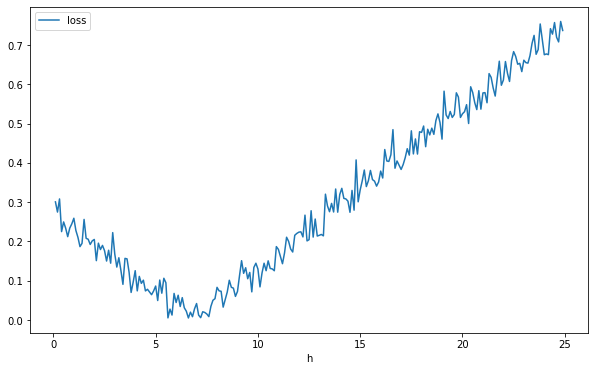

In [51]:
t_o_df.plot(x='h', y='loss', figsize=(10, 6));

Next: sample the h that gives the smallest loss many times to form a sampling distribution, from which the optimal h is picked.

In [17]:
def optimal_h_distribution(samples=100, res=3):
    h_results = []
    for _ in tqdm(range(samples)):
        sample = optimize_drift(data_series, test_size=3, simulations=5000, resolution=res, scale=4)
        sample_df = pd.DataFrame(sample)
        h_results.append((sample_df.index[sample_df[1] == sample_df[1].min()].tolist()[0])/(10**(res-2)))
    return h_results

In [18]:
trying_h = optimal_h_distribution()

  0%|          | 0/100 [00:00<?, ?it/s]

NameError: name 'optimize_drift' is not defined

In [19]:
bins = plt.hist(trying_h, bins=100, density=True, color=None, label=None, stacked=False)

NameError: name 'trying_h' is not defined

In [20]:
print("Optimal h is % s" % (max(set(trying_h), key = trying_h.count)))

NameError: name 'trying_h' is not defined

In [21]:
type(trying_h)

NameError: name 'trying_h' is not defined

In [22]:
def predict(past_prices, samples=1000, res=3, days_ahead=3, simulations=100000):
    h_distribution = optimal_h_distribution(samples=samples)
    h = max(set(trying_h), key = trying_h.count)
    log_ret = np.log(1 + past_prices.pct_change())
    mu = log_ret.mean()
    var = log_ret.var()
    drift = mu - (h * var)
    stdev = np.sqrt(var)
    t_intervals = simulations
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
    S0 = past_prices.iloc[-1]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]
    print(sum(price_list[-1])/len(price_list[-1]))

In [23]:
predict(data['PLAY'], days_ahead=3)

  0%|          | 0/1000 [00:00<?, ?it/s]

NameError: name 'optimize_drift' is not defined